In [5]:
## Load required modules
import warnings, sys, os ## system
if not sys.warnoptions:
    warnings.simplefilter("ignore") # ignore warnings

import re
import os
import glob
from datetime import datetime    
import time
import copy
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from itertools import product, combinations
import multiprocessing as mp


from bids import BIDSLayout, BIDSValidator

from nilearn.maskers import NiftiMasker
from nilearn import plotting, image
from nilearn.glm.first_level import make_first_level_design_matrix, FirstLevelModel
from nilearn.image import concat_imgs, mean_img
from nilearn.plotting import plot_design_matrix
import matplotlib.pyplot as plt

# Load files 
story_dir = '/mnt/c/Users/since/Dropbox/Lab/Projects/CJY/_DATA'
May_dir = '/mnt/c/Users/since/Desktop/KdramaMay/'

In [3]:
#Subject check 
data_dir = os.path.join(May_dir, 'data', 'derivatives')
file_list = glob.glob(os.path.join(data_dir, 'sub-*', 'func', f'*task-encoding_run-1_space-MNI152NLin6Asym_res-2_desc-brain_mask.nii.gz'))

sub_sm =[] 
for filename in file_list: 
    sub = os.path.basename(filename).split('_')[0]
    sub = os.path.basename(sub).split('-')[1]
    sub_sm.append(int(sub)) 
    
#sub_sm_exclude = [0, 24, 48] #  1, 26 
#sub_sm = np.delete(sub_sm, sub_sm_exclude)
print(sub_sm)

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]


In [7]:
# load story sequence 
import scipy.io as sio

all_story = {}
# Load May Data
for sub in sub_sm:
    #print(sub)
    mat = sio.loadmat(glob.glob(os.path.join(story_dir, 'fMRItdsgn', f'sub-{sub}_*.mat'))[0])
    story = []
    for i in np.arange(0,4):
        temp = mat['subj'][0][0][7][0][i][0]
        if temp == 'Blind Date':
            temp = 'BlindDate'
        elif temp == 'Runningman':
            temp = 'RunningMan'
        elif temp == 'neighbors':
            temp = 'Neighbors'
        story = np.append(story, temp)
    #all_story[str(int(sub)+8)] = story
    all_story[sub] = story
#Fix story sequence
#story_sequece = all_story[]
#story_sequece

NameError: name 'sub_sm' is not defined

In [12]:
os.path.join(May_dir,'denoised', f"sub-{sub}_task-encoding_run-{run}_4scNsm.nii.gz")
print('C:\Users\since\Desktop\KdramaMay\denoised\sub-02_task-encoding_run-1_4scNsm.nii.gz')

'/mnt/c/Users/since/Desktop/KdramaMay/denoised/sub-2_task-encoding_run-1_4scNsm.nii.gz'

In [7]:
glob.glob(os.path.join(May_dir,'denoised', f"sub-{sub}_task-encoding_run-{run}_4scNsm.nii.gz"))

[]

4
event_size (20, 3)
desingMatrix_size (477, 35)
Load concatenated func_img files
Image shape: (91, 109, 91, 477)
start fitting GLM
save betas
event_size (20, 3)
desingMatrix_size (477, 35)
Load concatenated func_img files
Image shape: (91, 109, 91, 477)
start fitting GLM
save betas
finish GLM
5
event_size (20, 3)
desingMatrix_size (477, 35)
Load concatenated func_img files
Image shape: (91, 109, 91, 477)
start fitting GLM
save betas
event_size (20, 3)
desingMatrix_size (477, 35)
Load concatenated func_img files
Image shape: (91, 109, 91, 477)
start fitting GLM
save betas
finish GLM
6
event_size (20, 3)
desingMatrix_size (477, 35)
Load concatenated func_img files
Image shape: (91, 109, 91, 477)
start fitting GLM
save betas
event_size (20, 3)
desingMatrix_size (477, 35)
Load concatenated func_img files
Image shape: (91, 109, 91, 477)
start fitting GLM
save betas
finish GLM
7
event_size (20, 3)
desingMatrix_size (477, 35)
Load concatenated func_img files
Image shape: (91, 109, 91, 477)
s

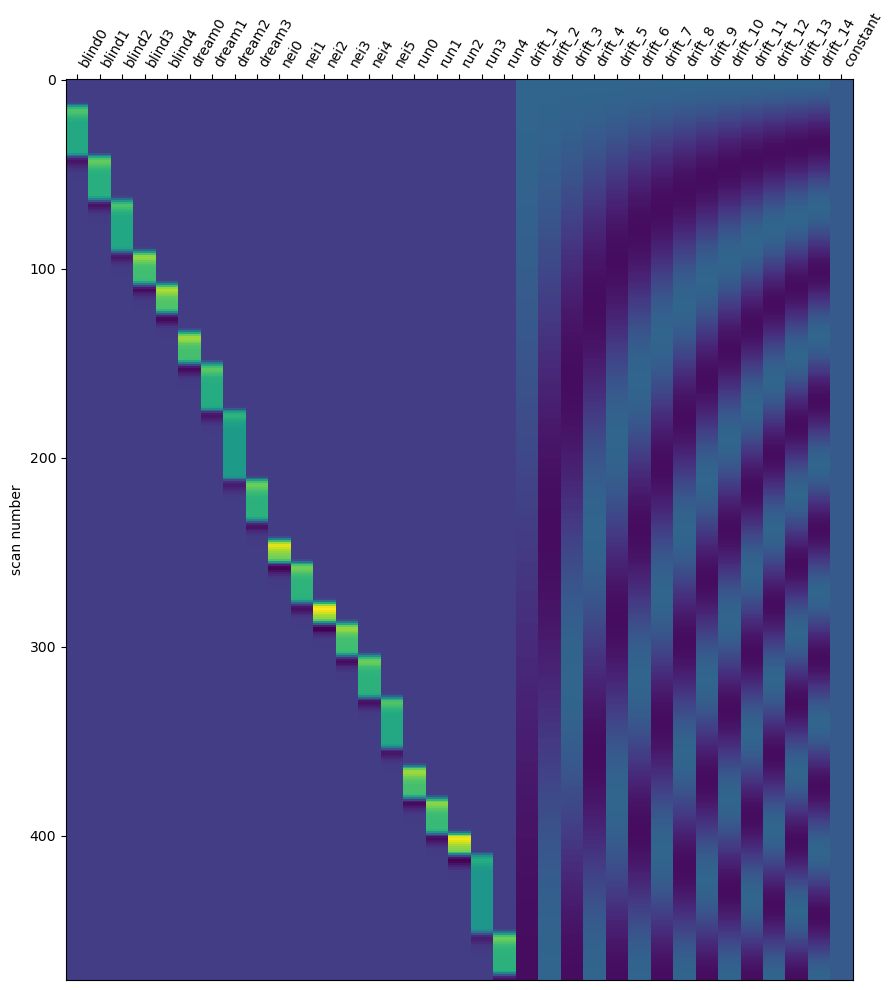

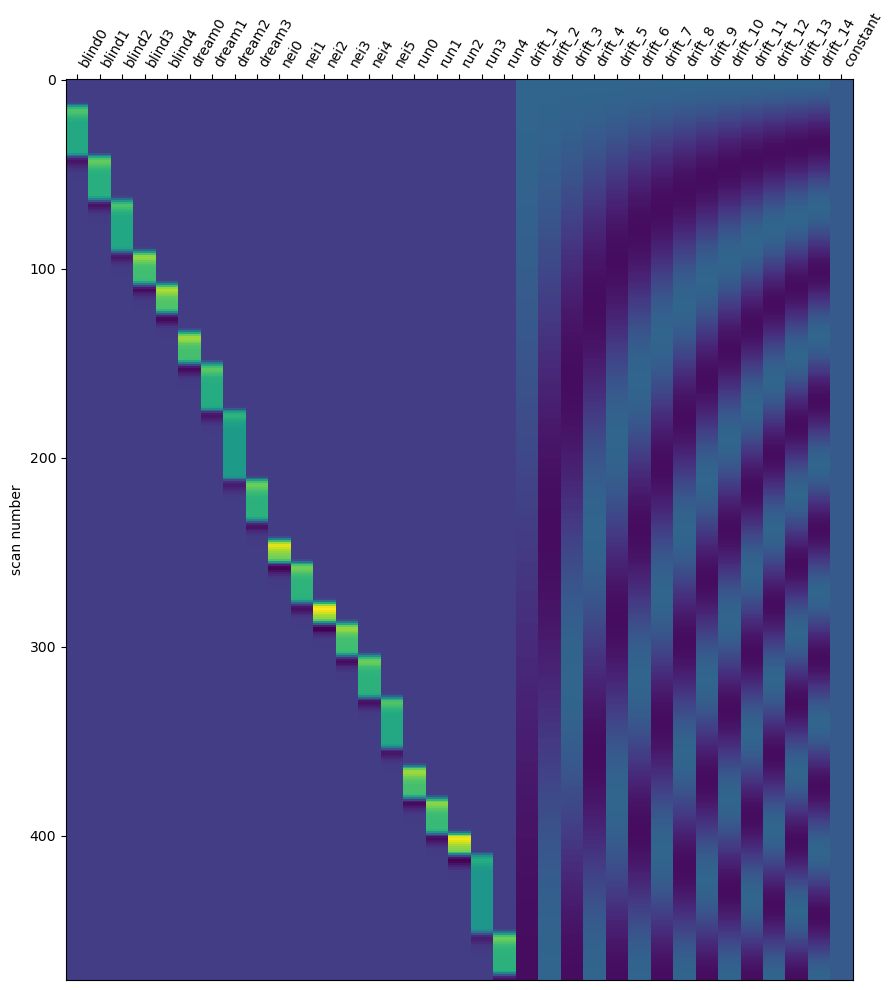

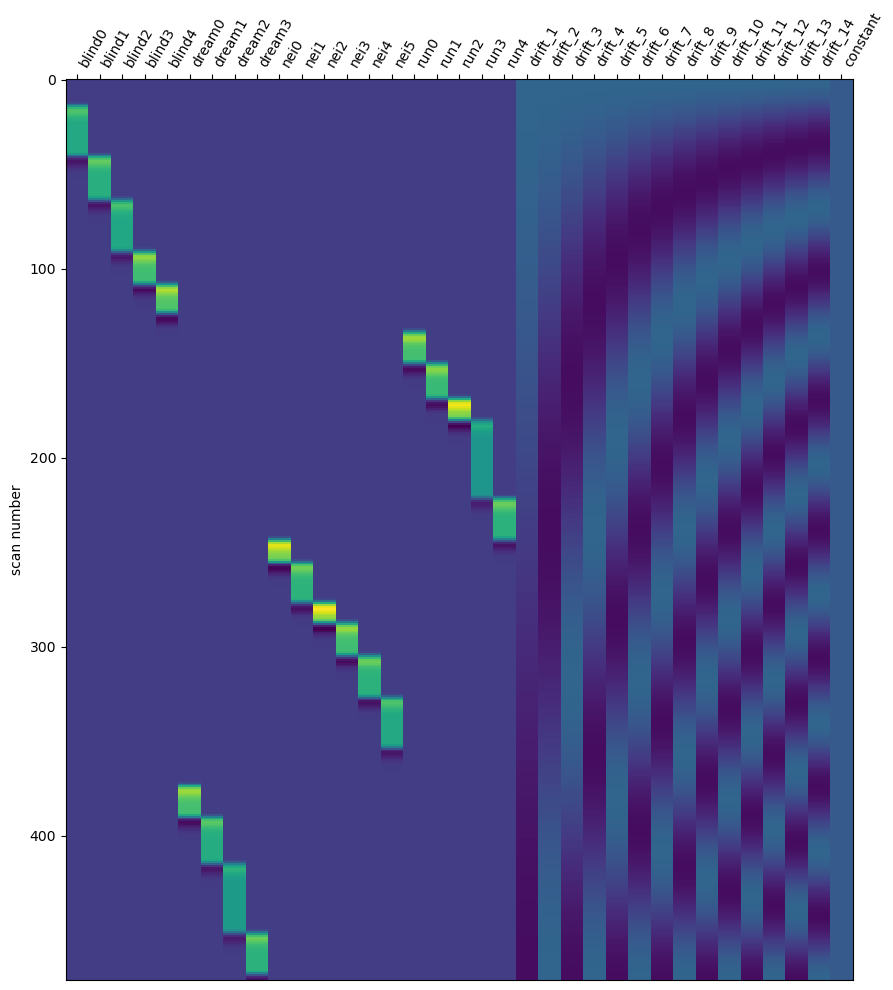

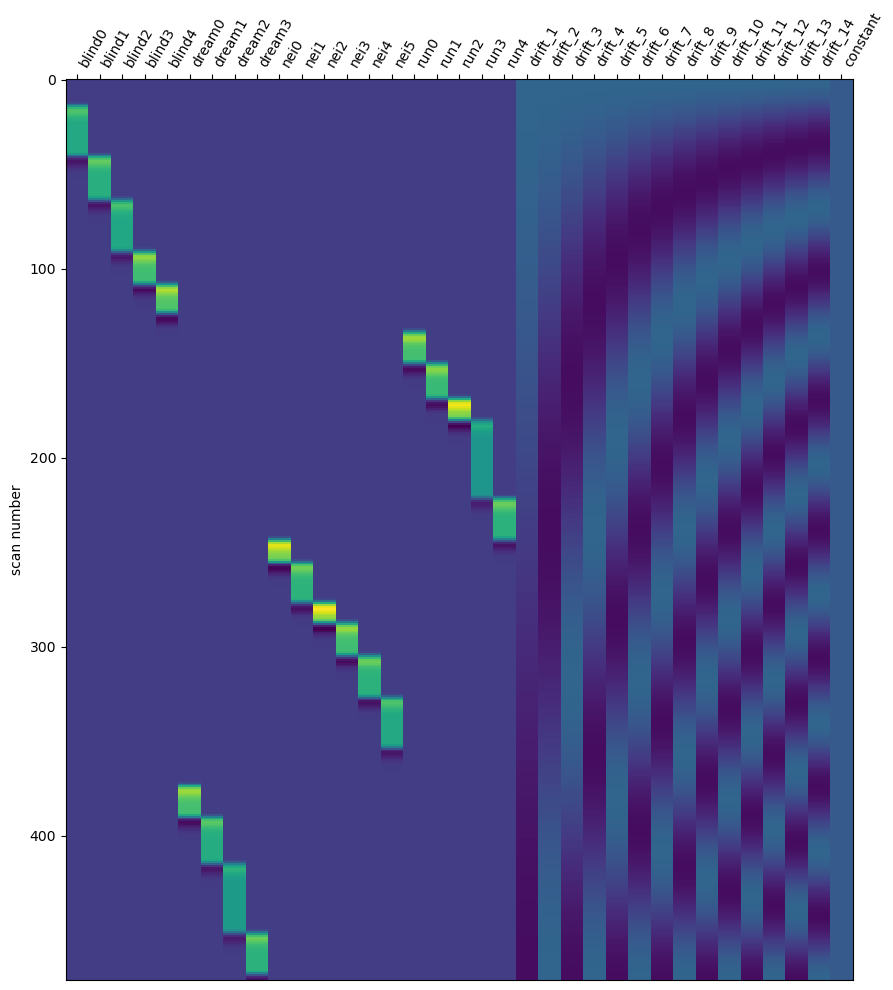

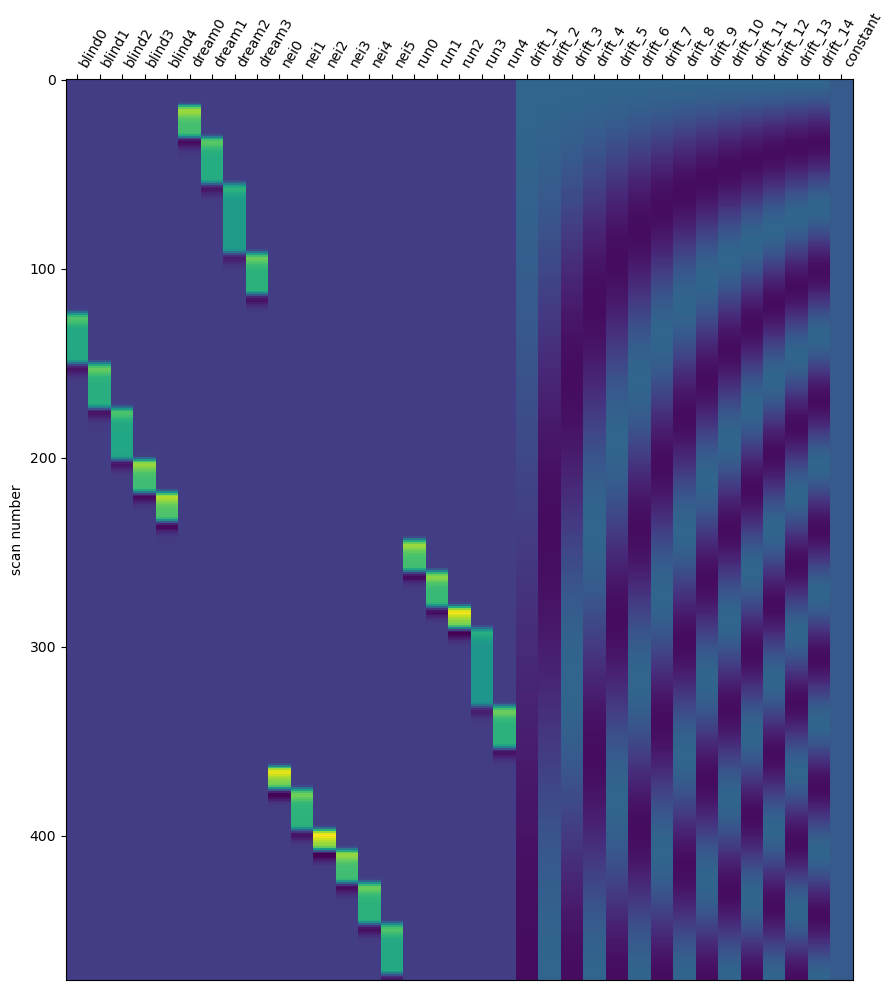

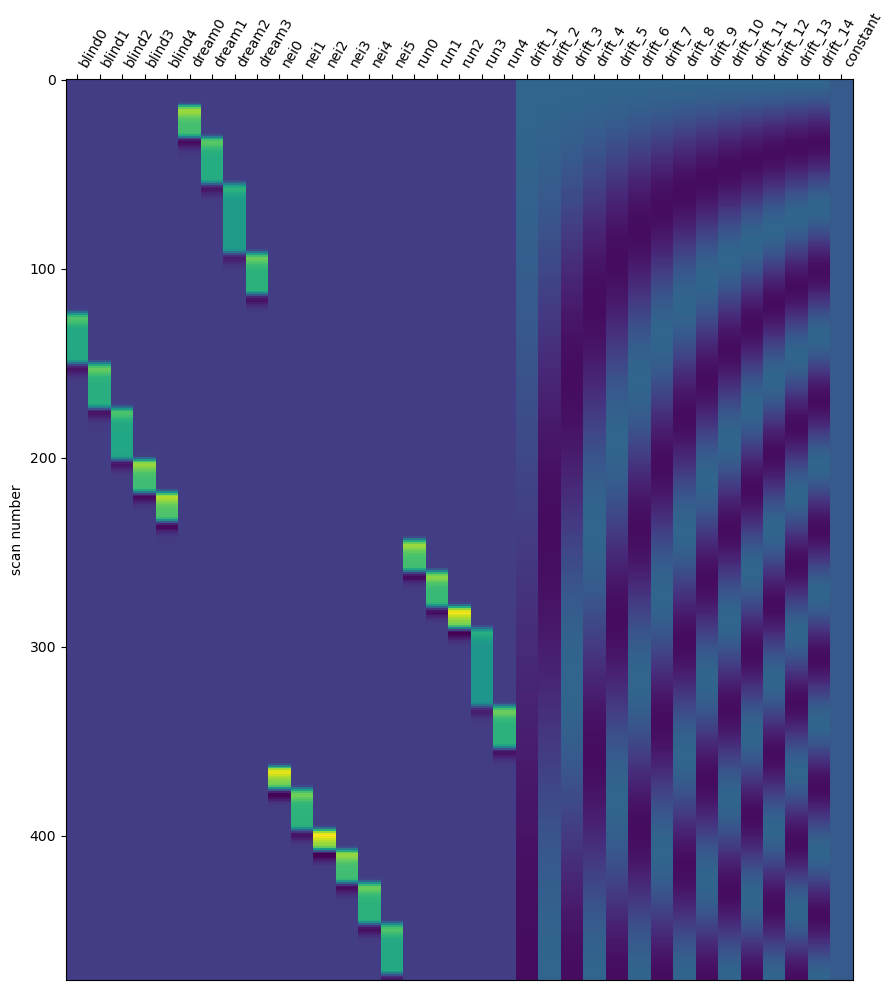

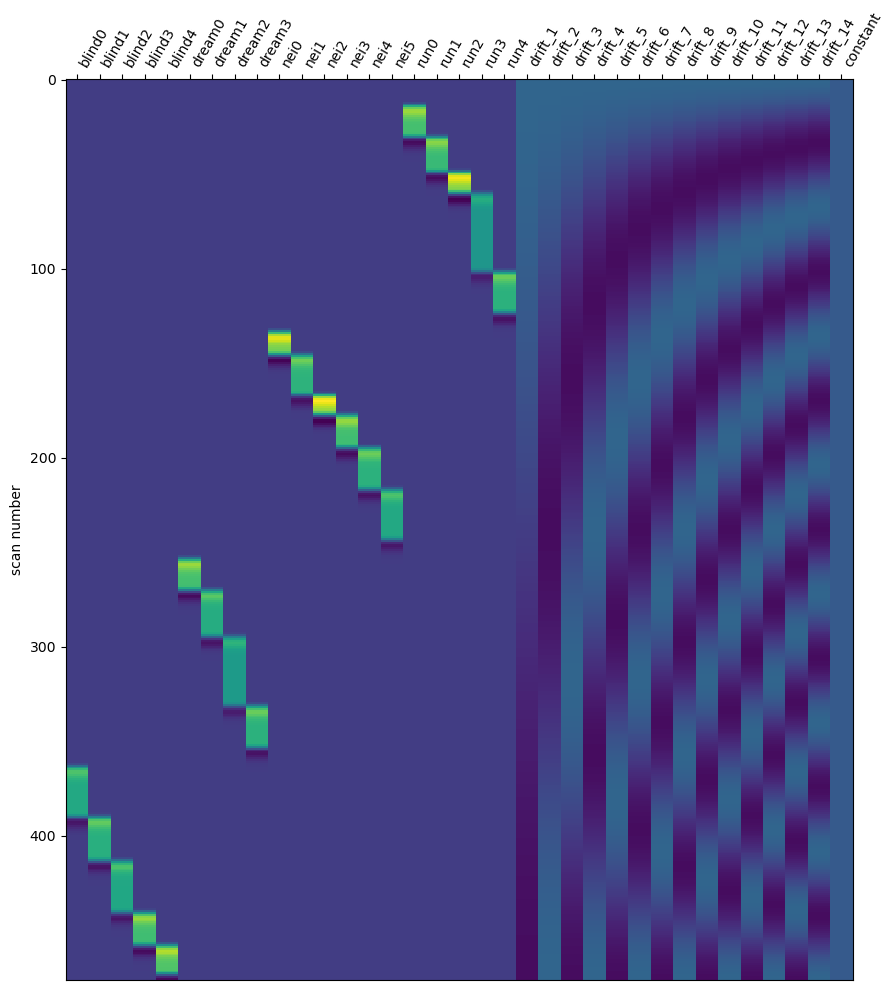

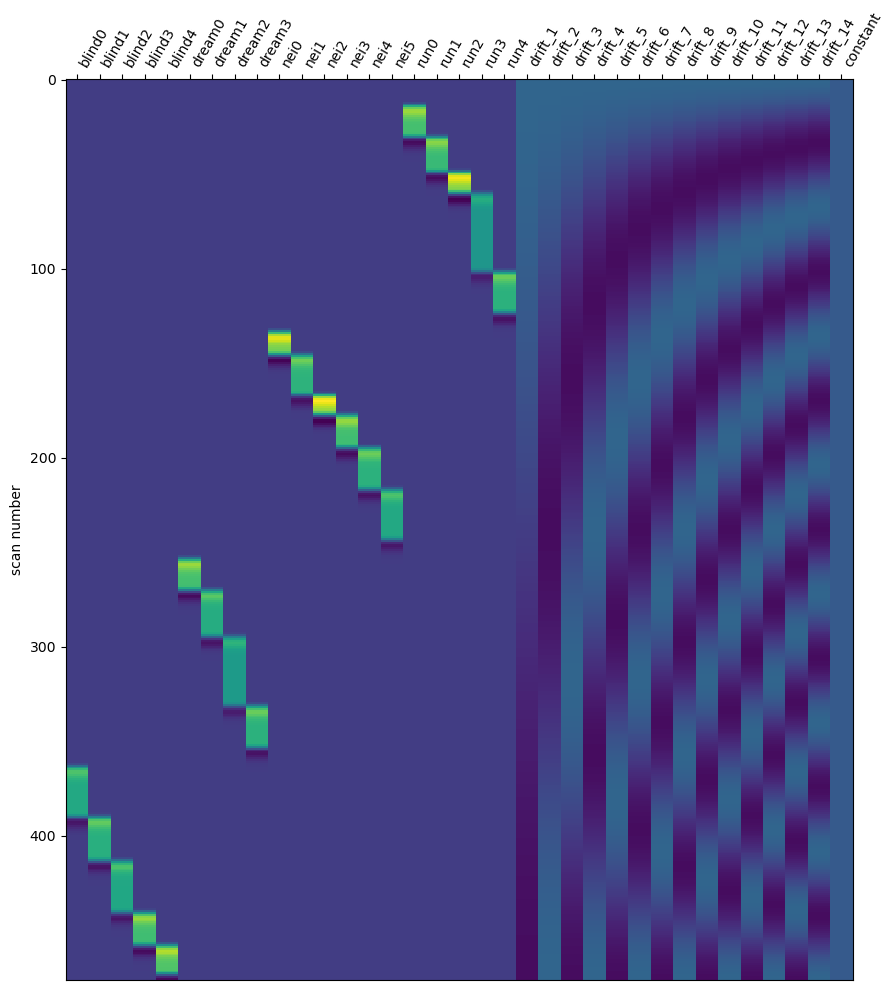

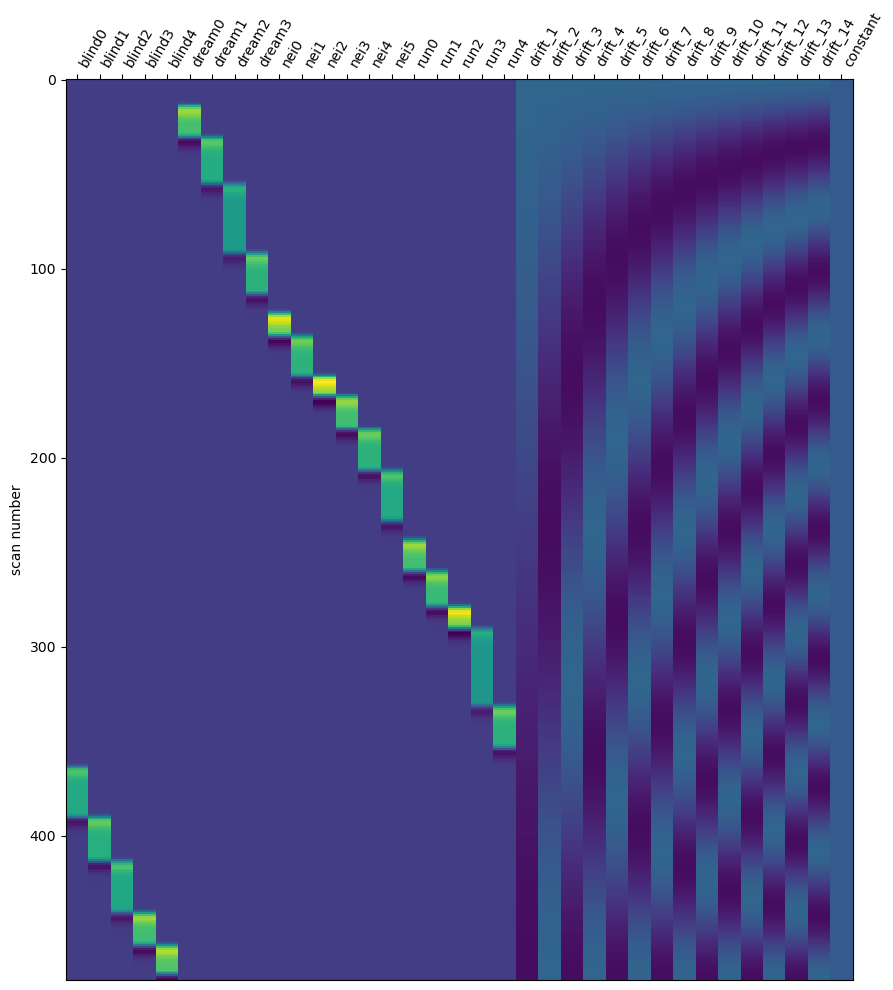

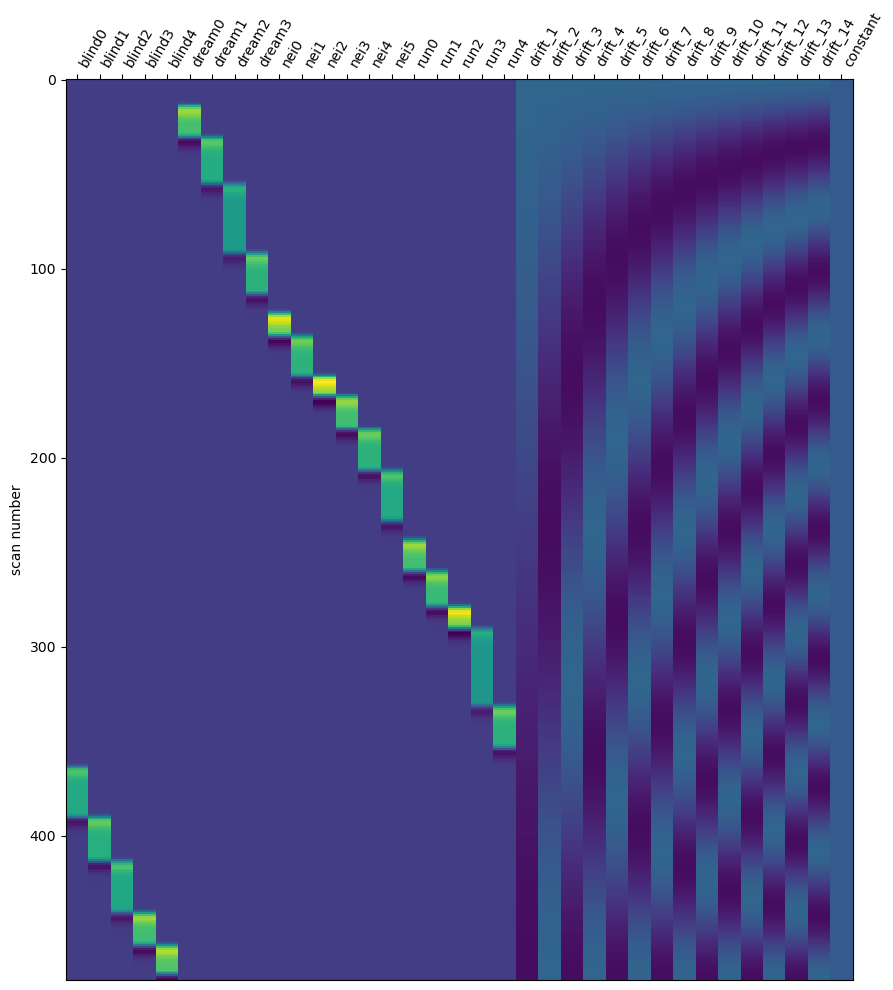

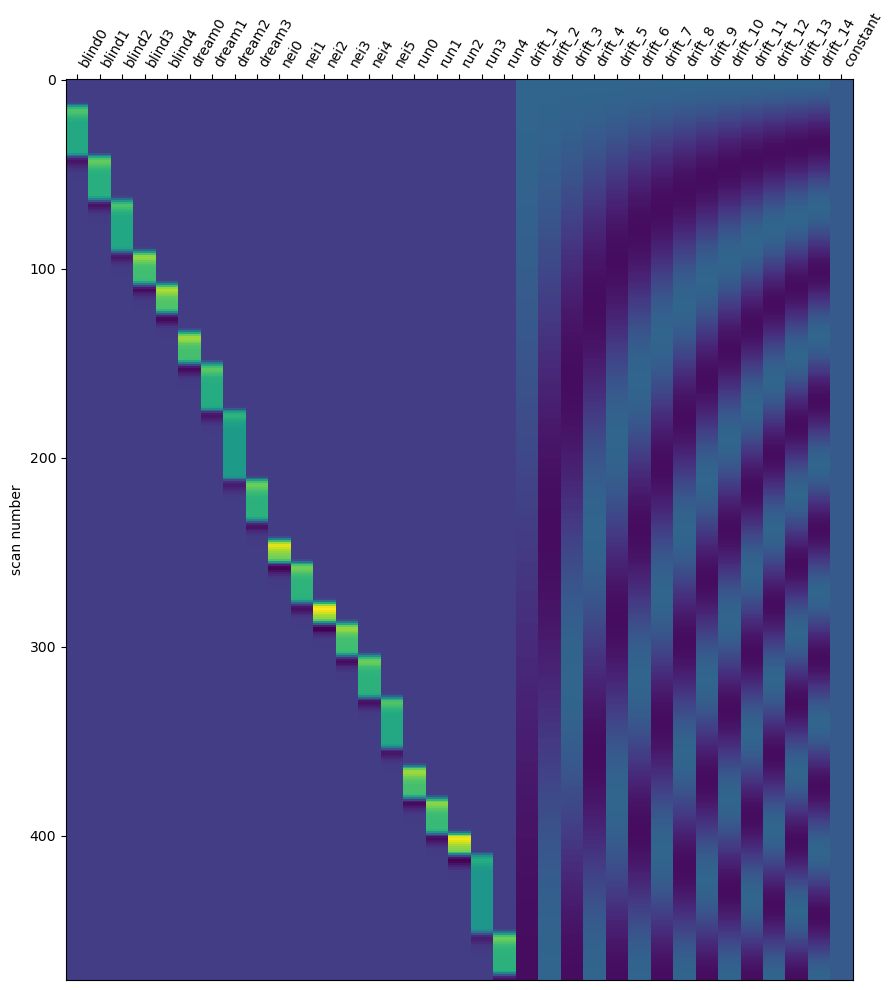

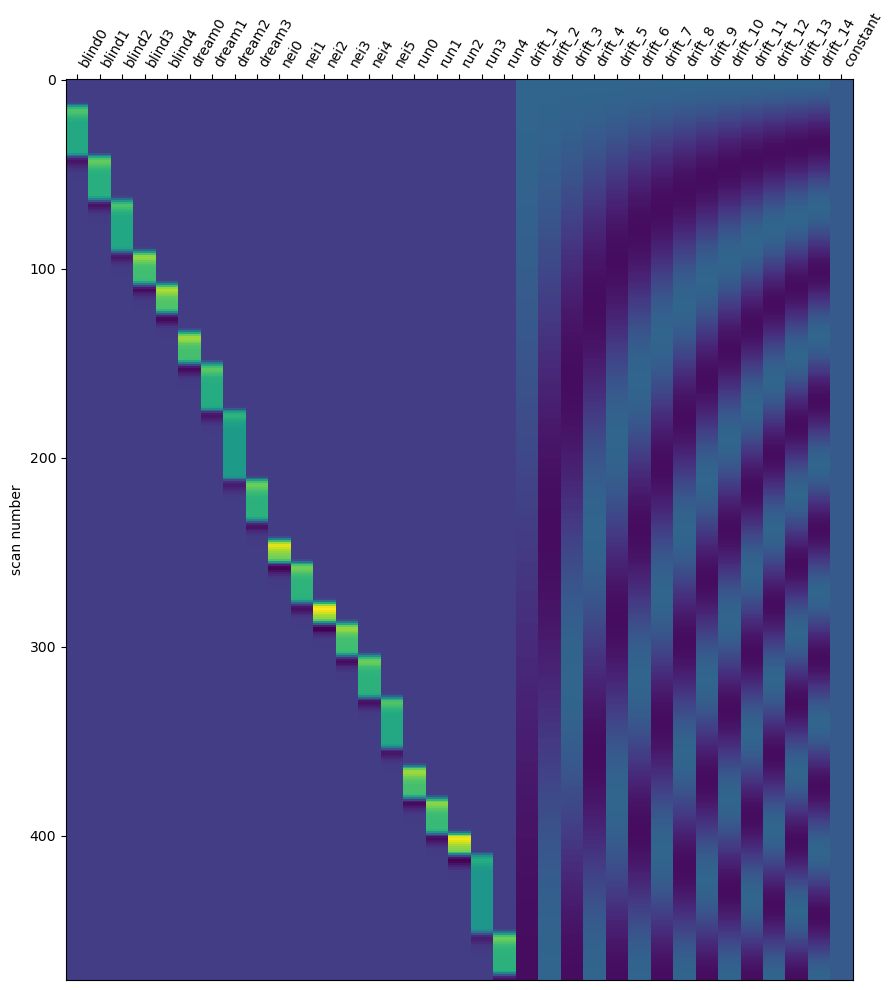

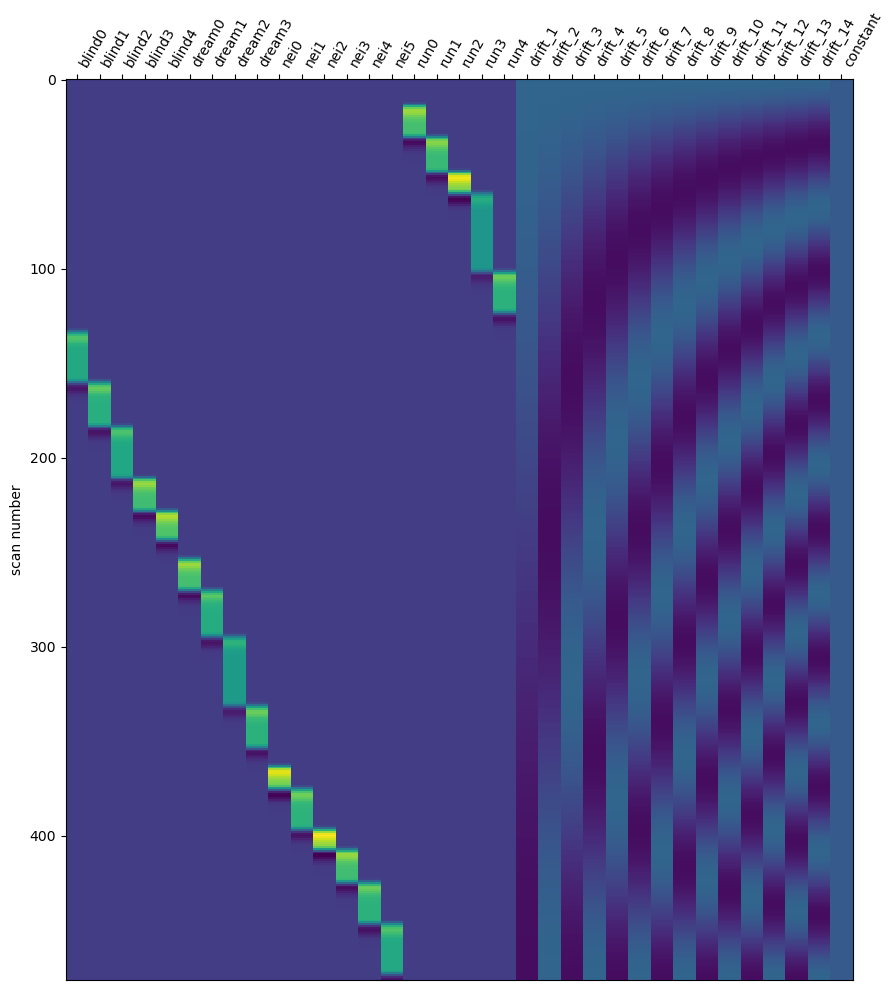

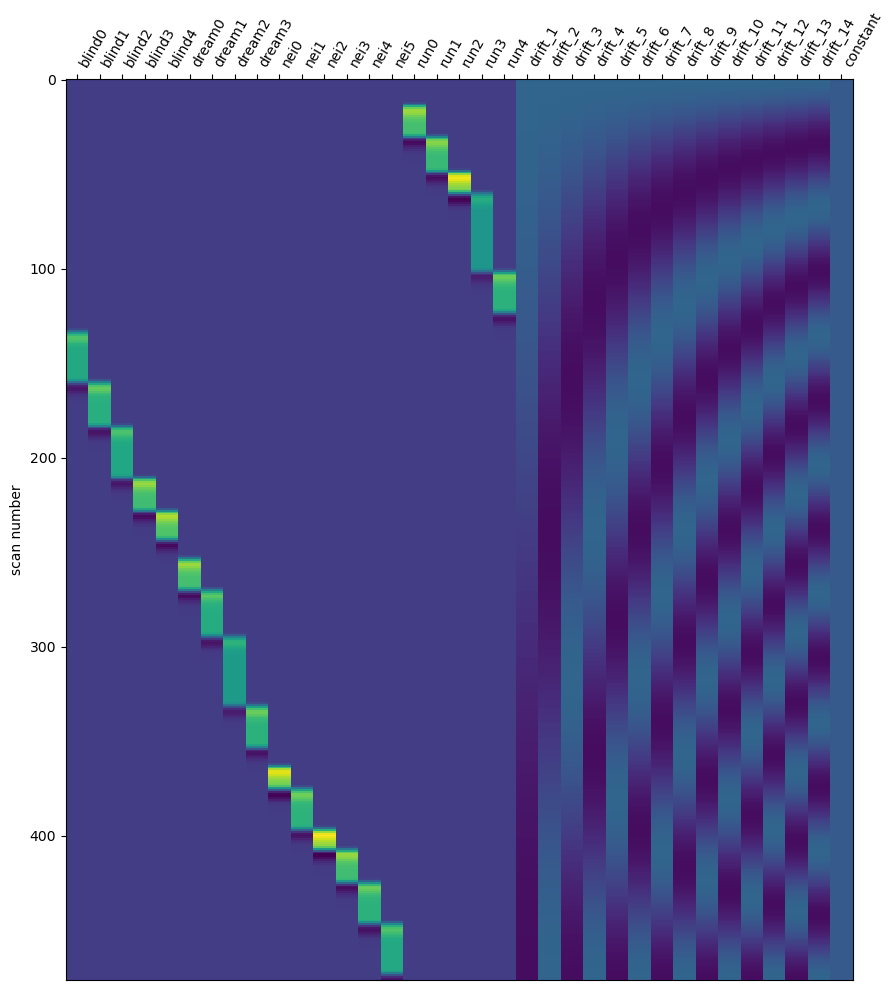

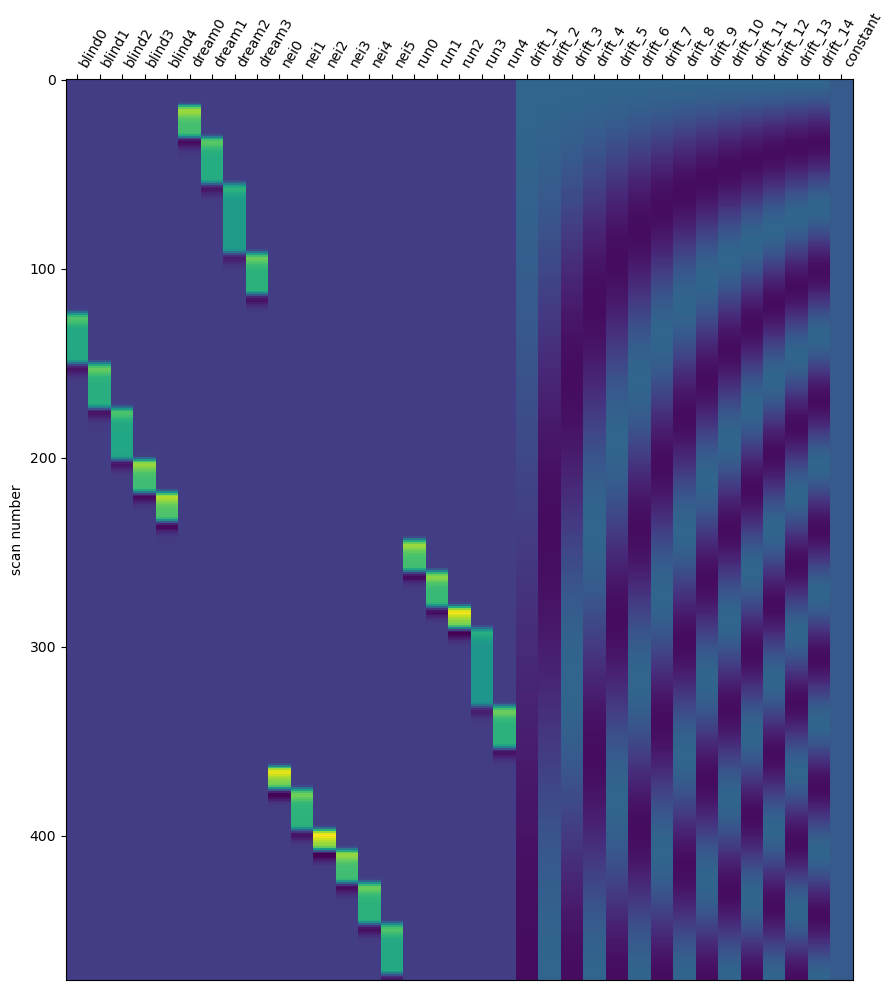

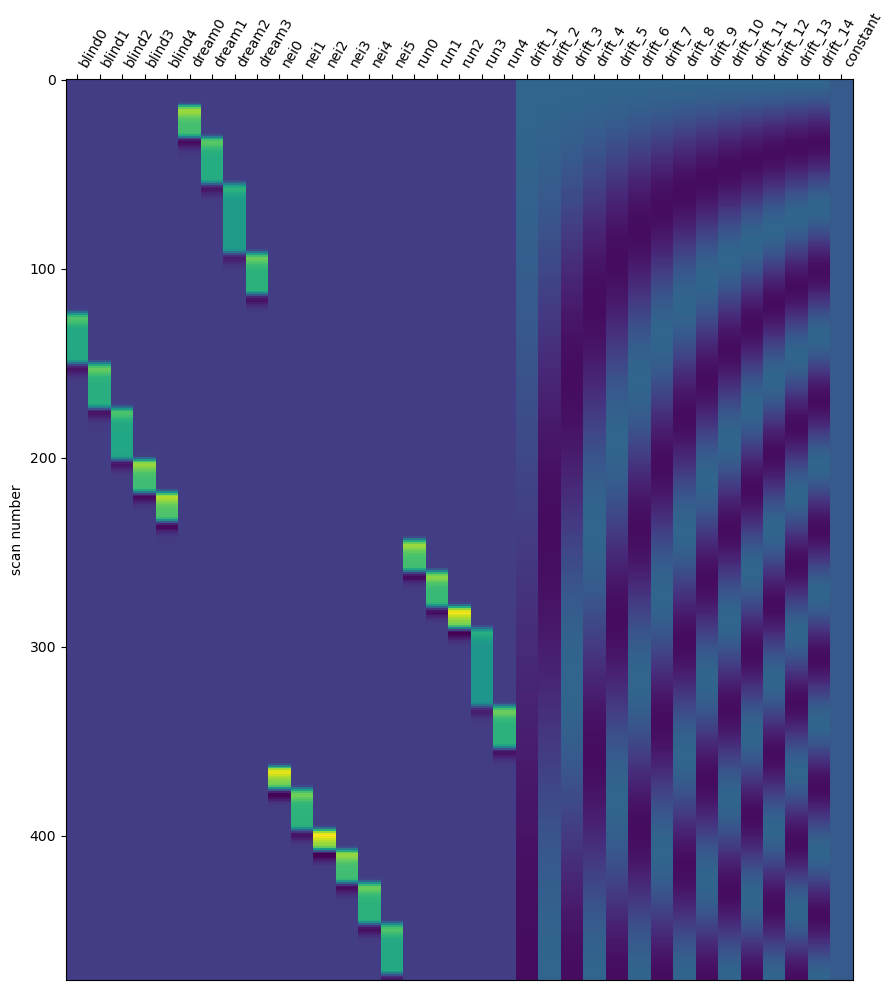

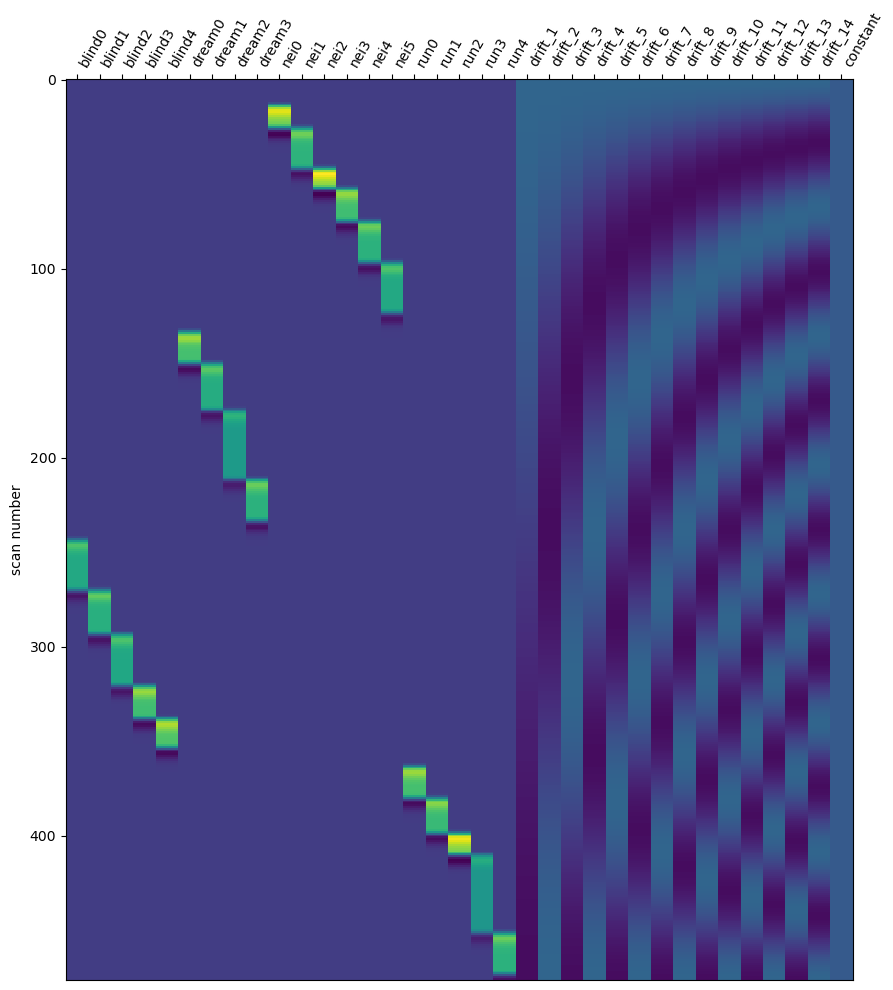

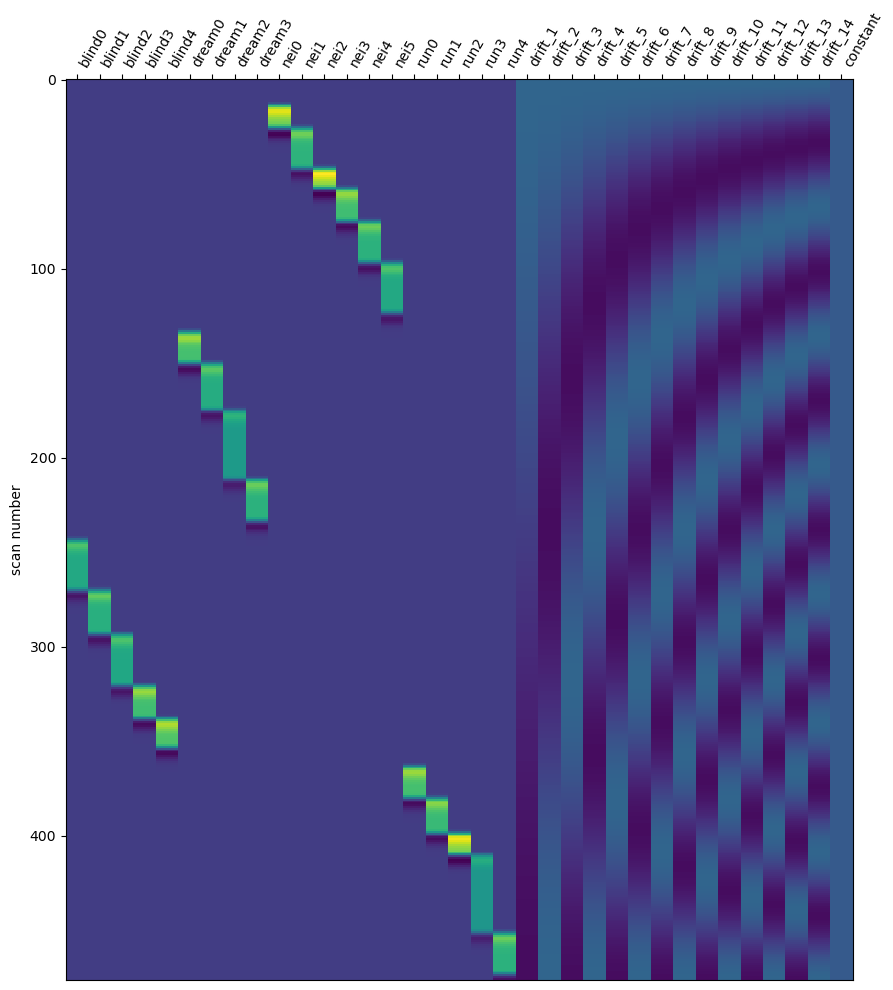

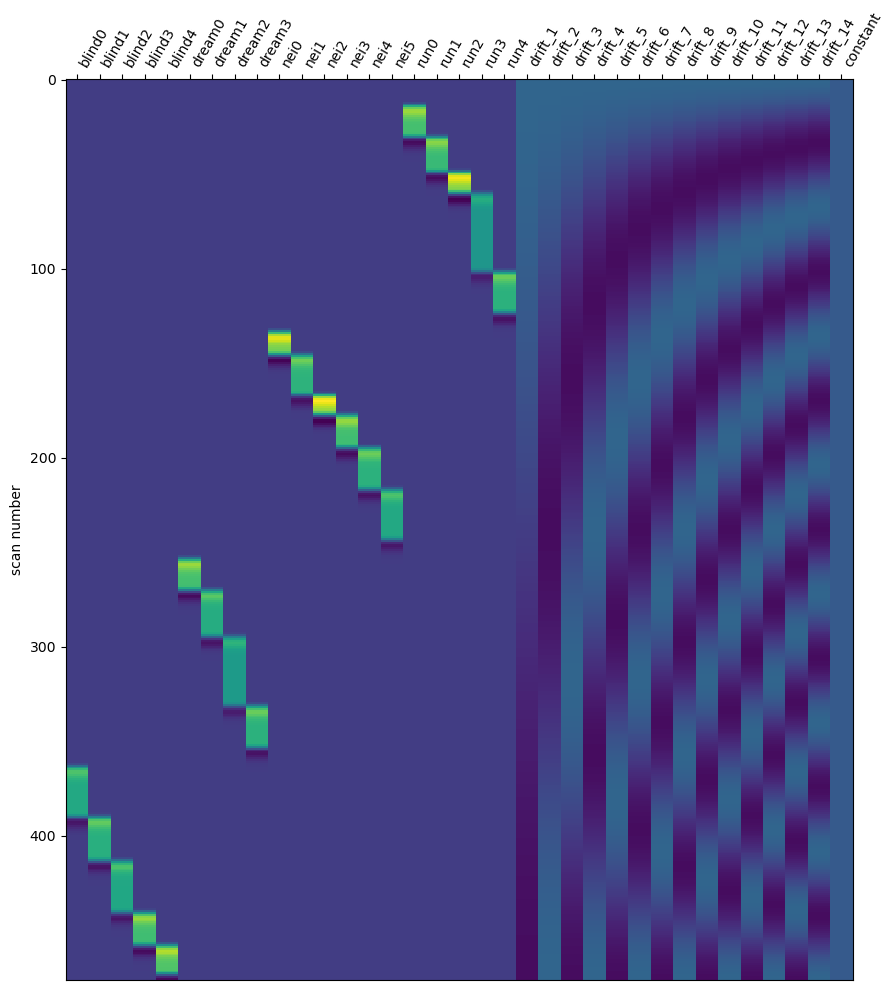

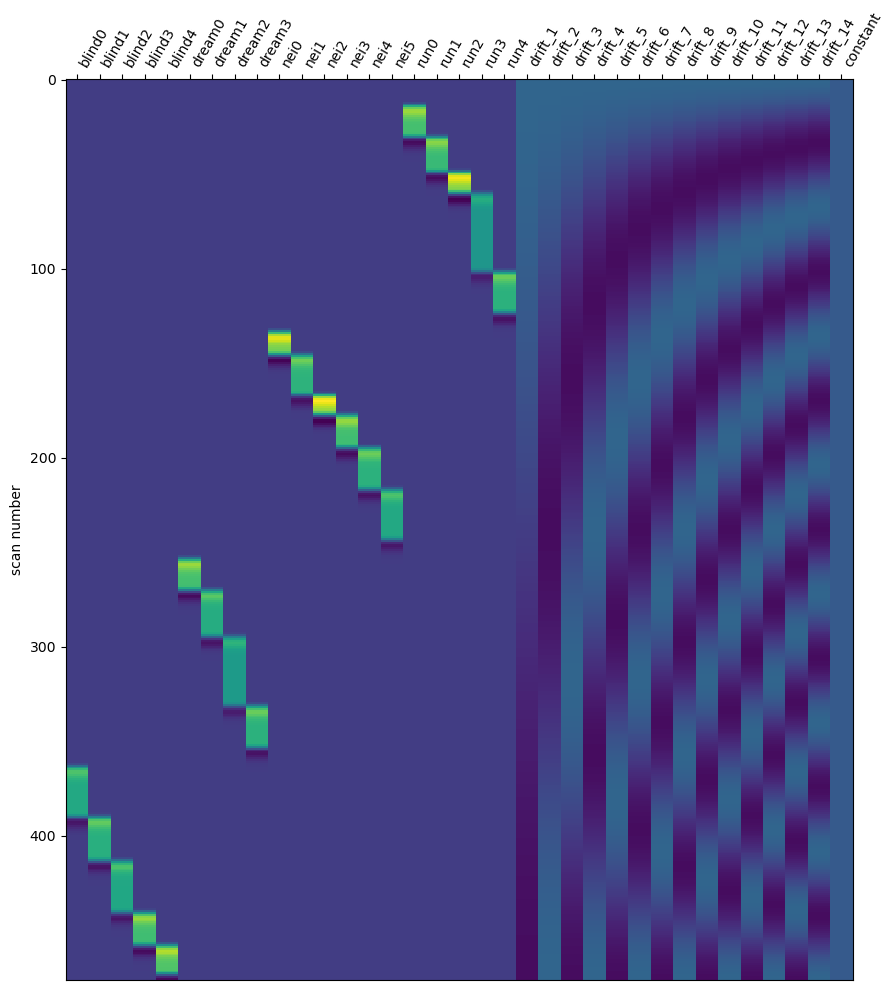

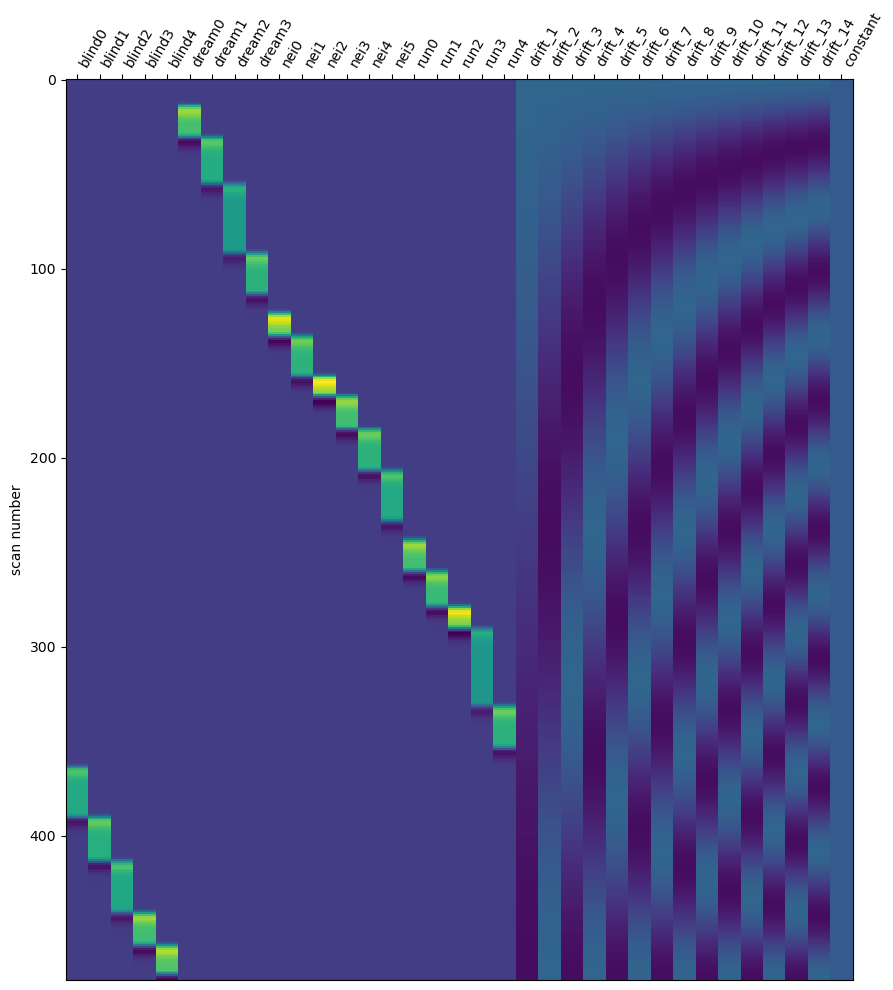

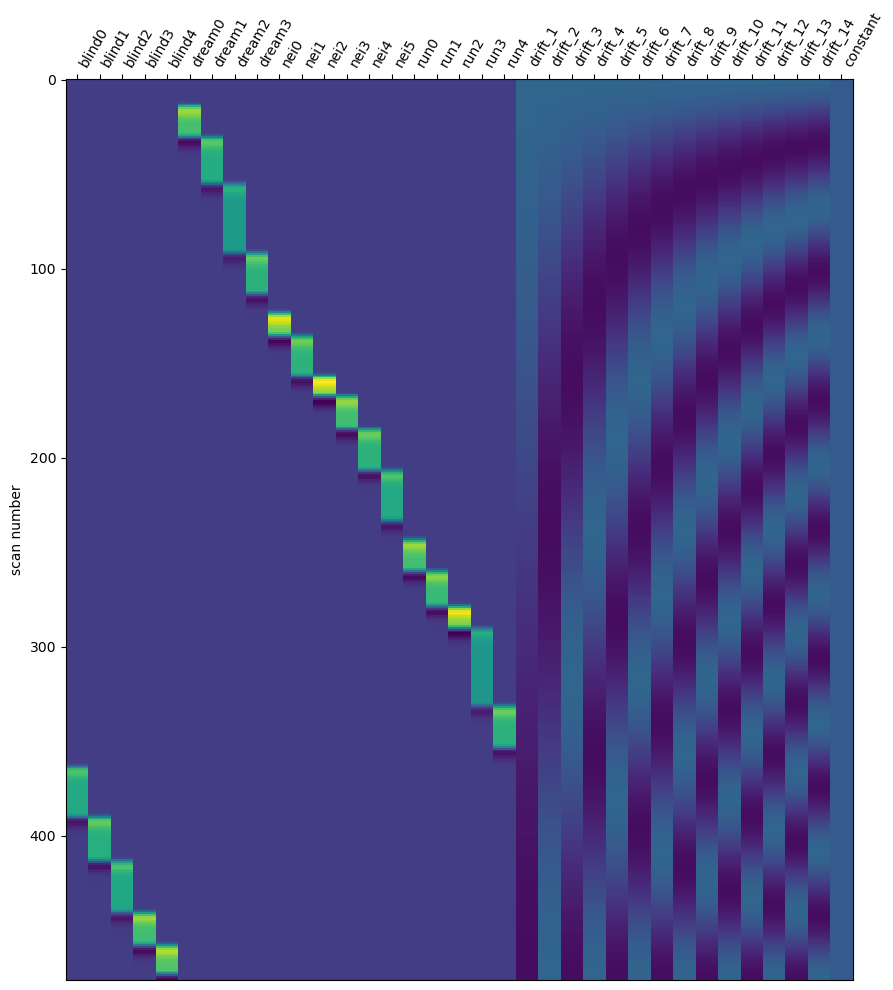

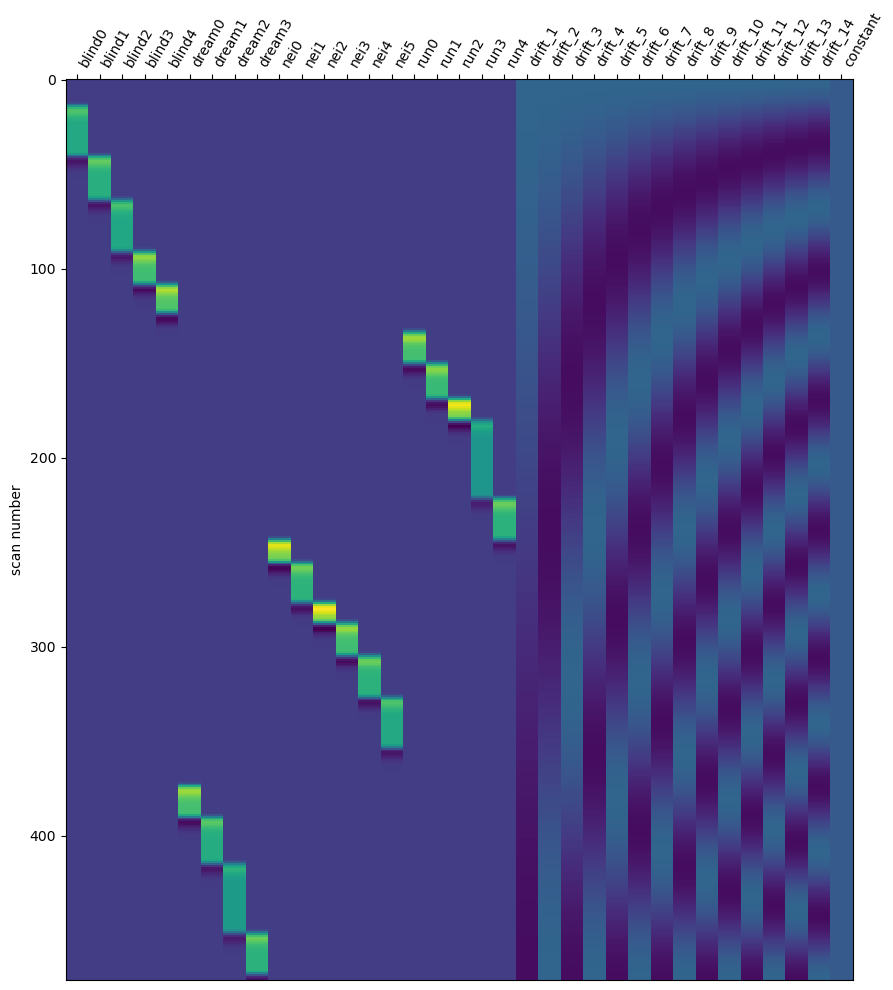

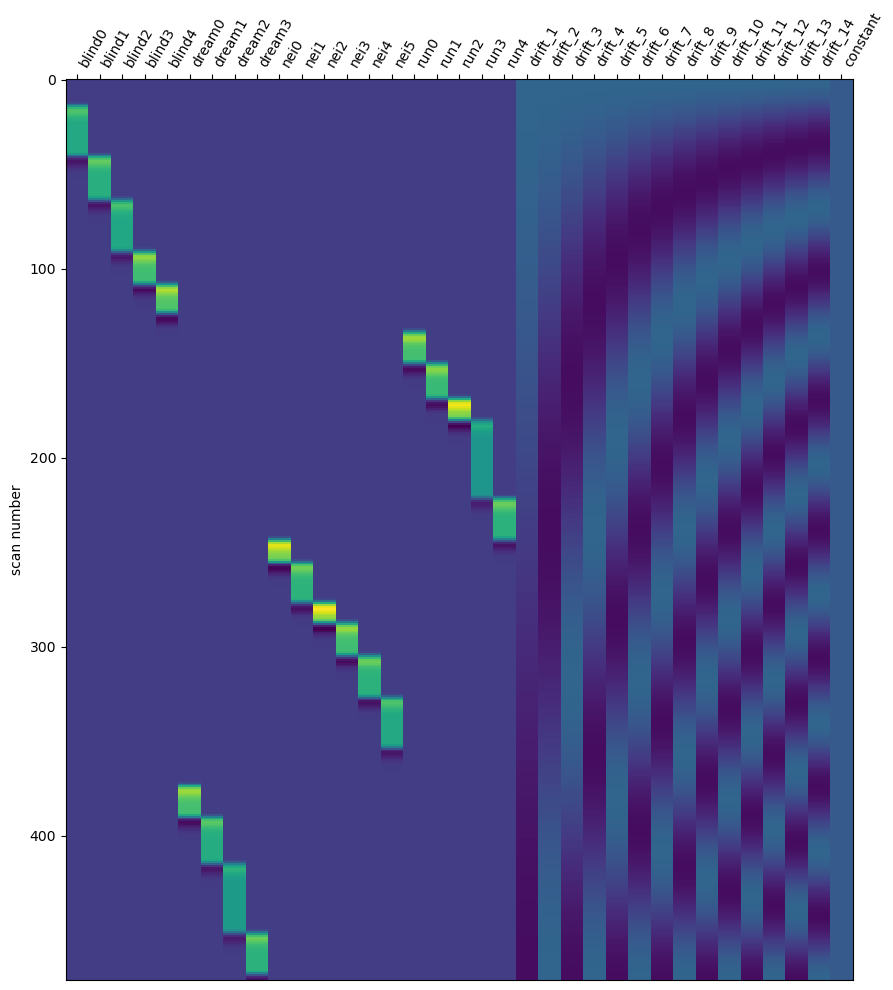

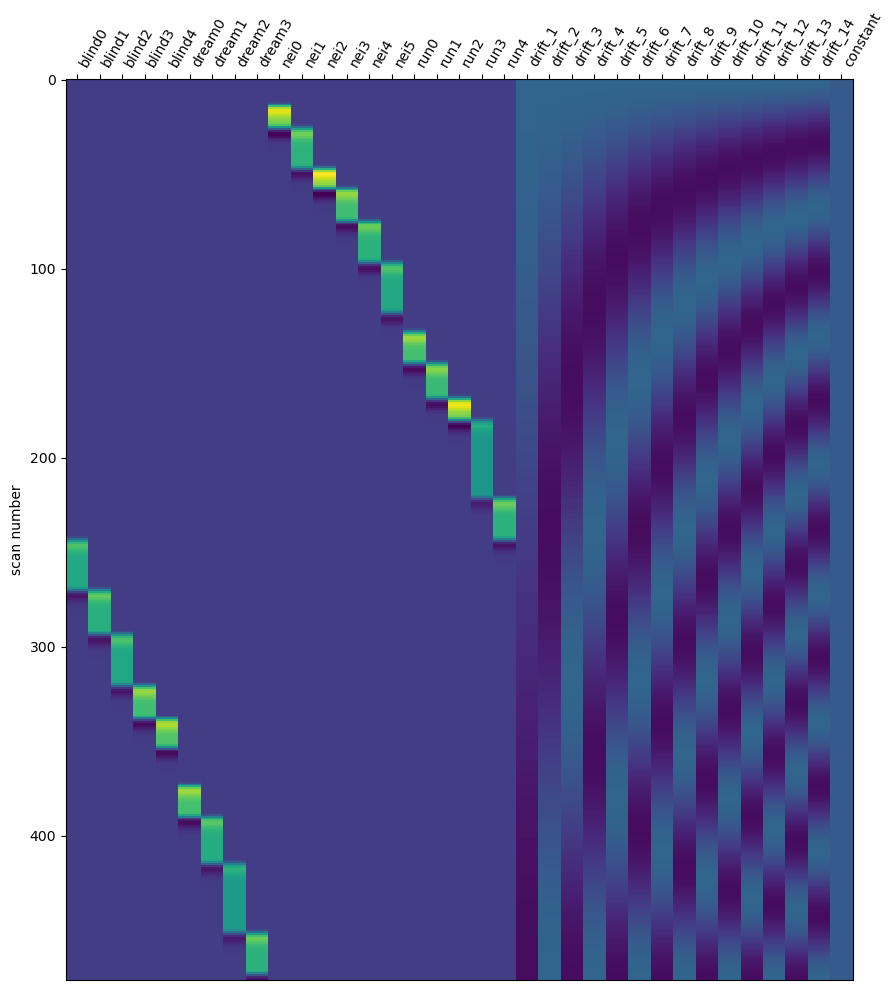

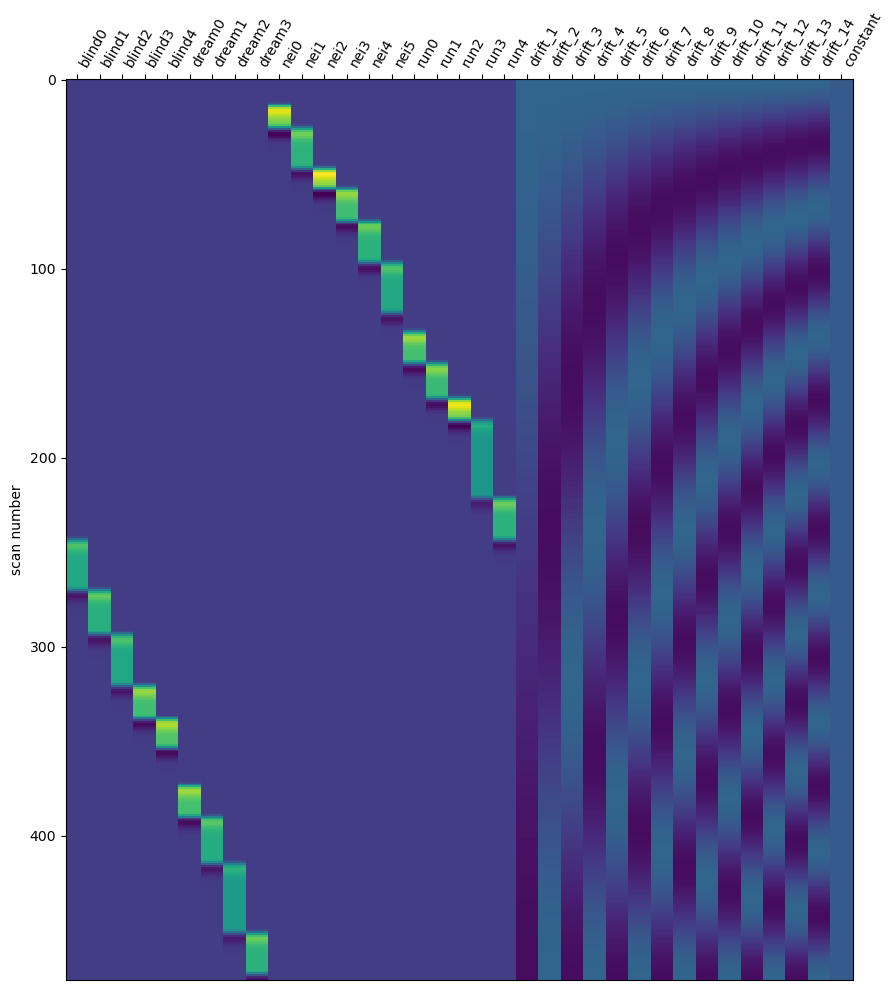

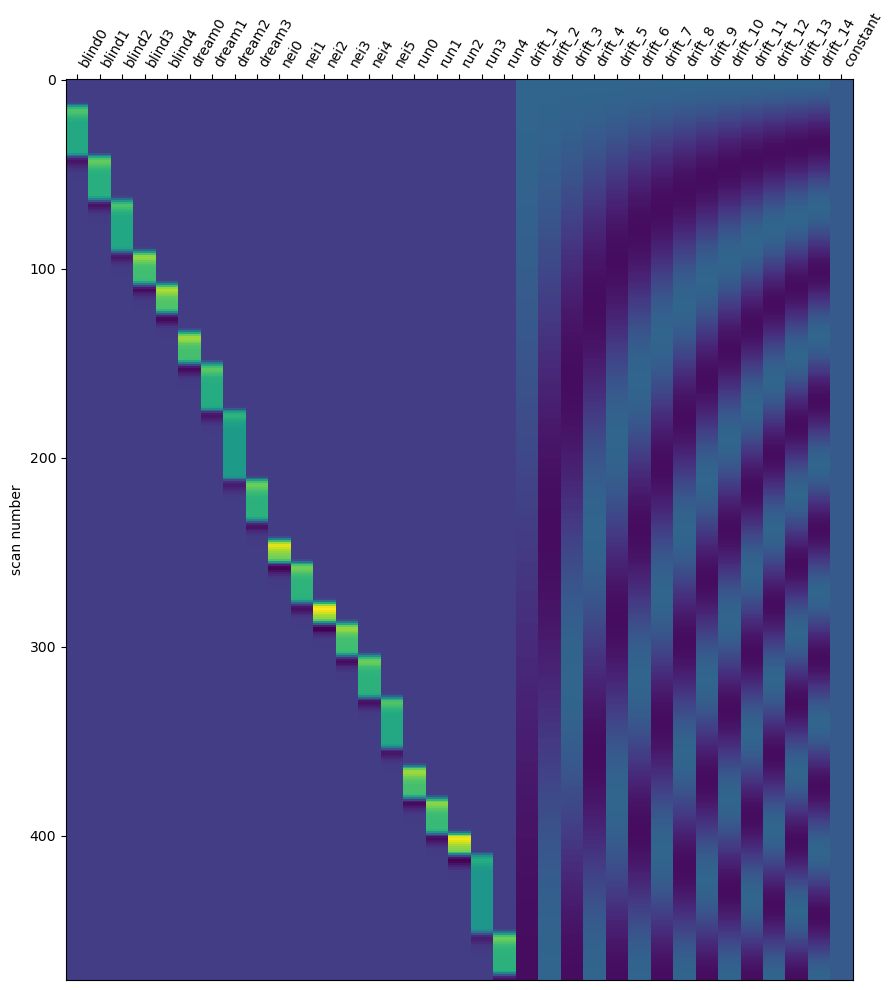

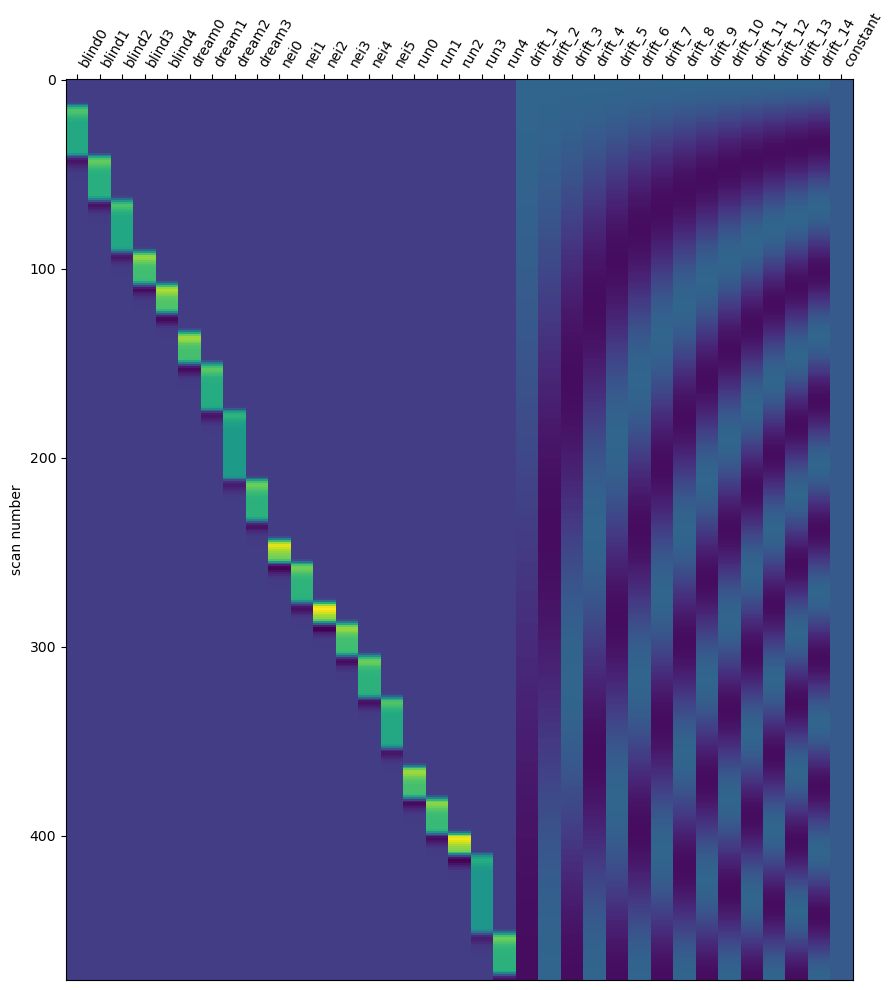

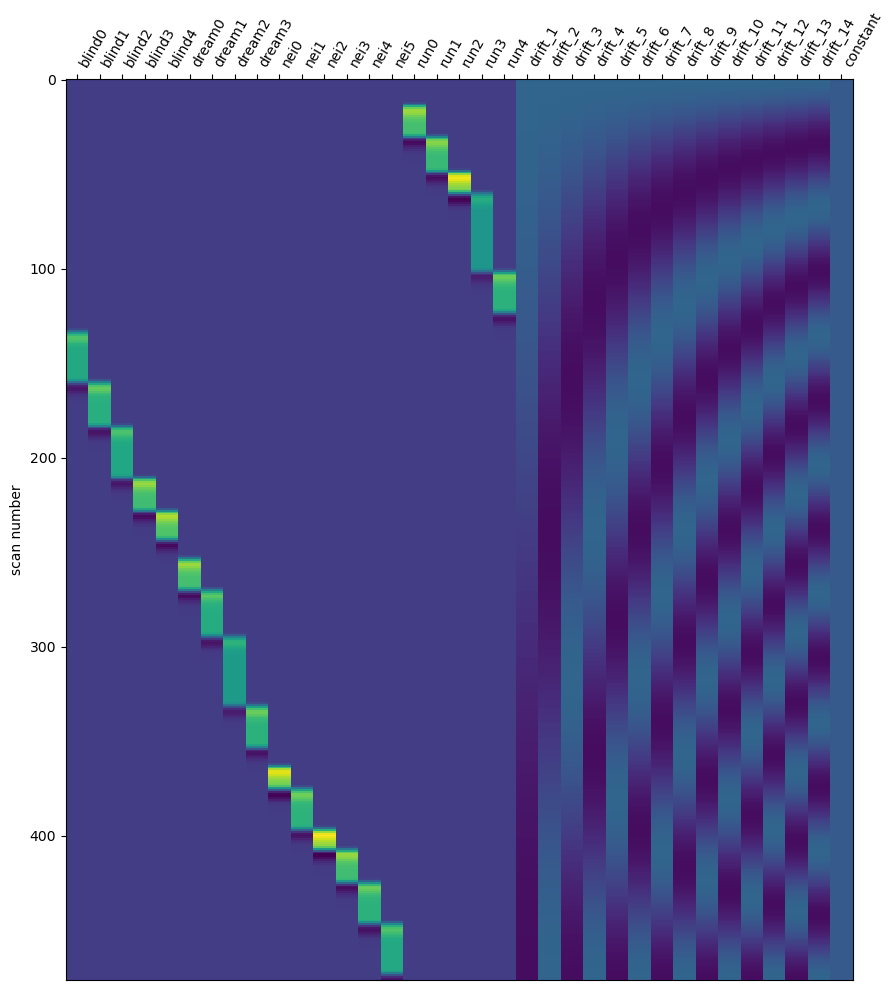

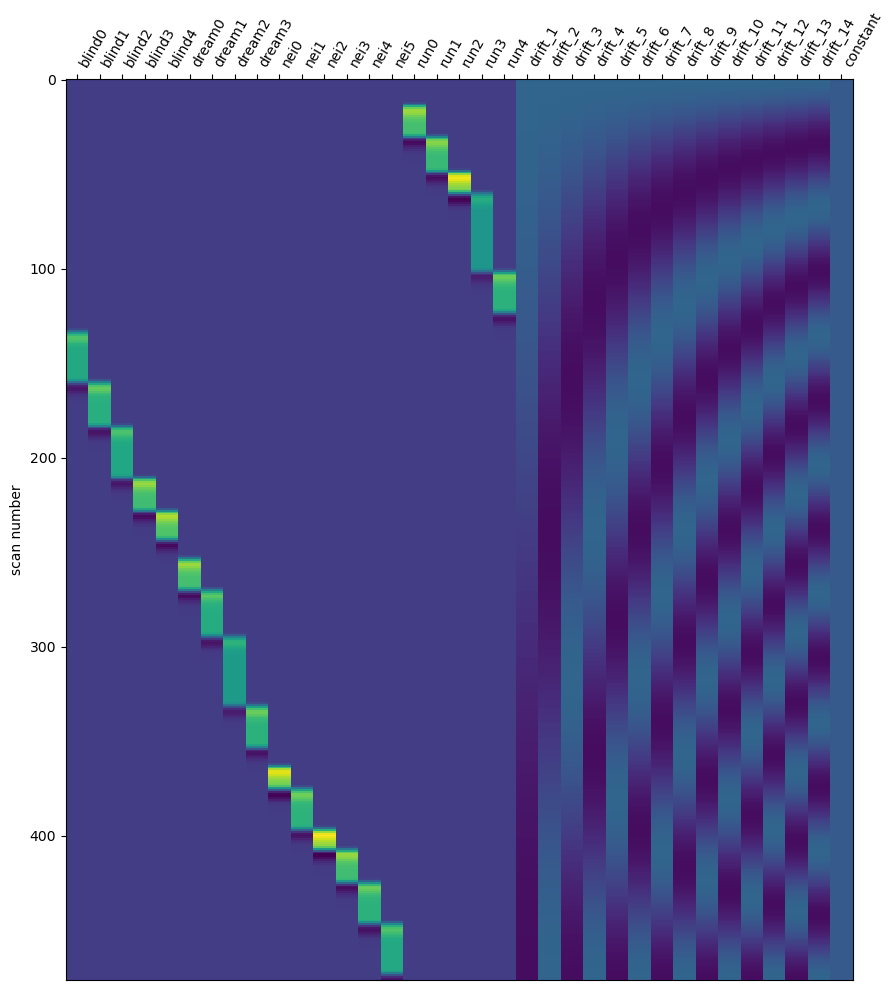

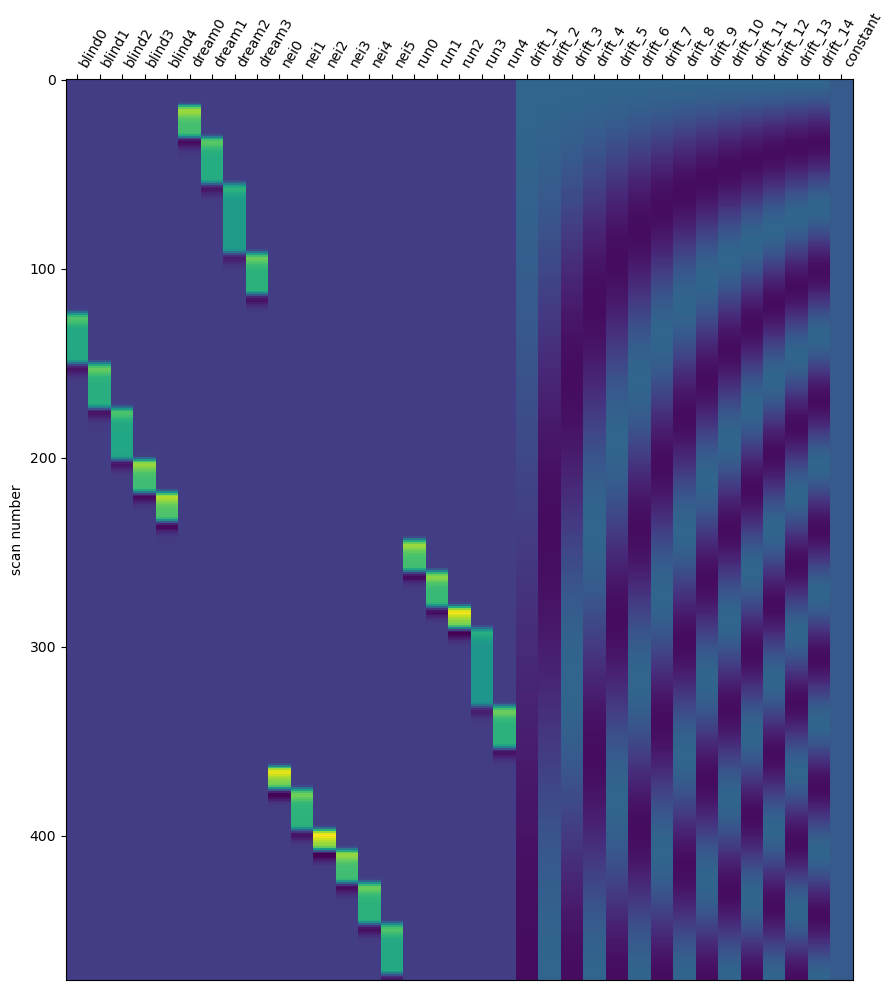

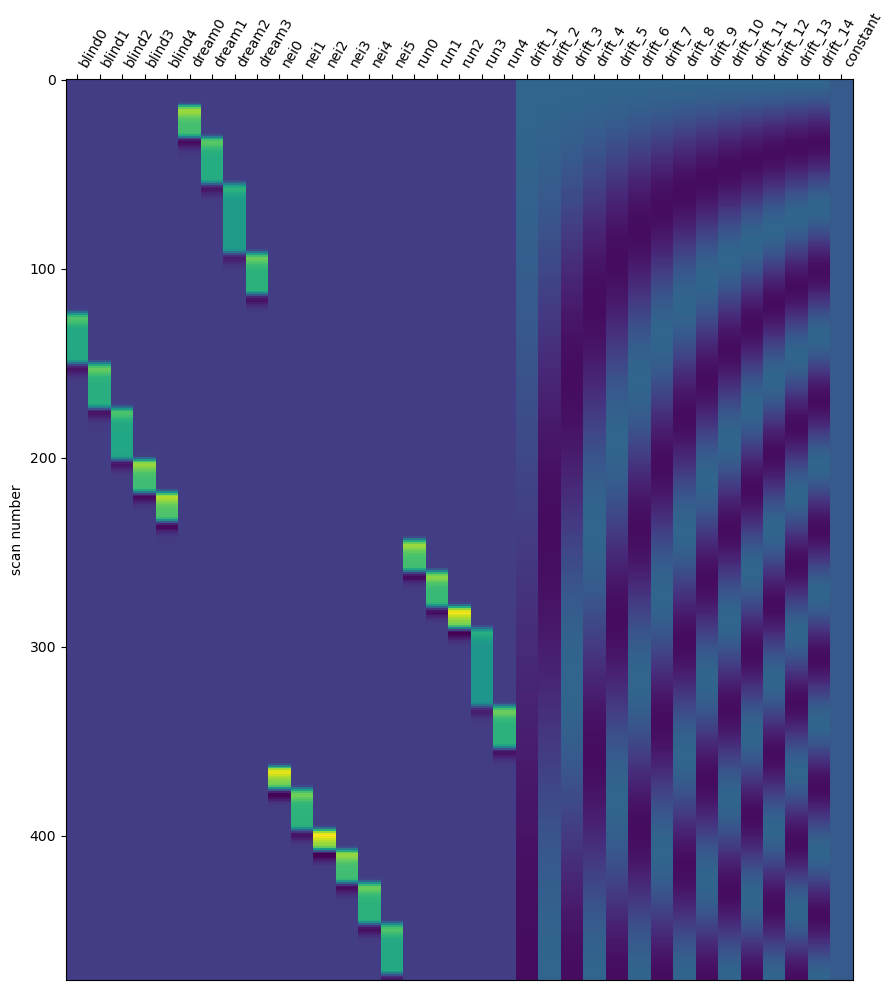

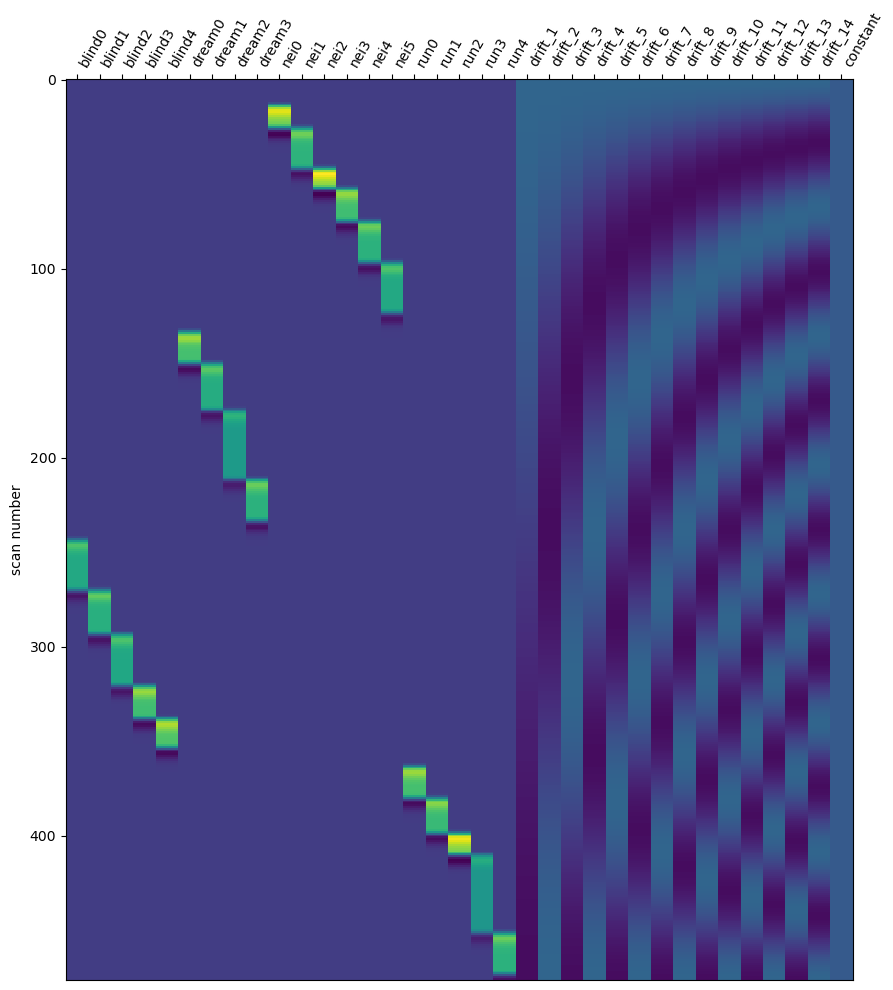

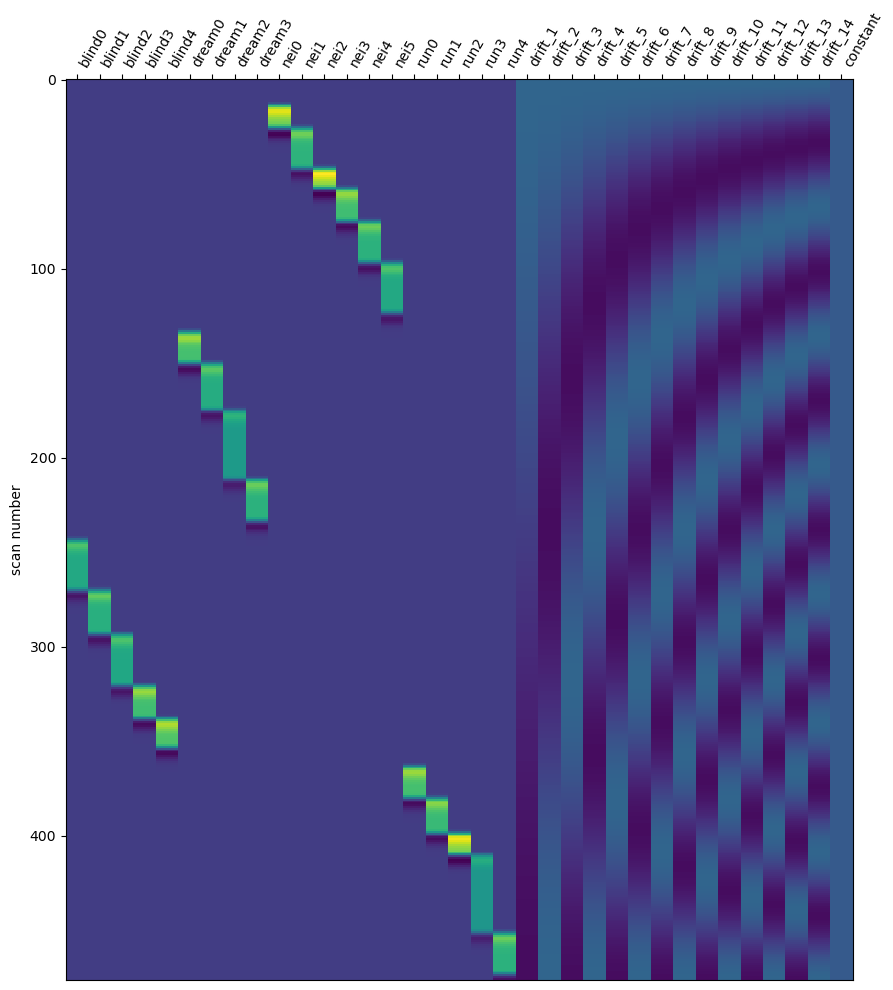

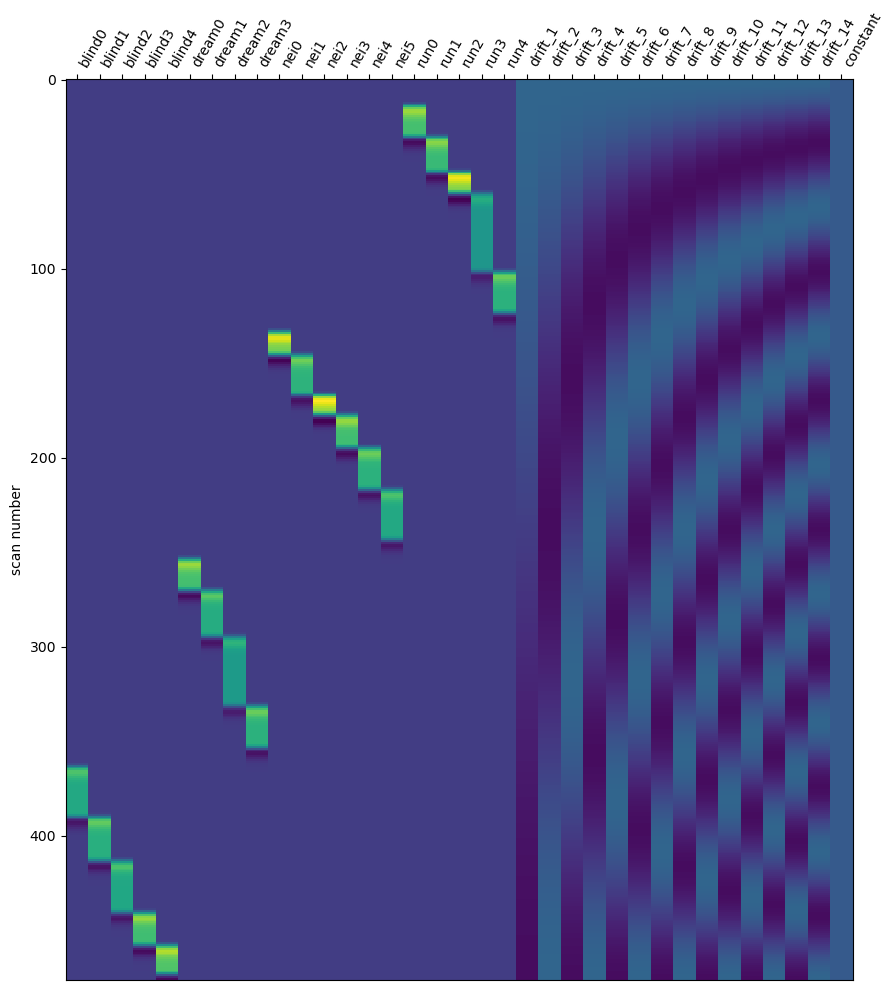

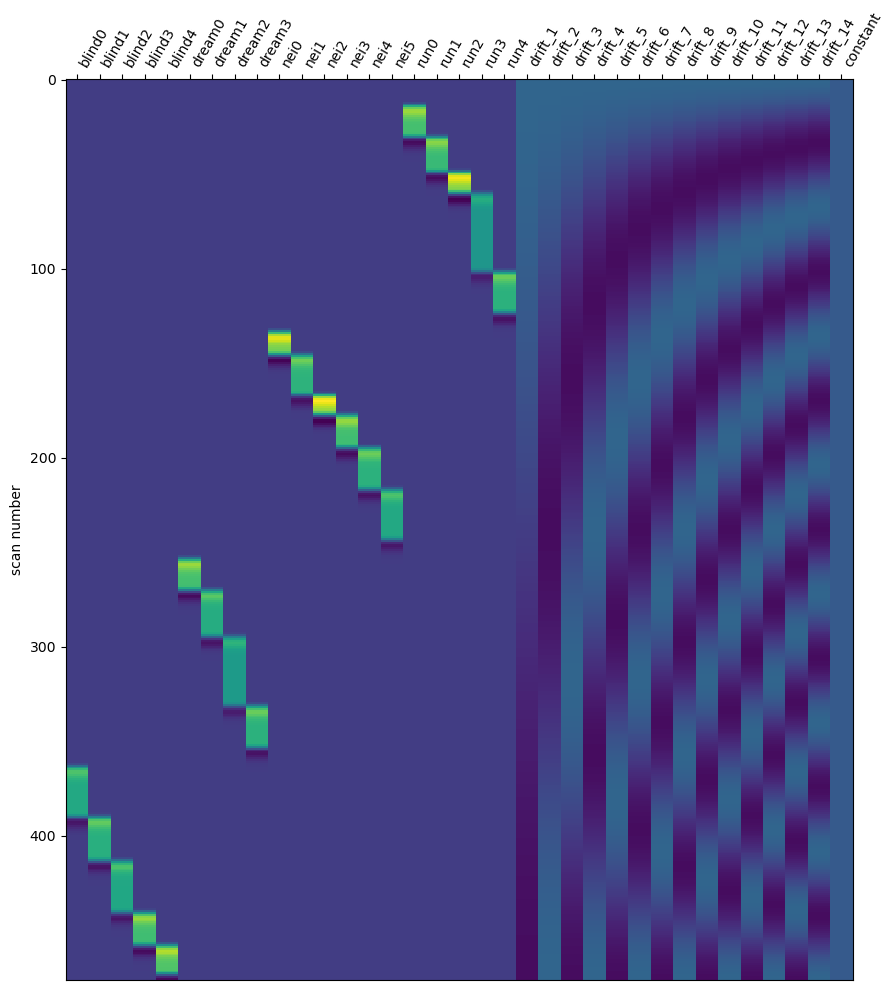

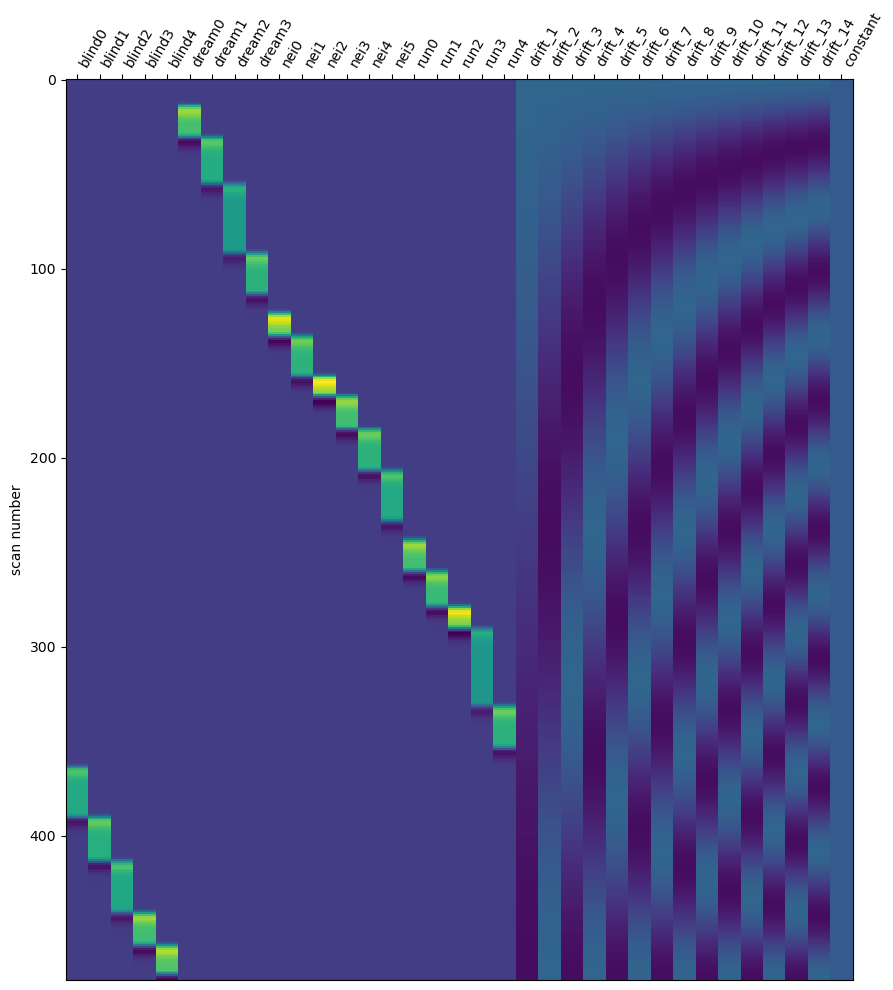

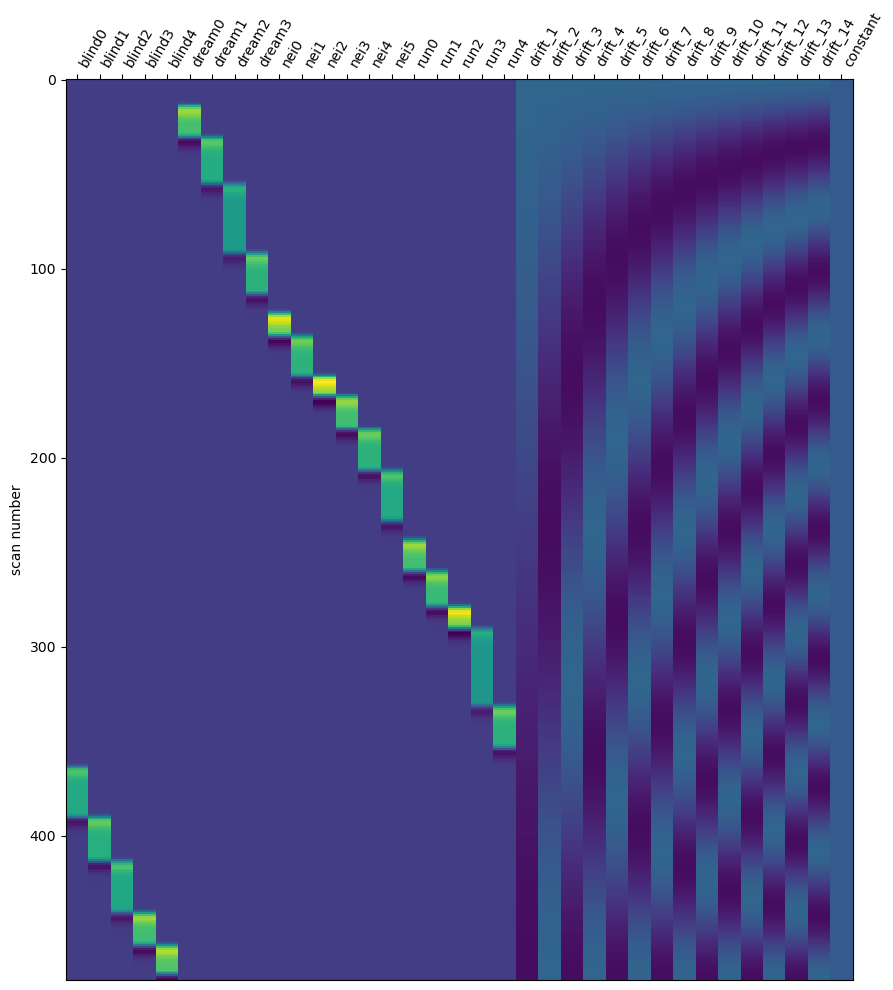

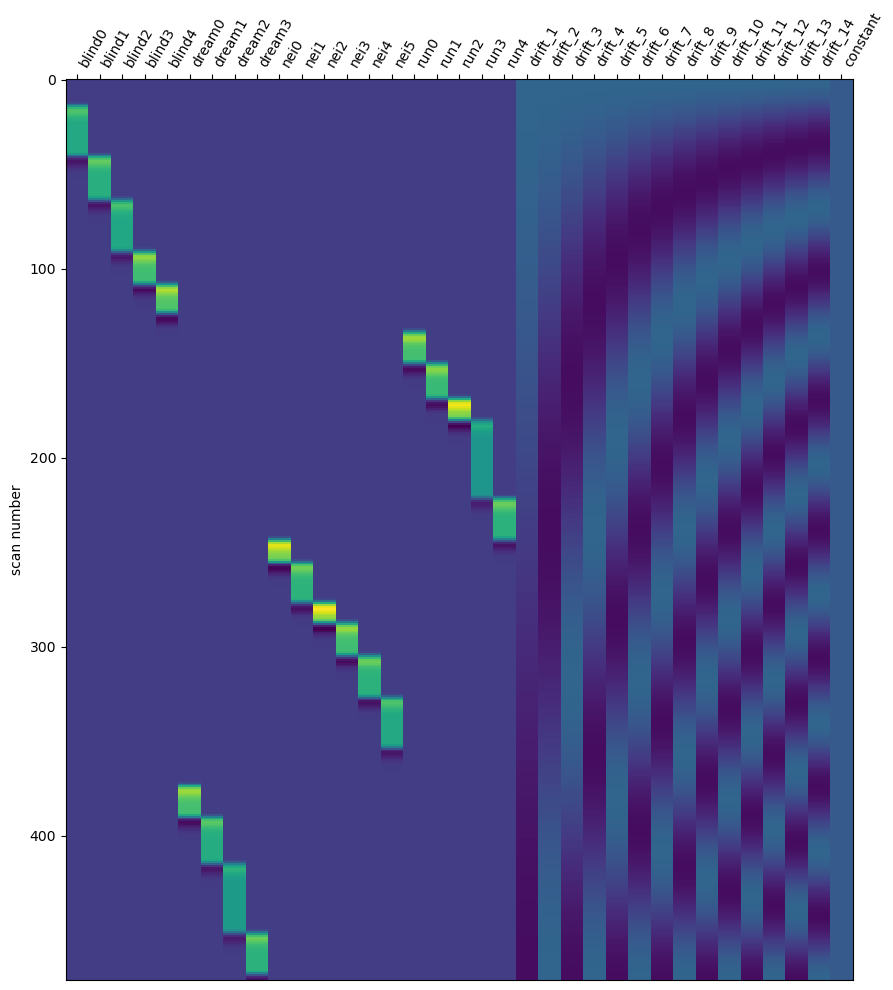

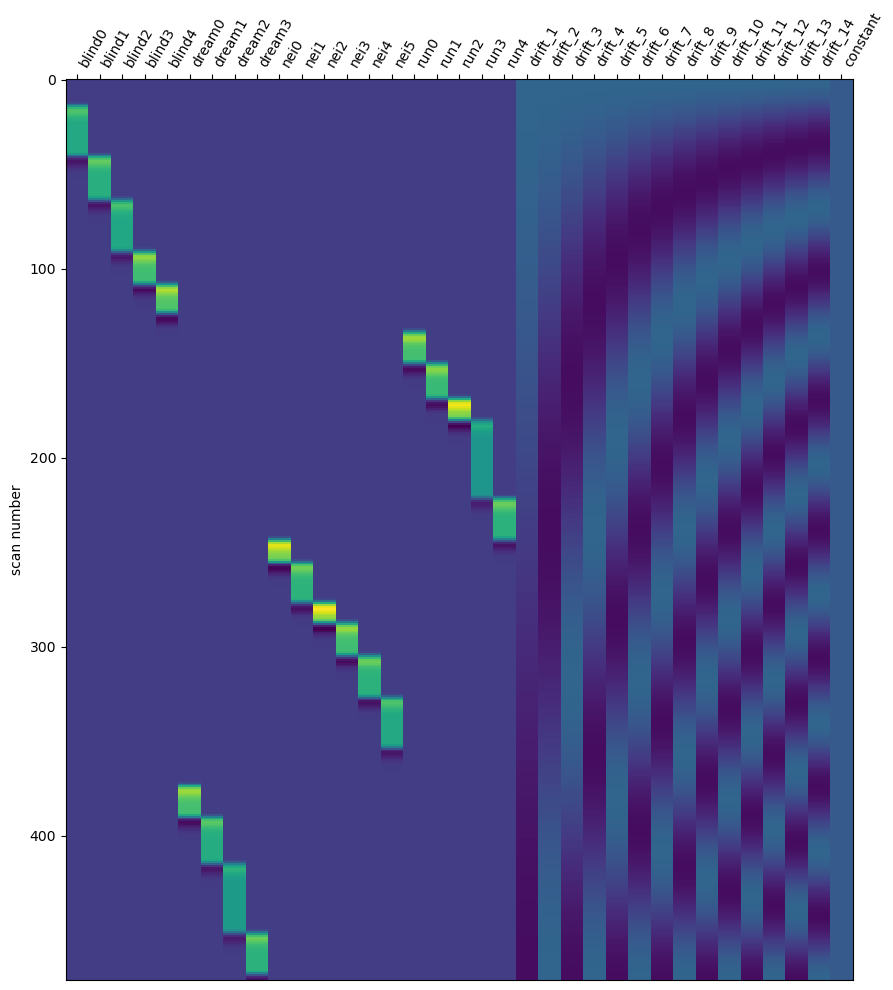

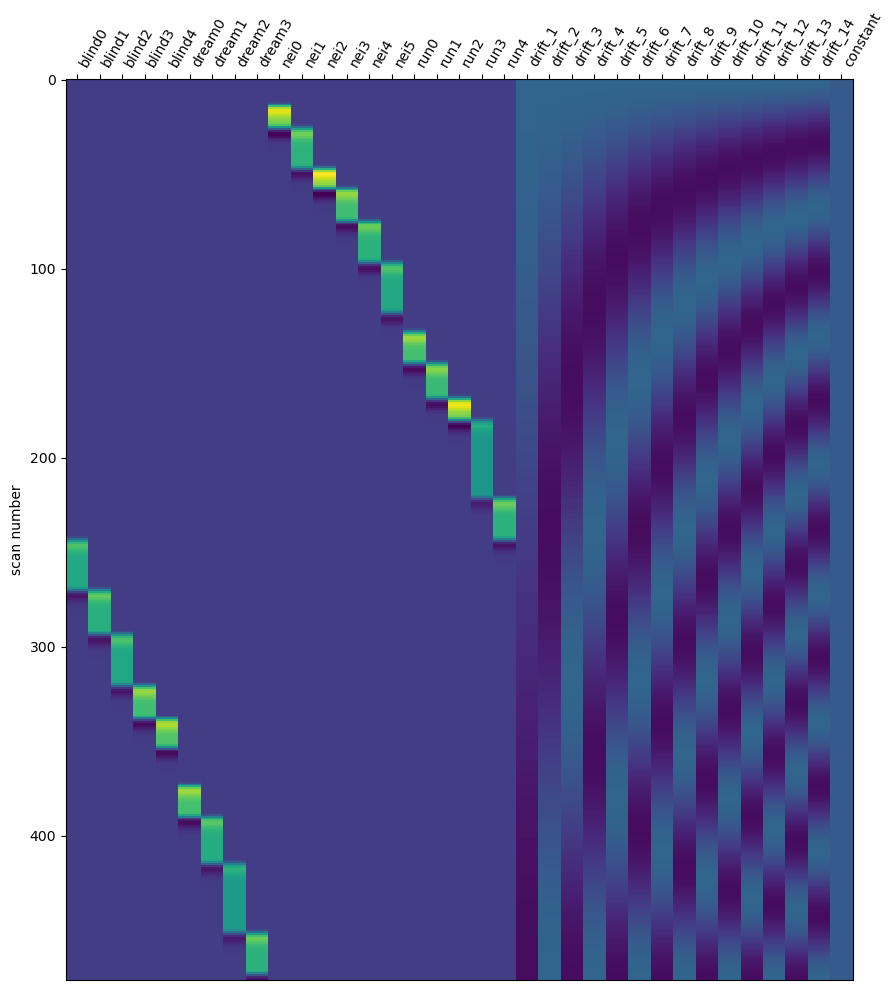

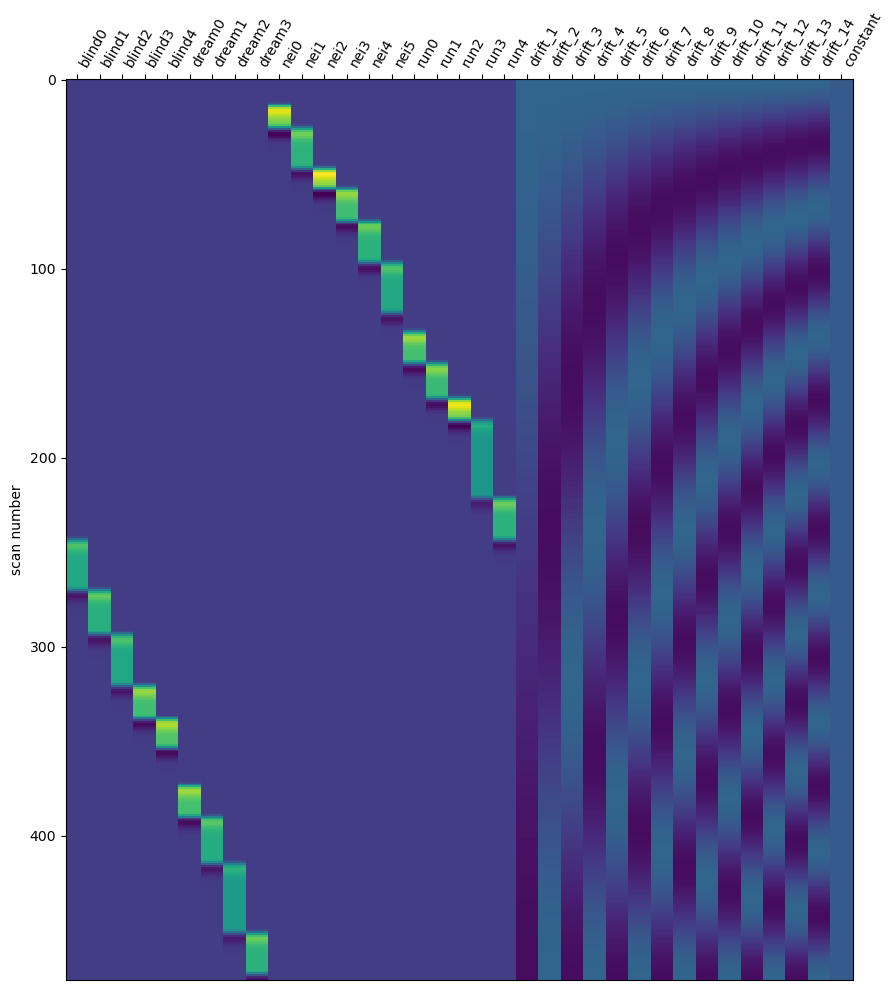

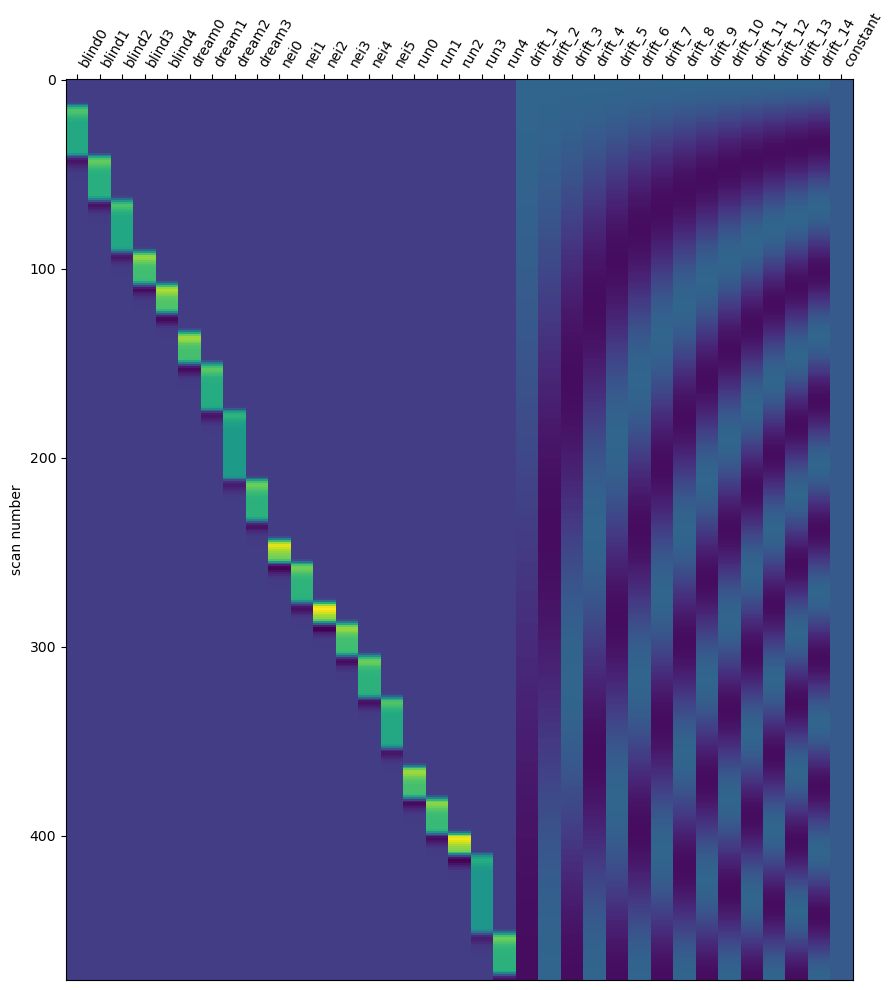

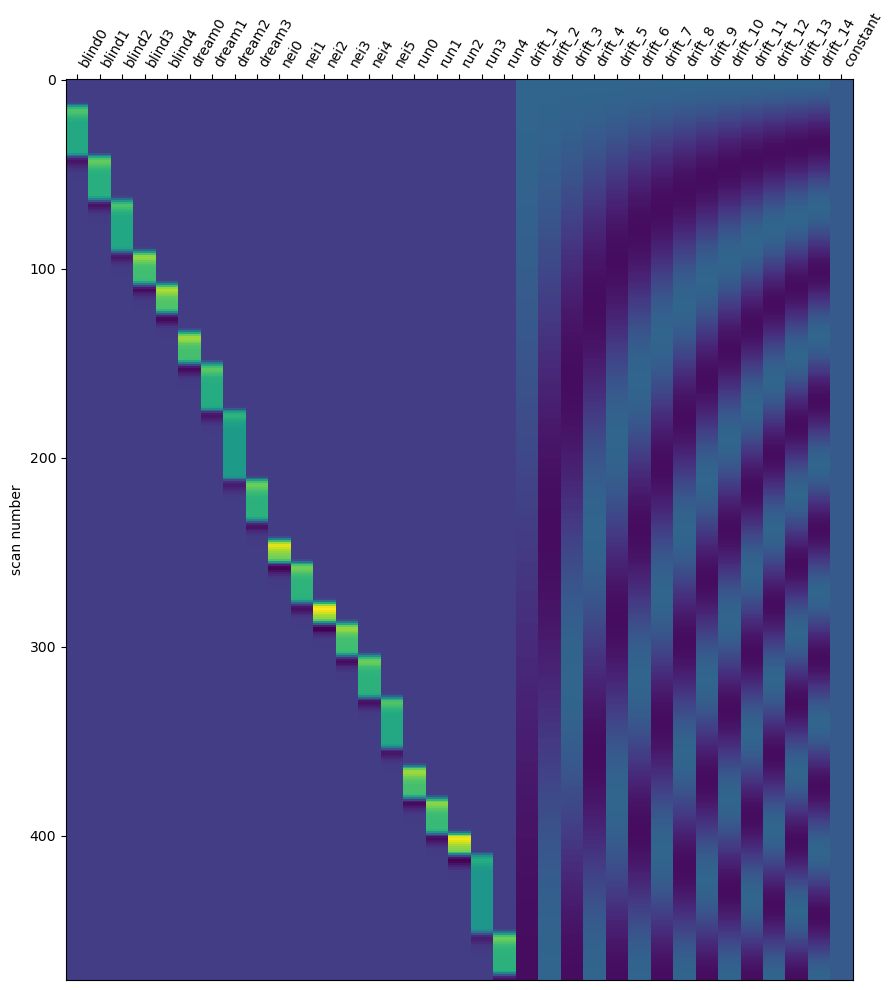

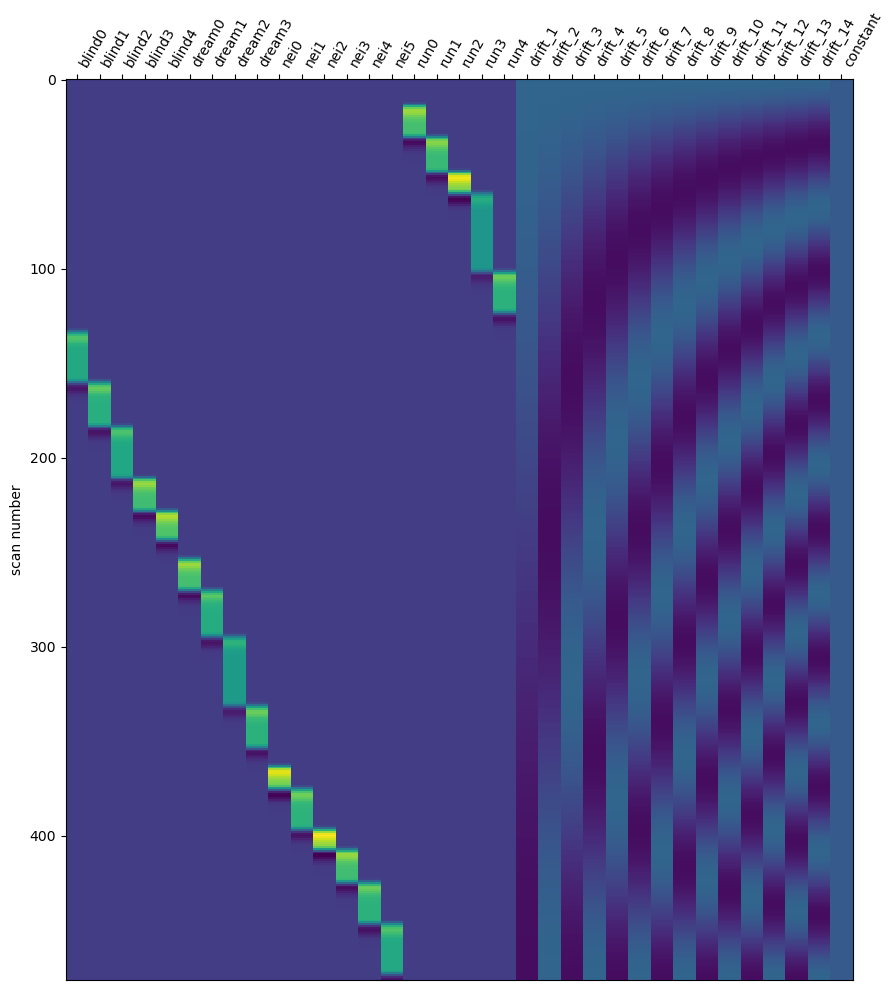

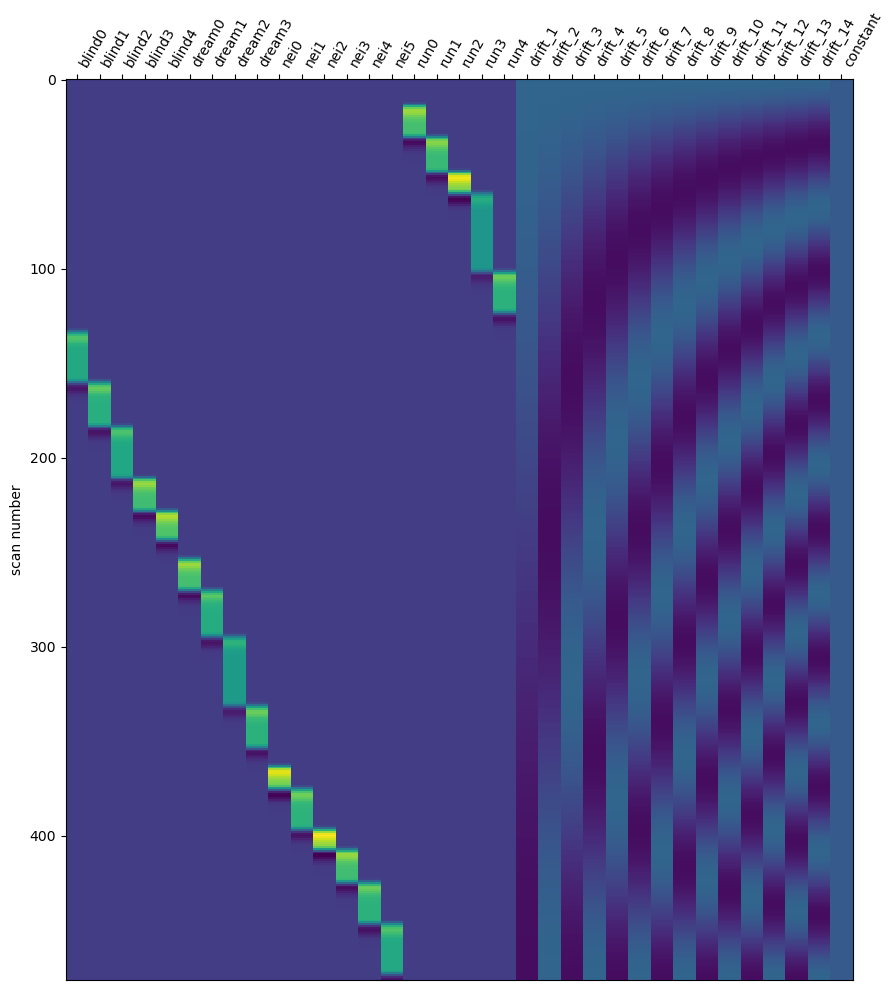

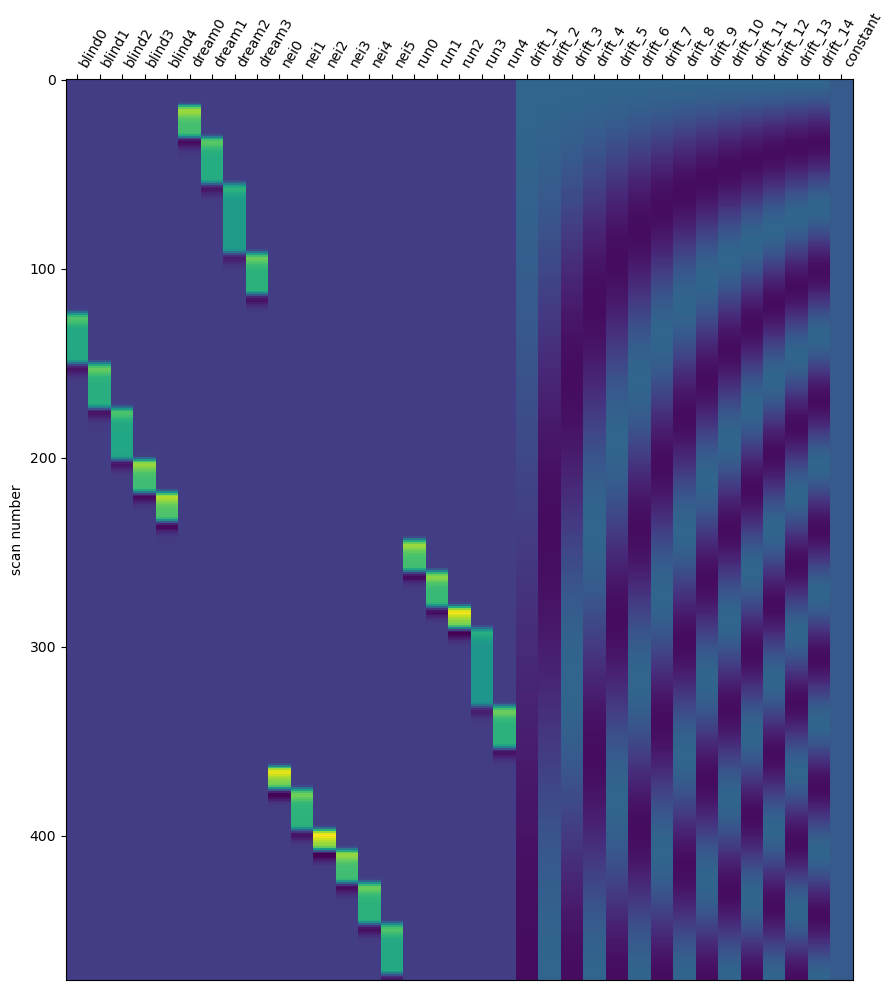

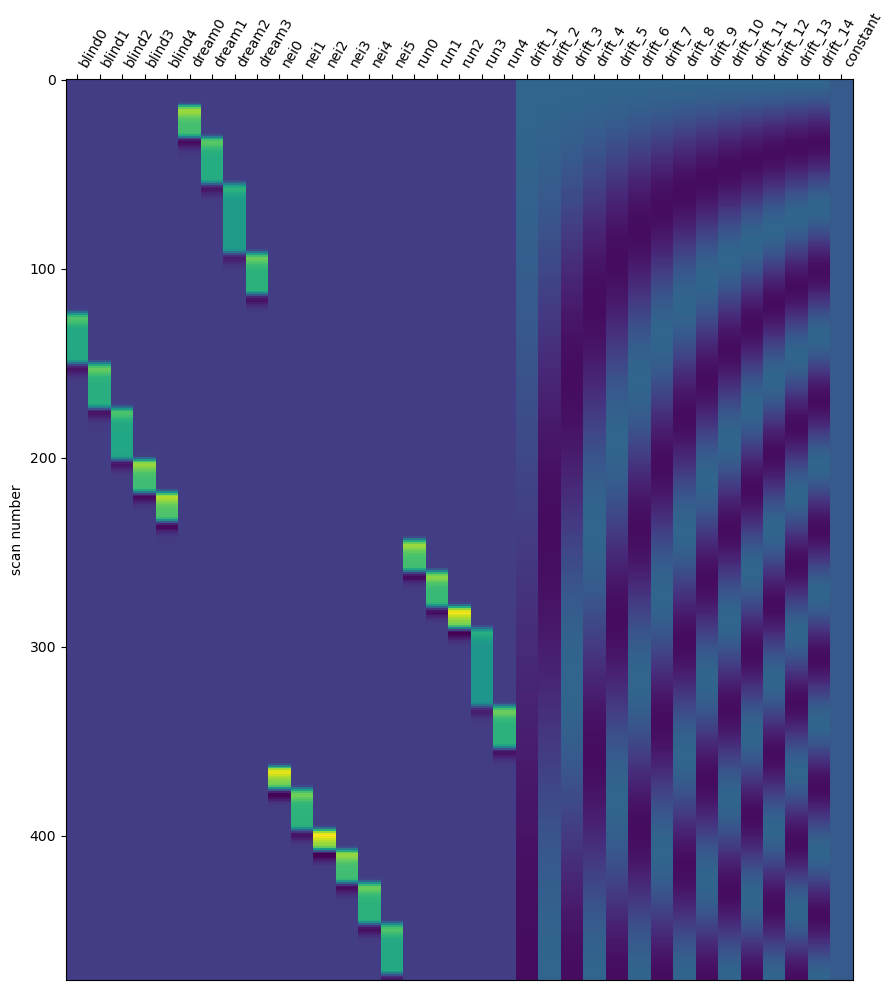

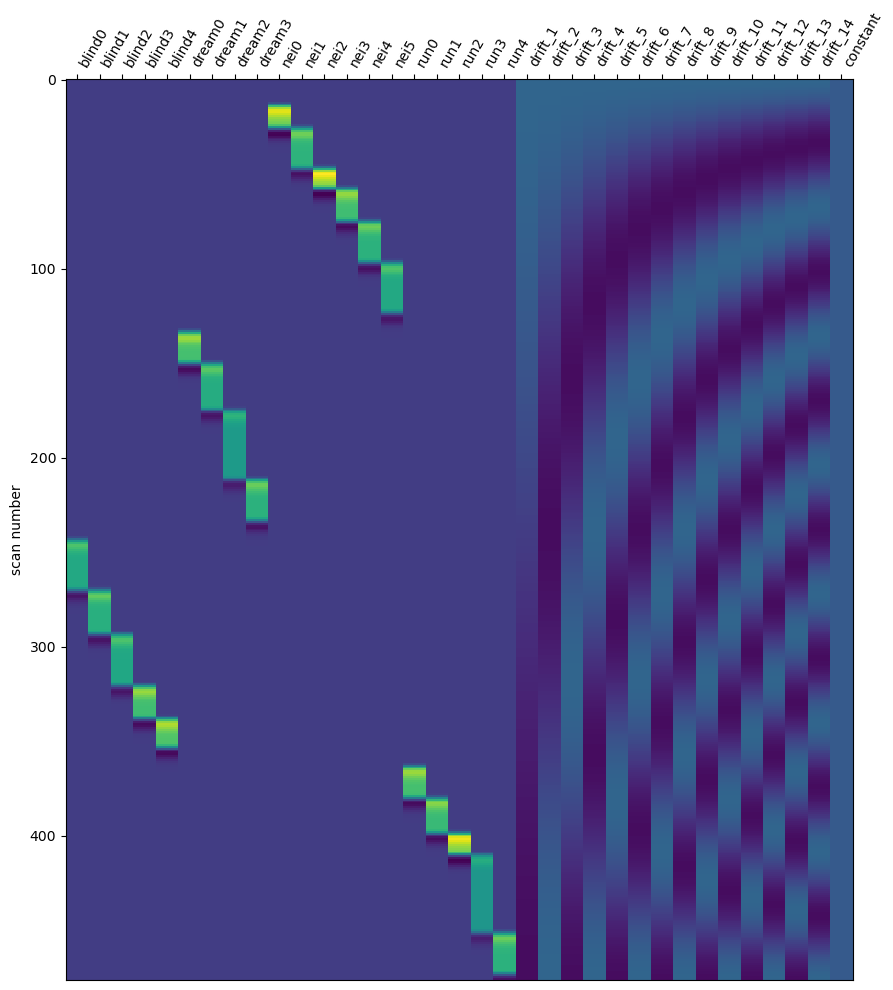

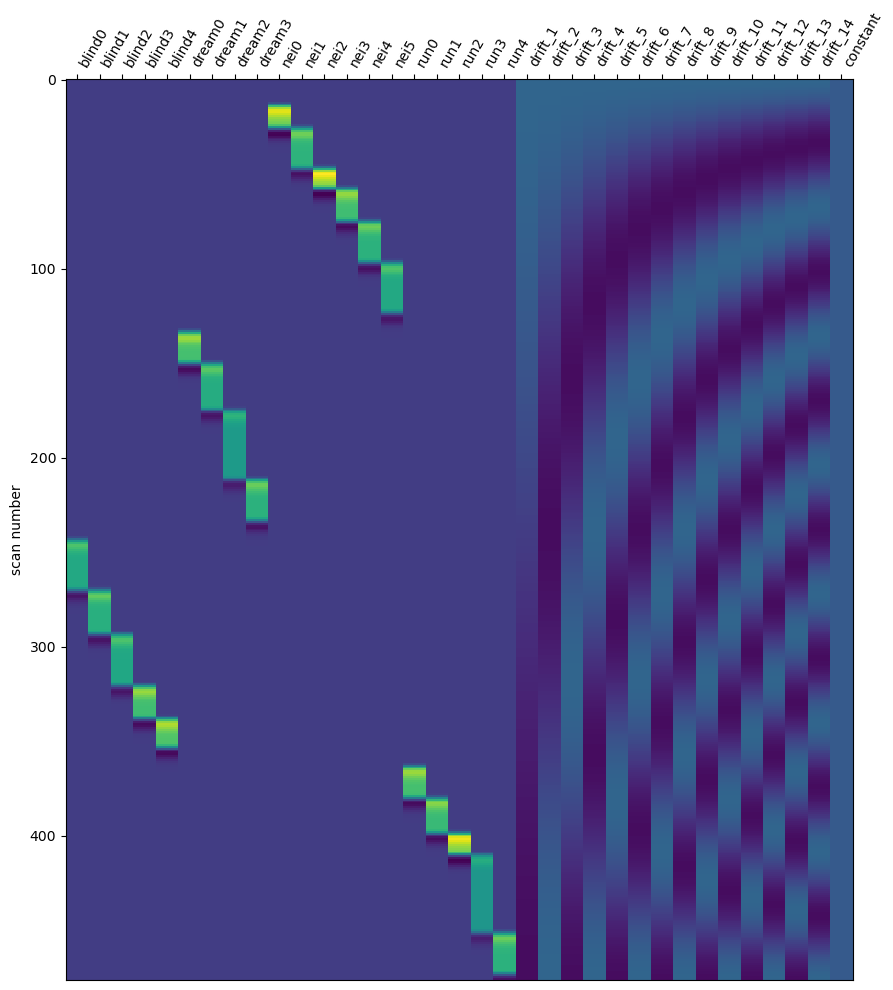

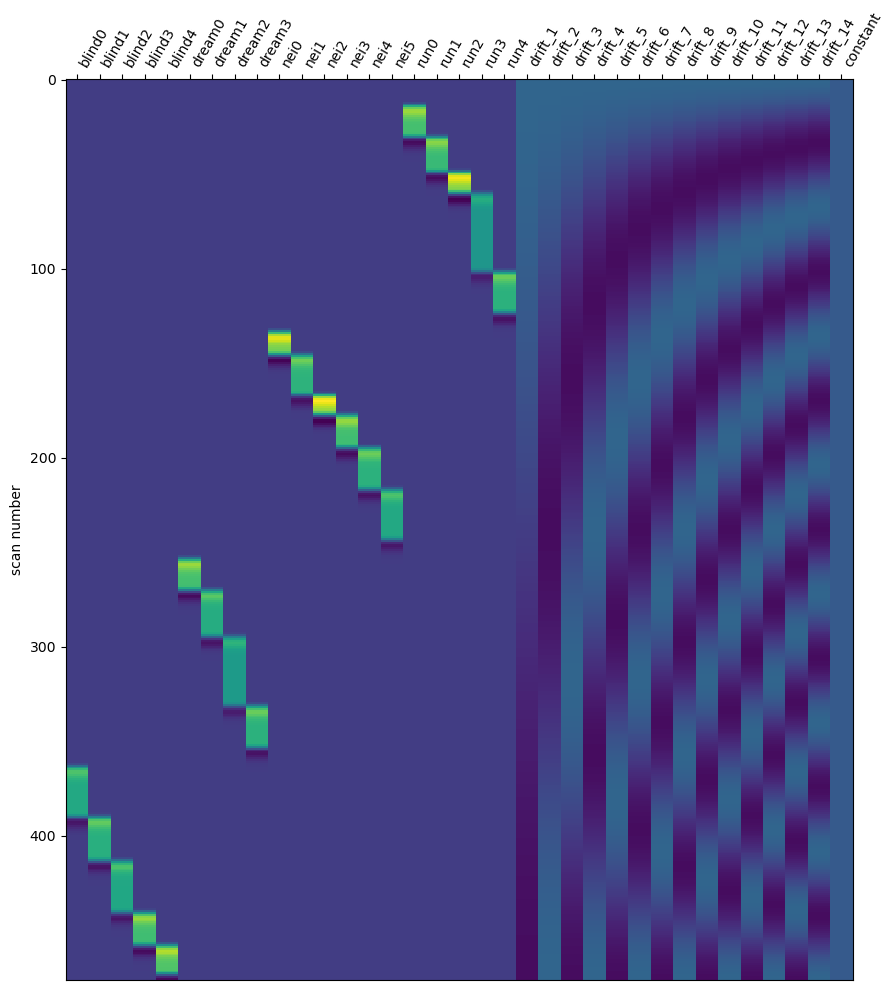

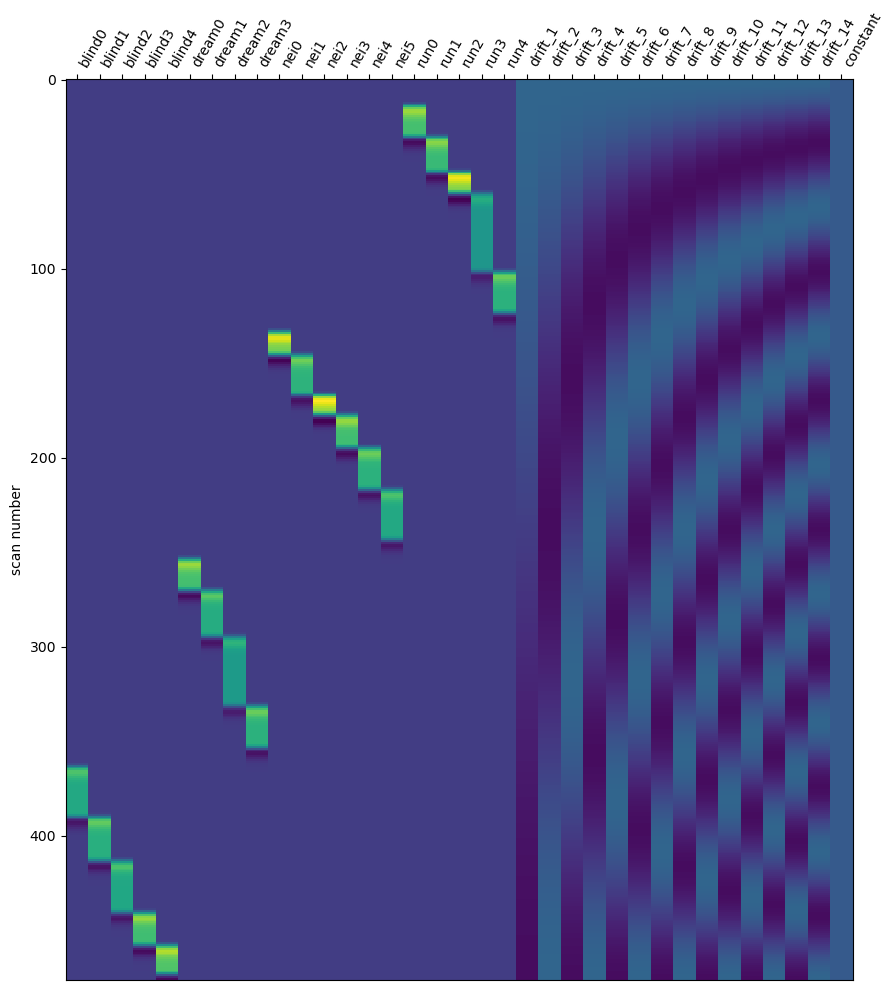

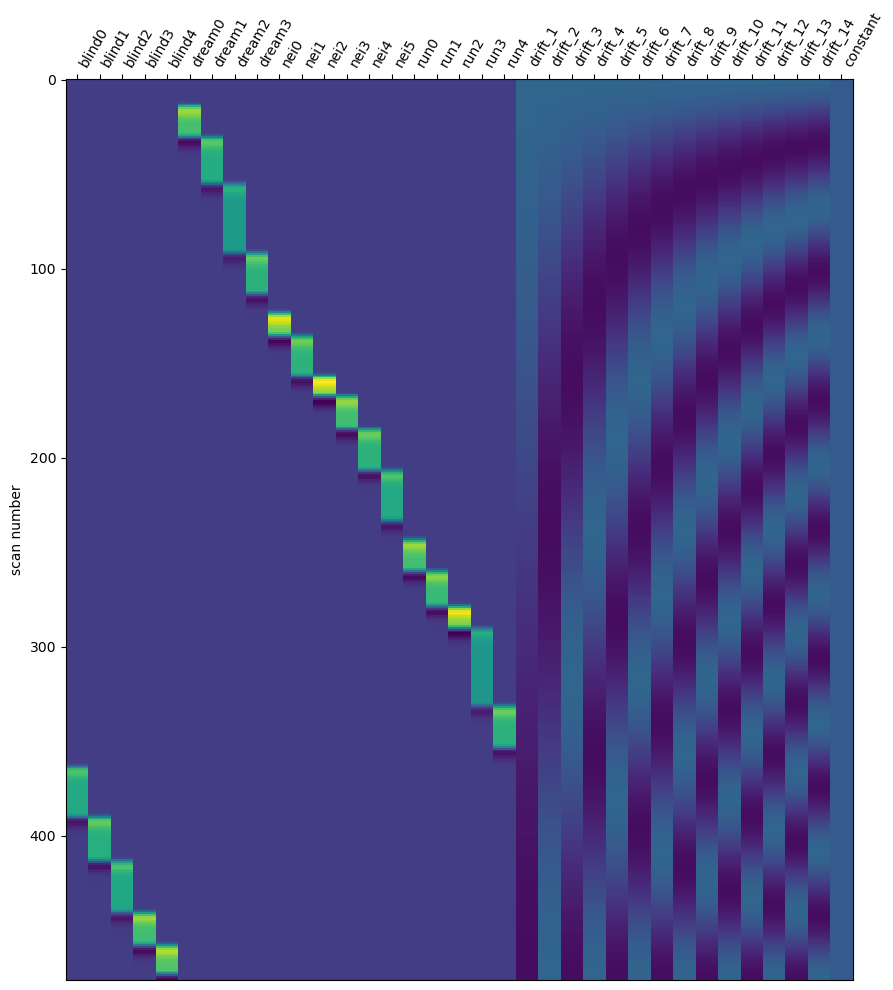

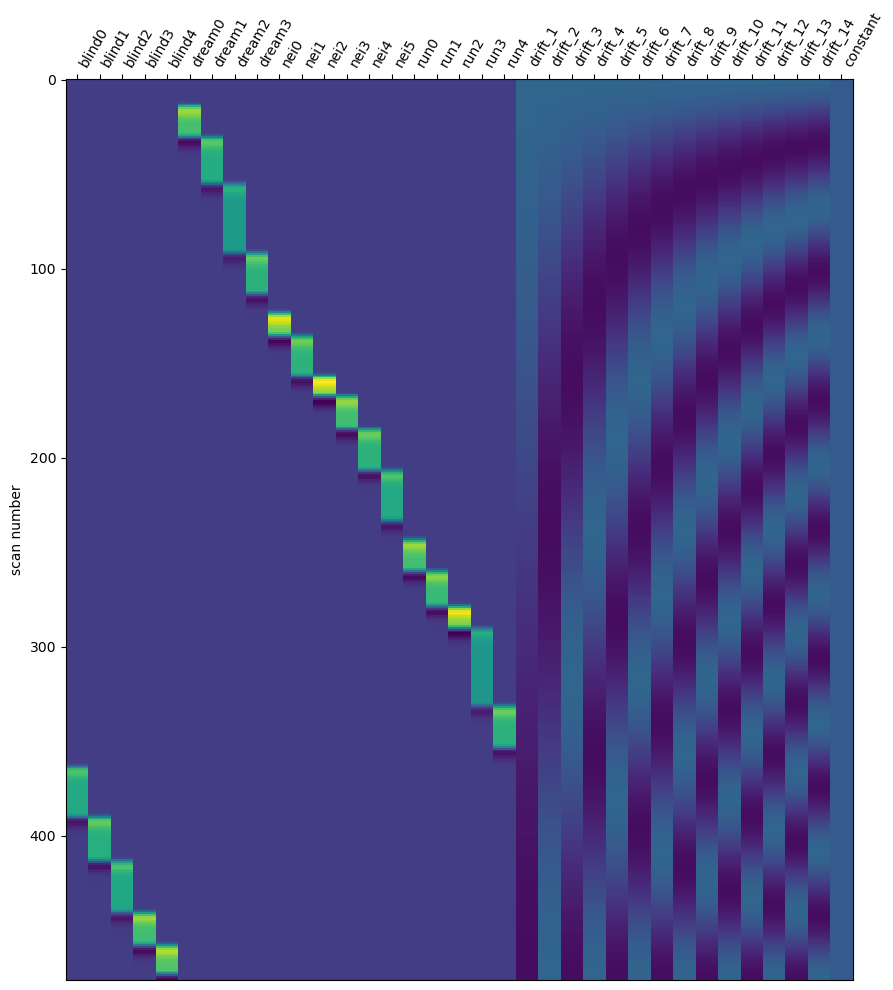

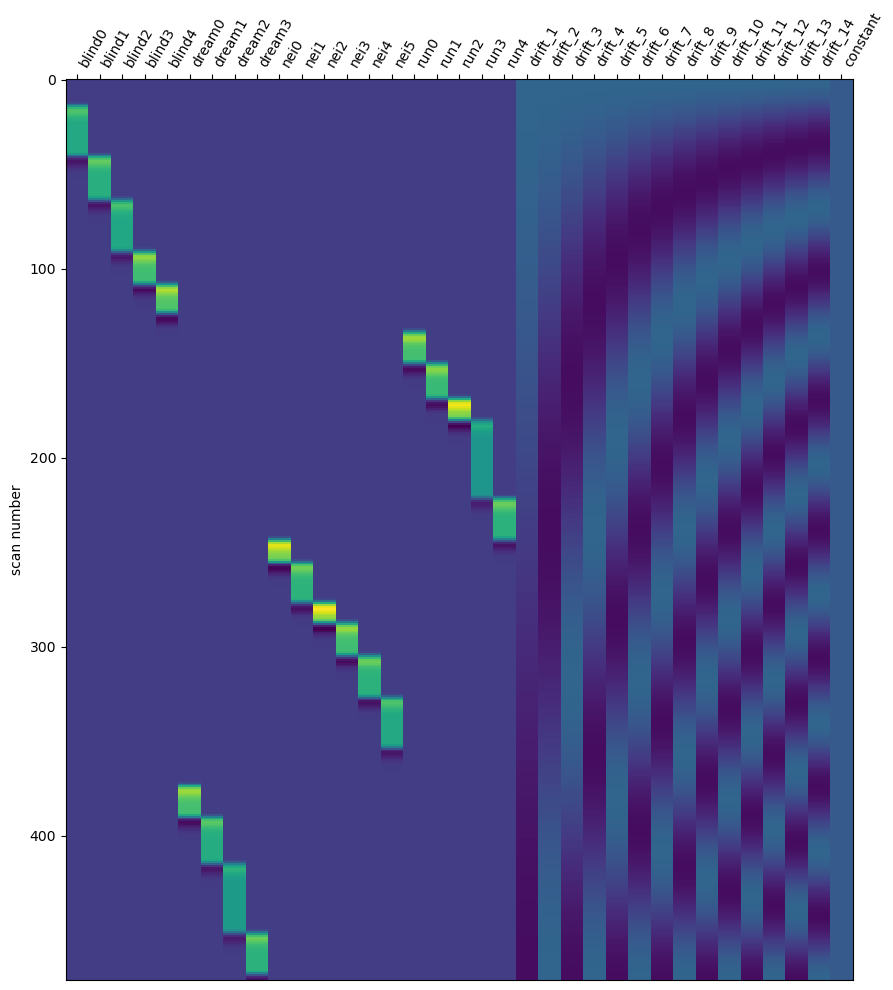

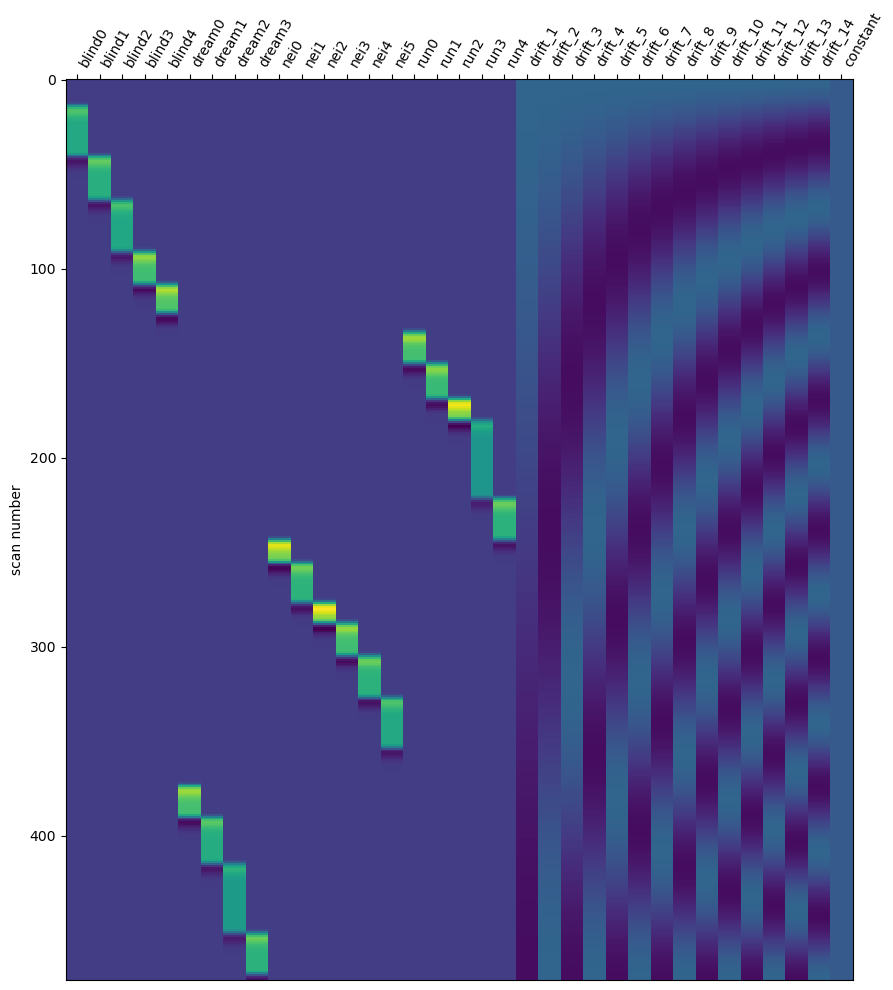

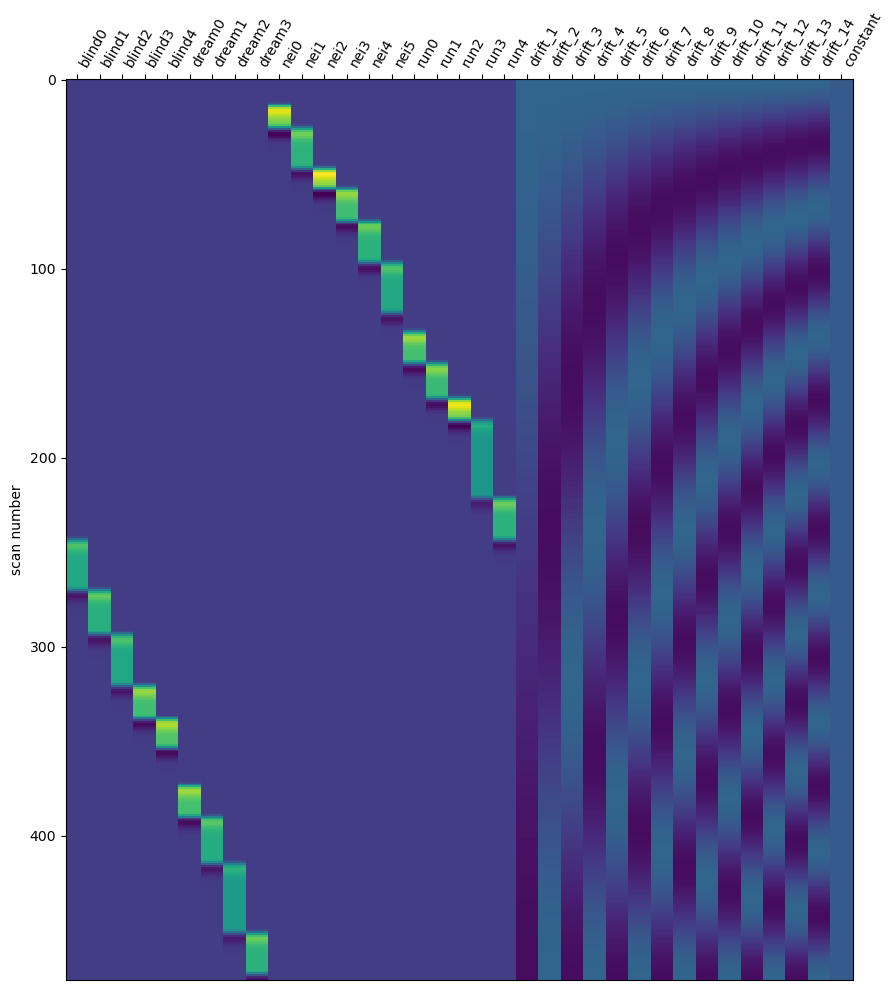

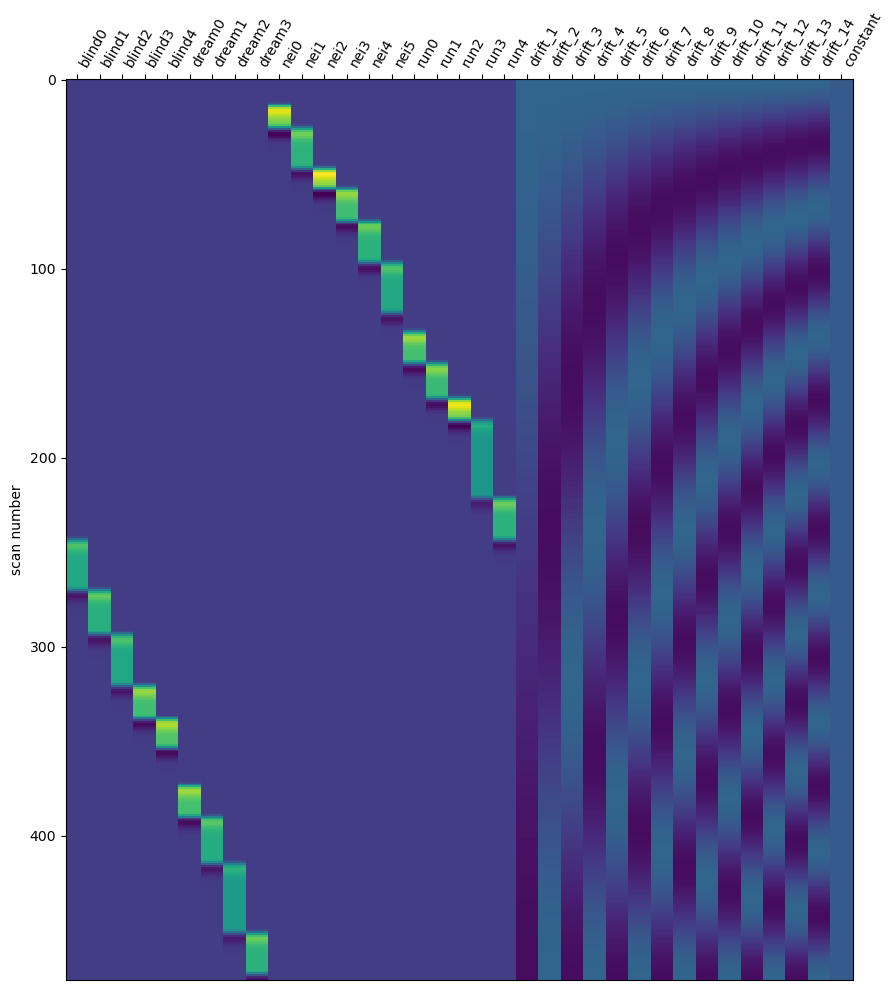

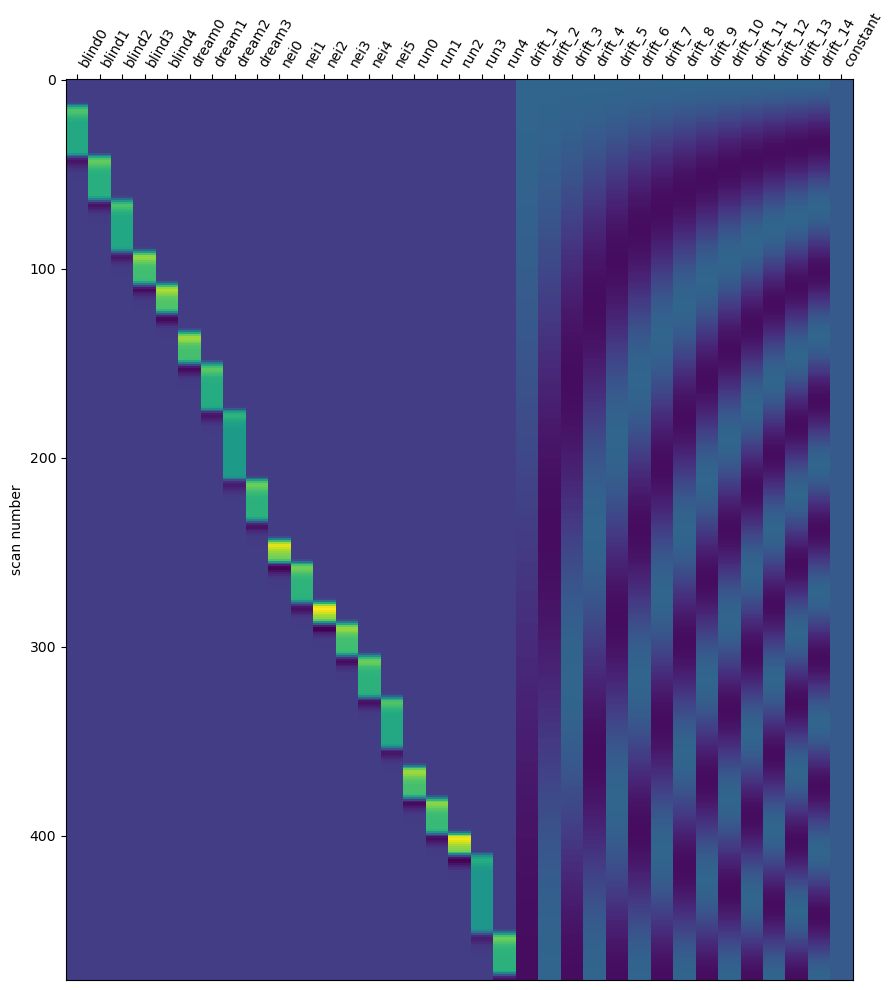

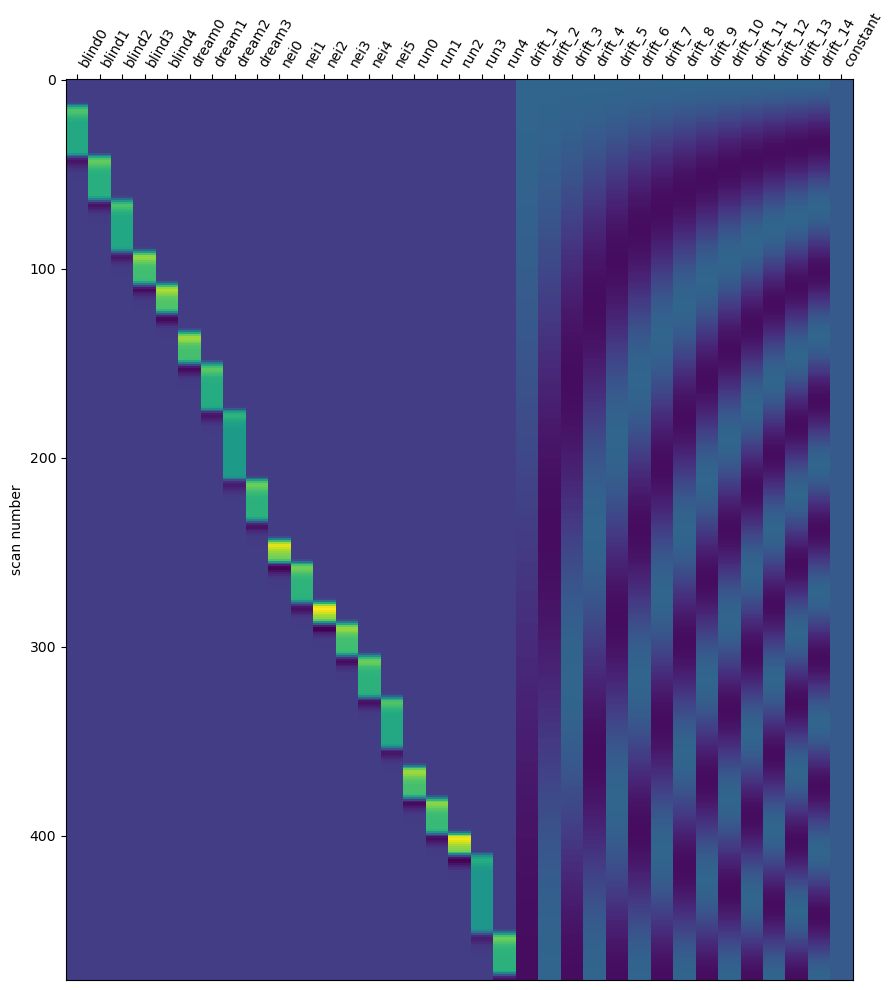

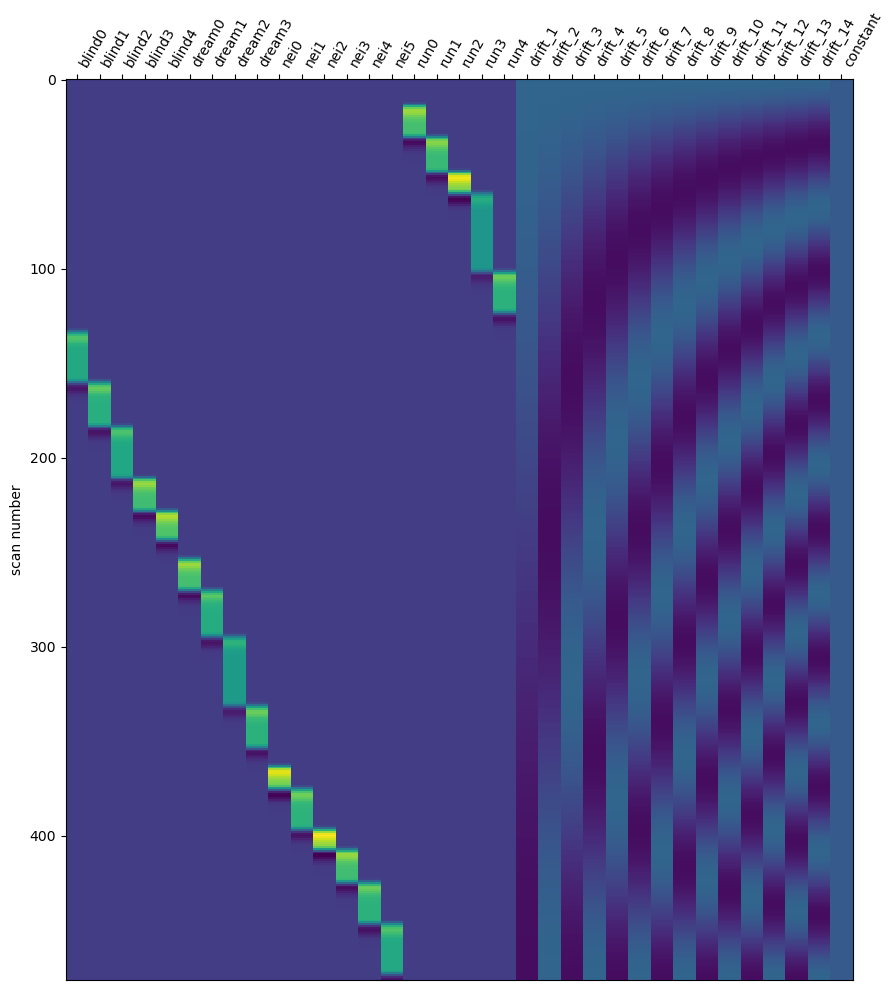

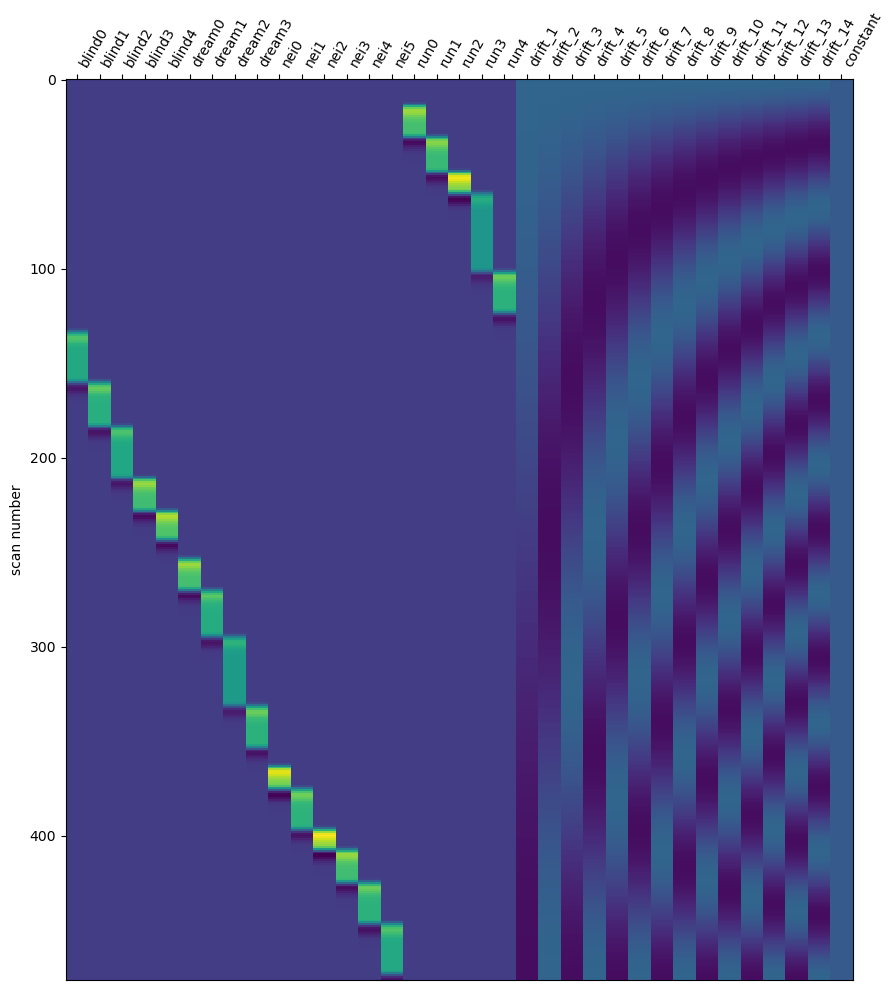

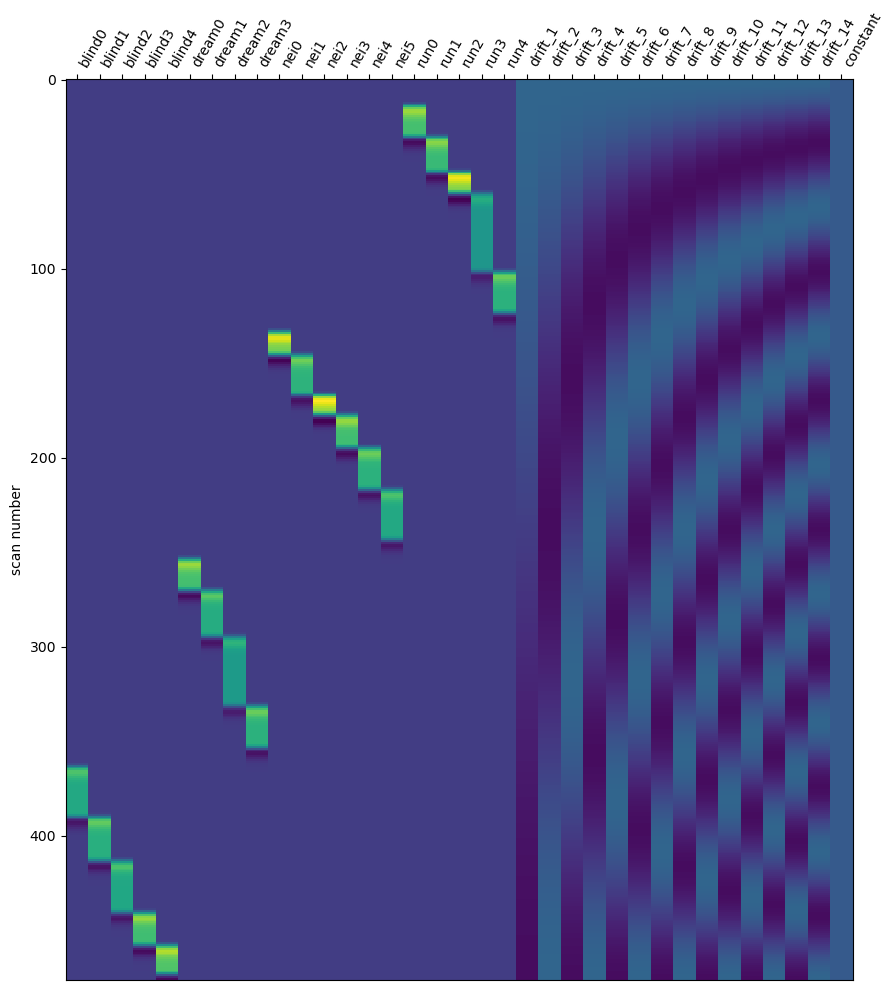

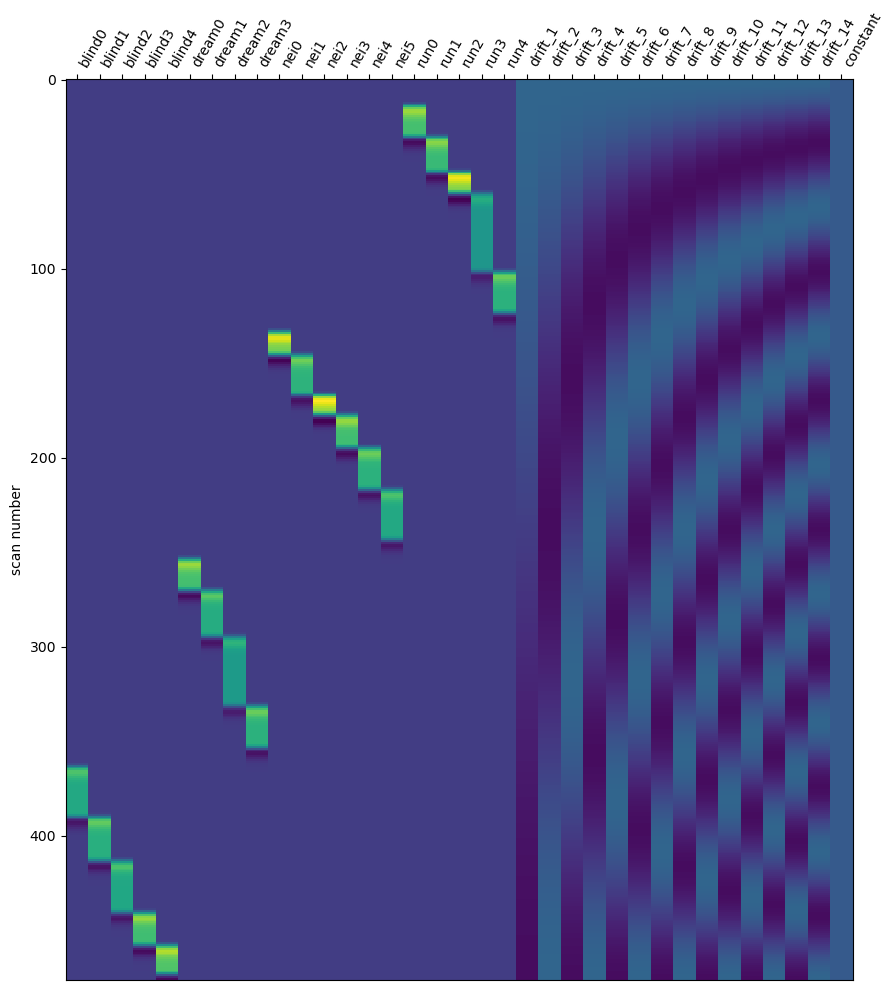

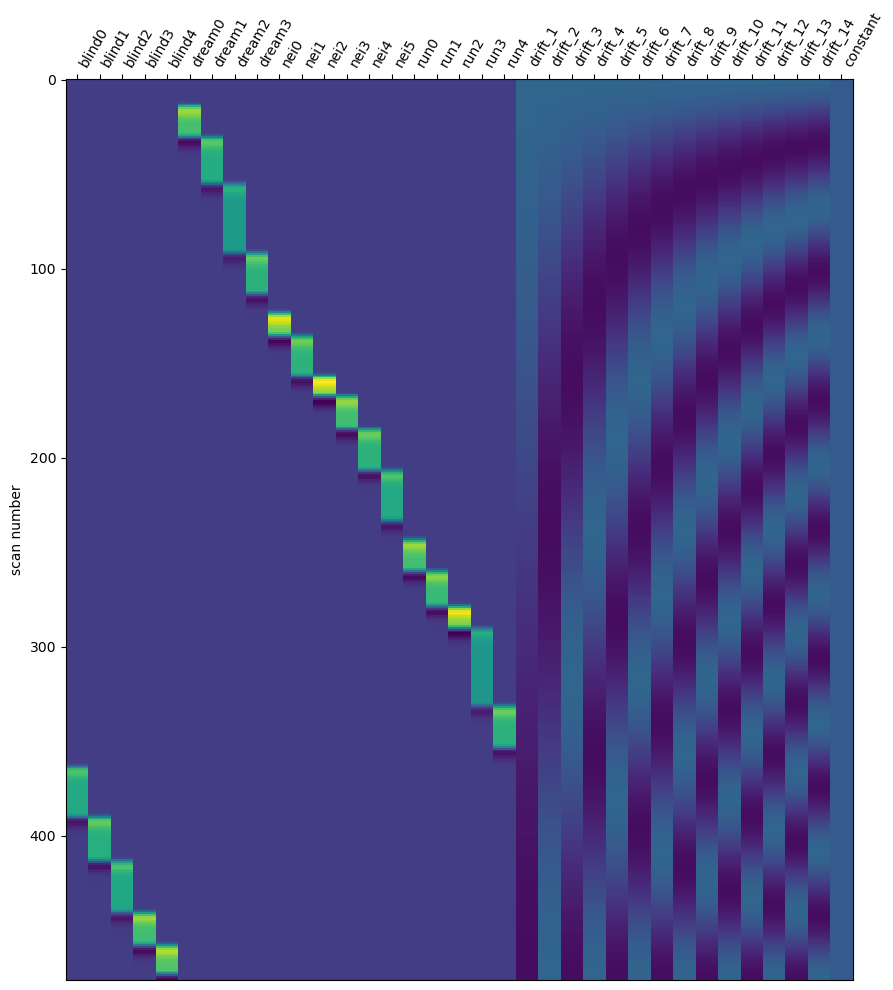

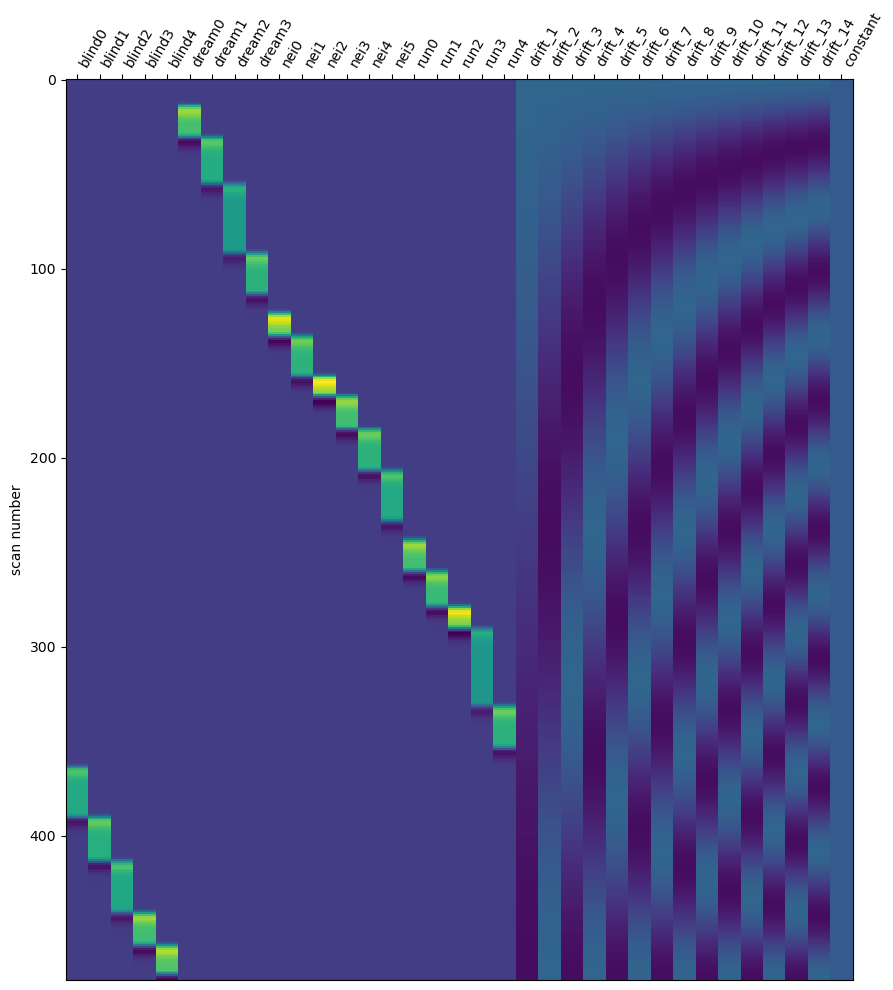

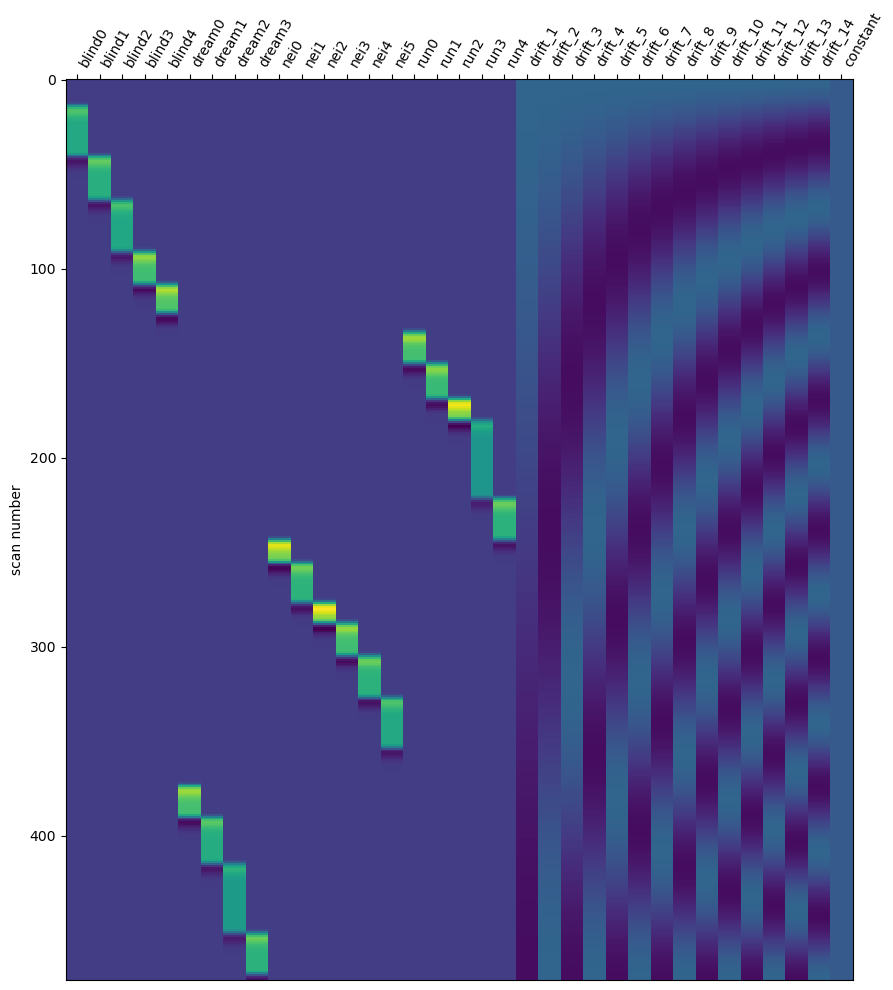

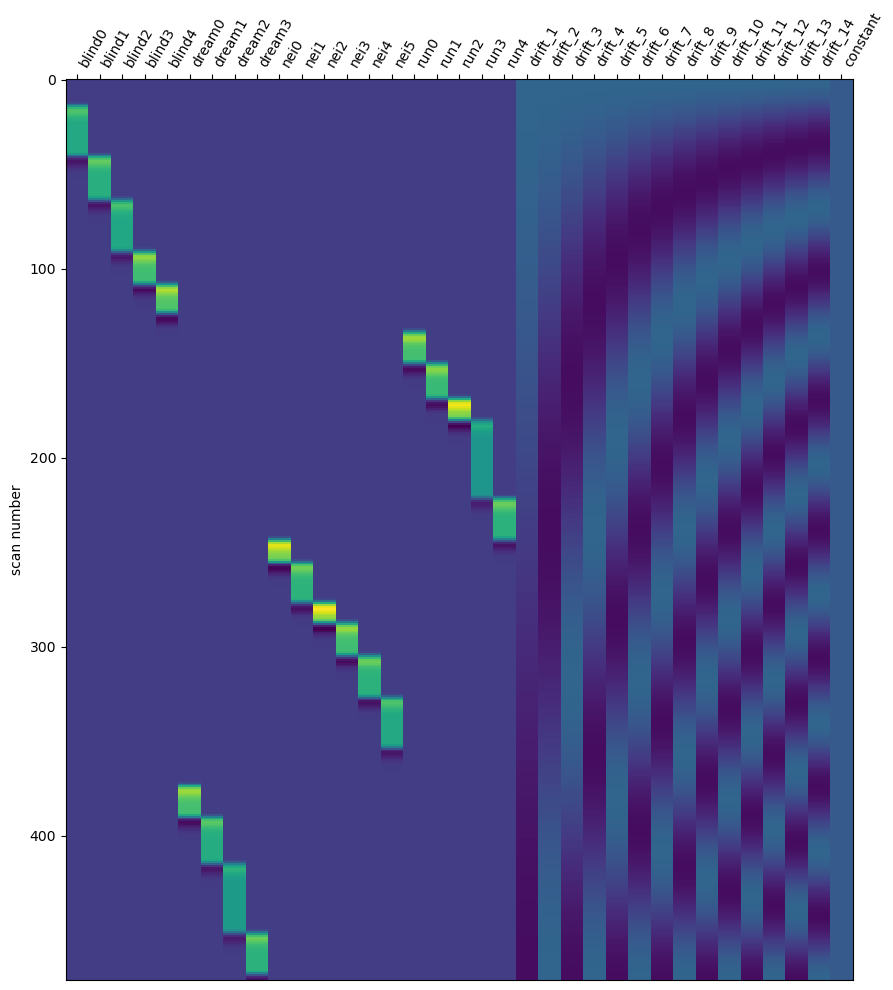

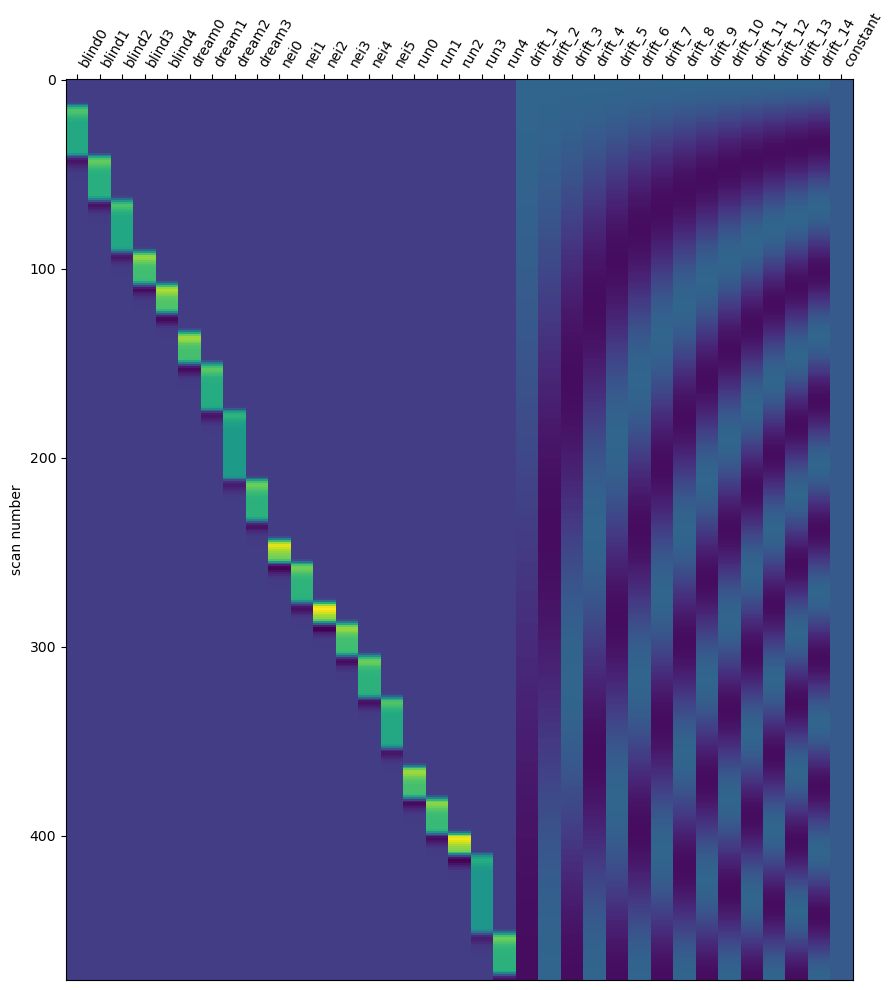

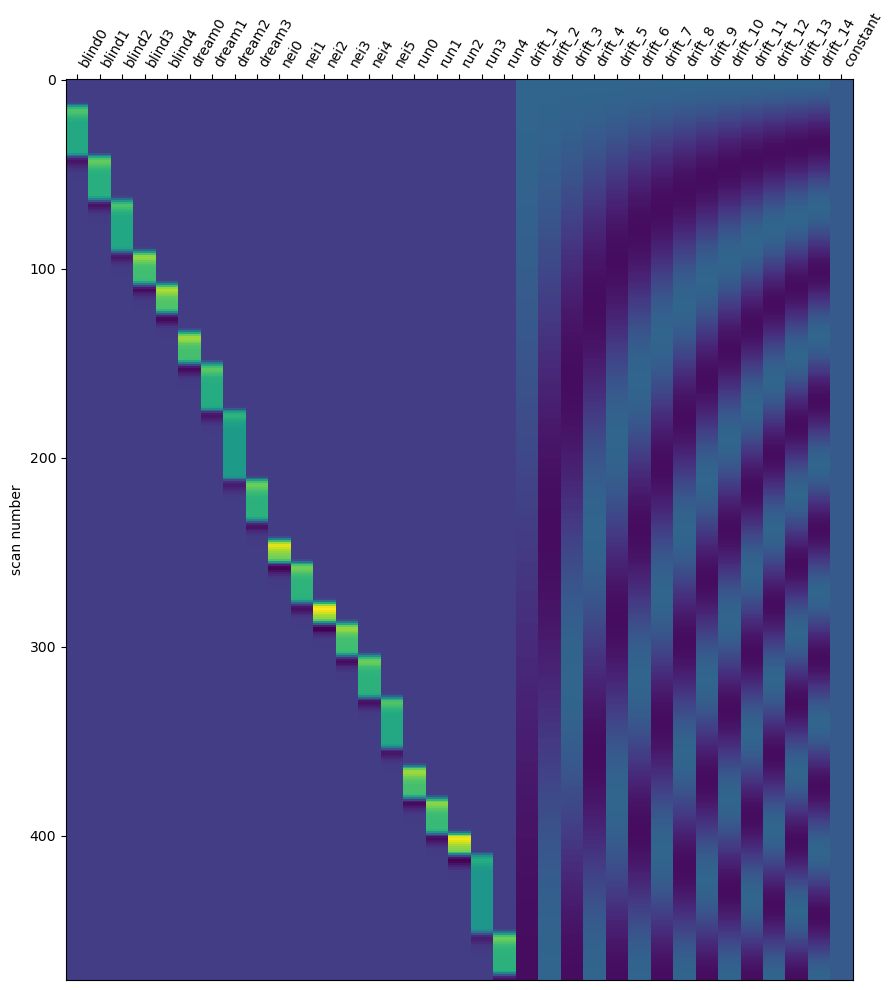

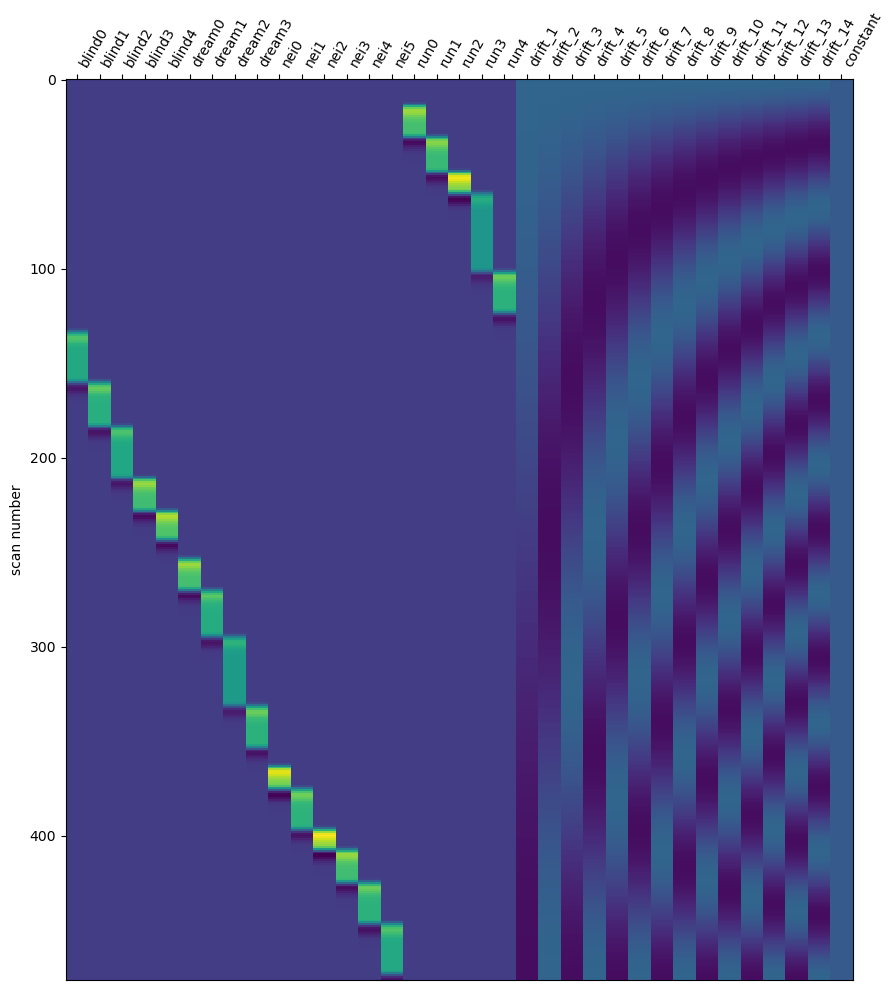

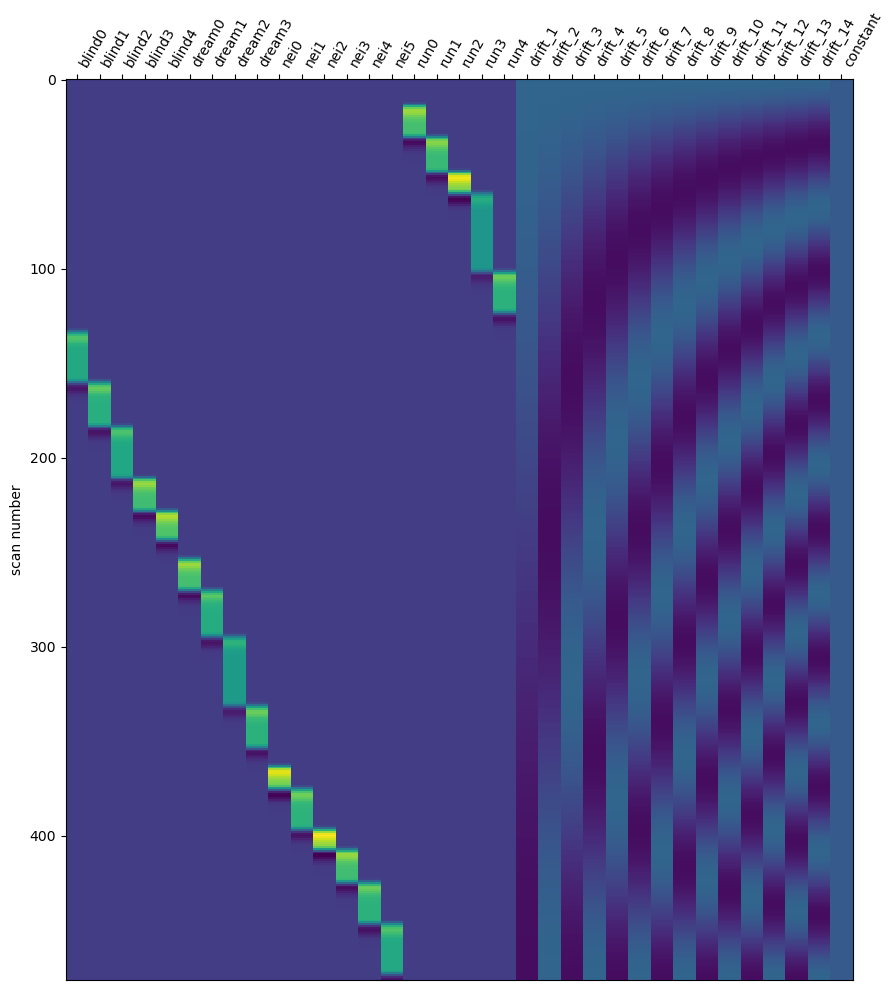

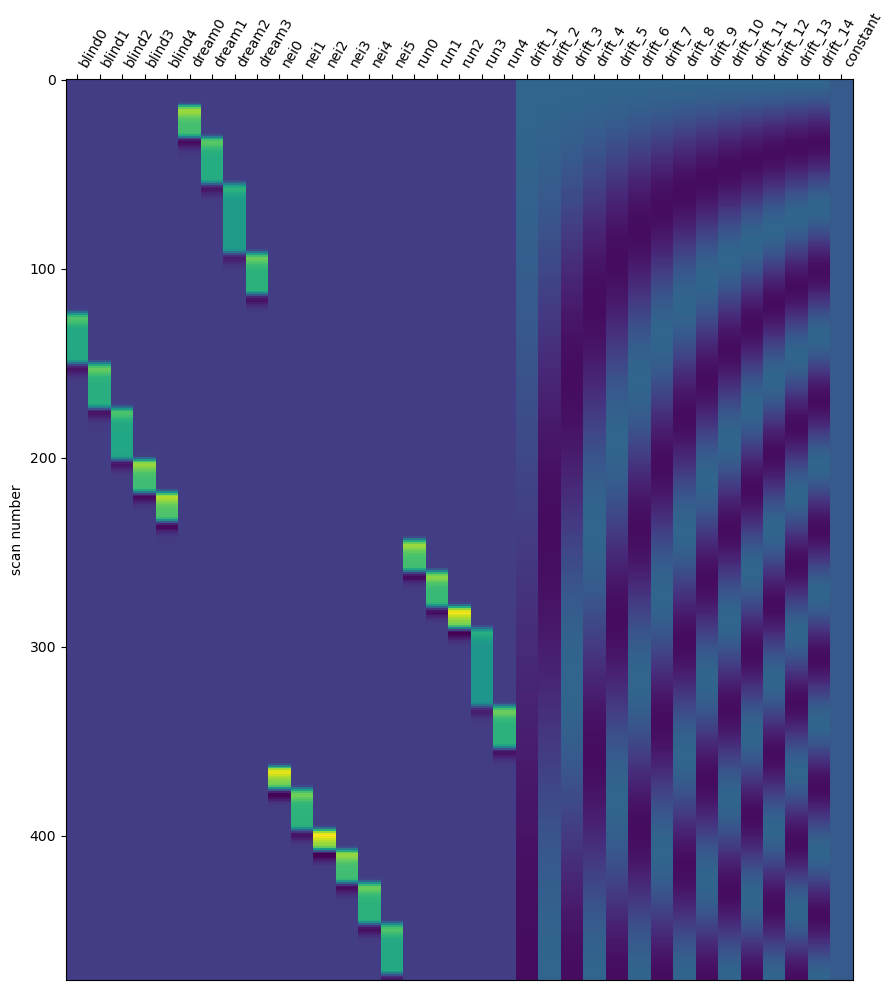

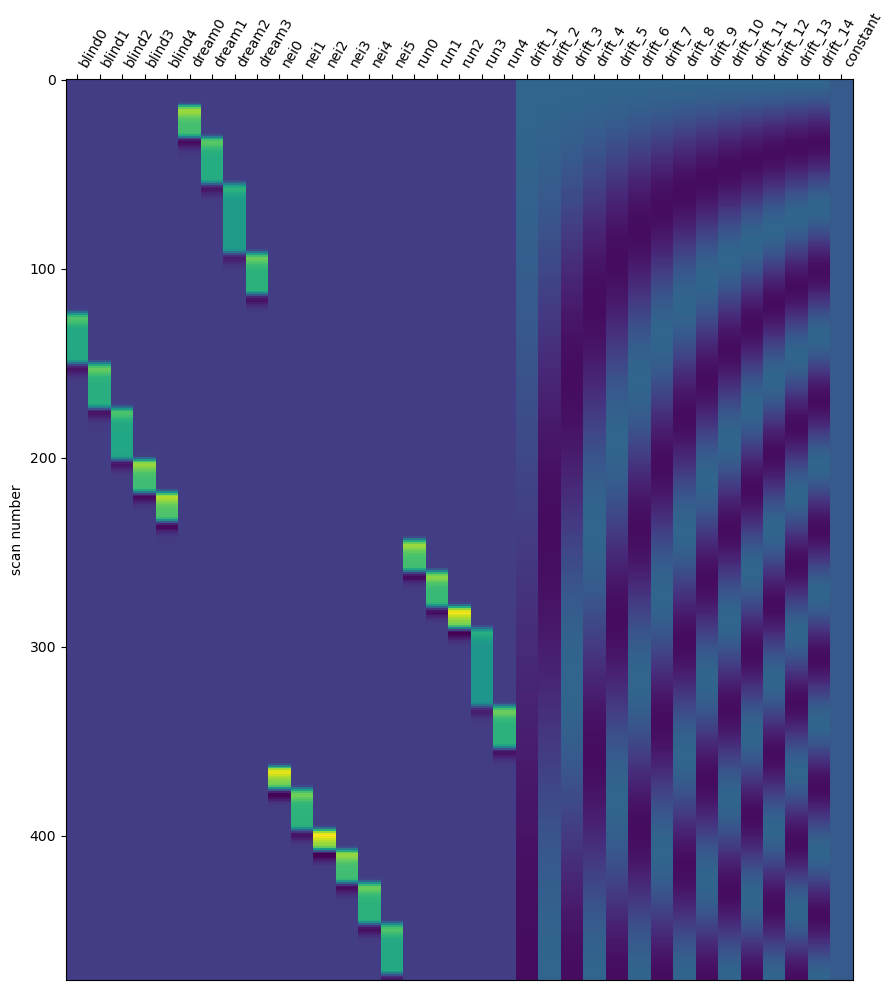

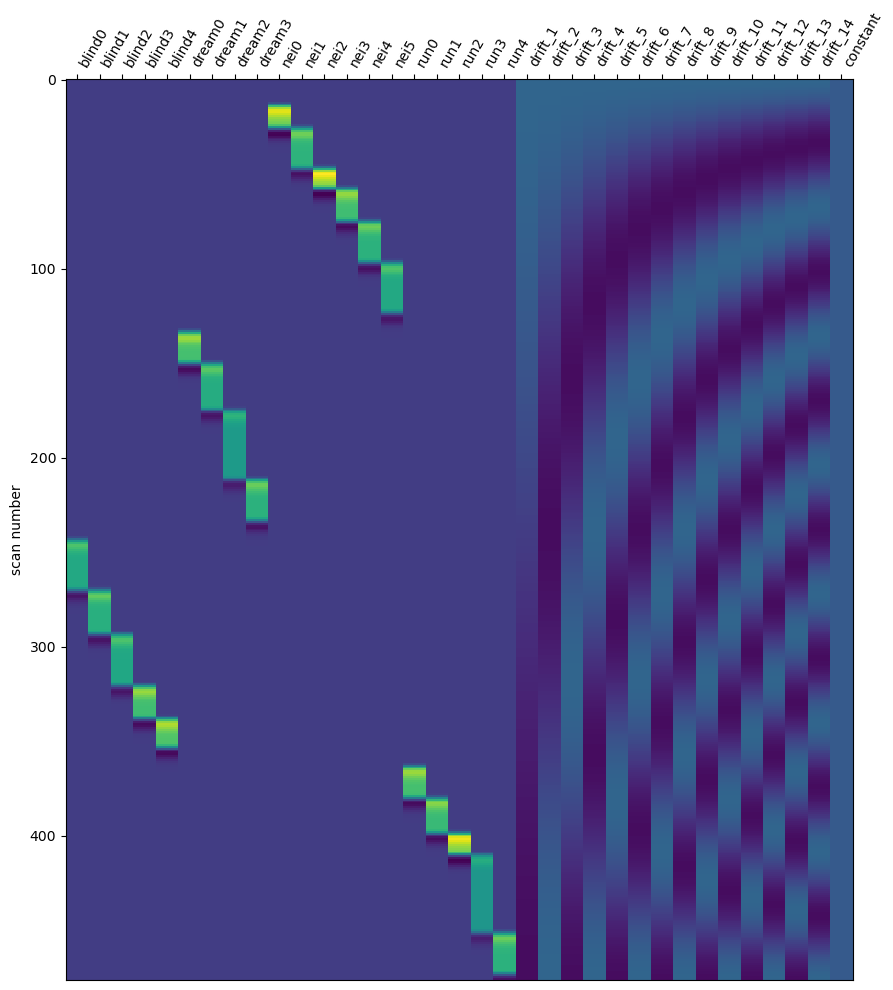

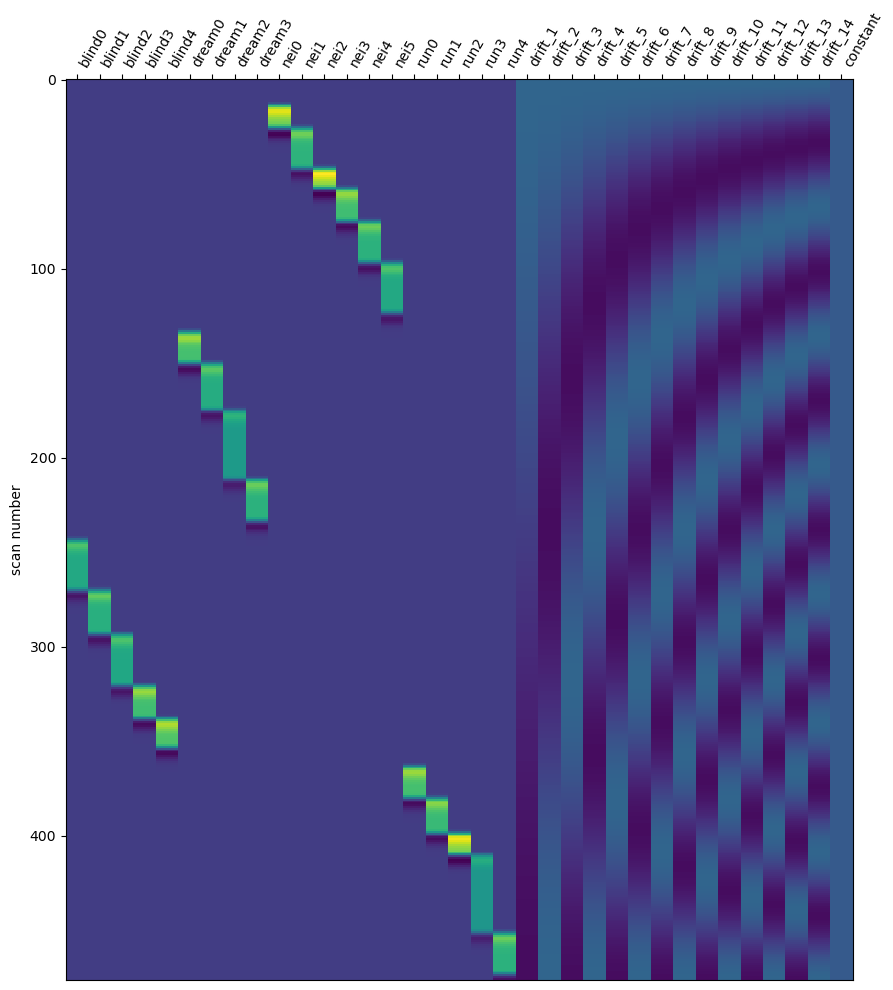

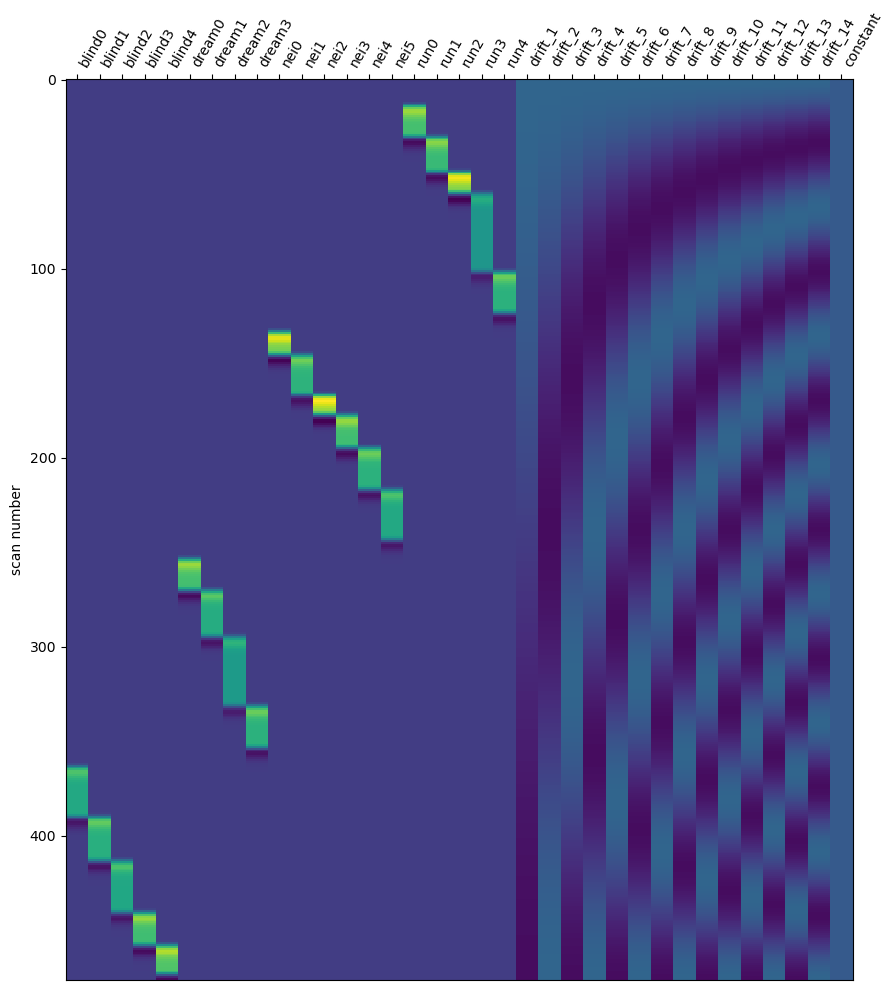

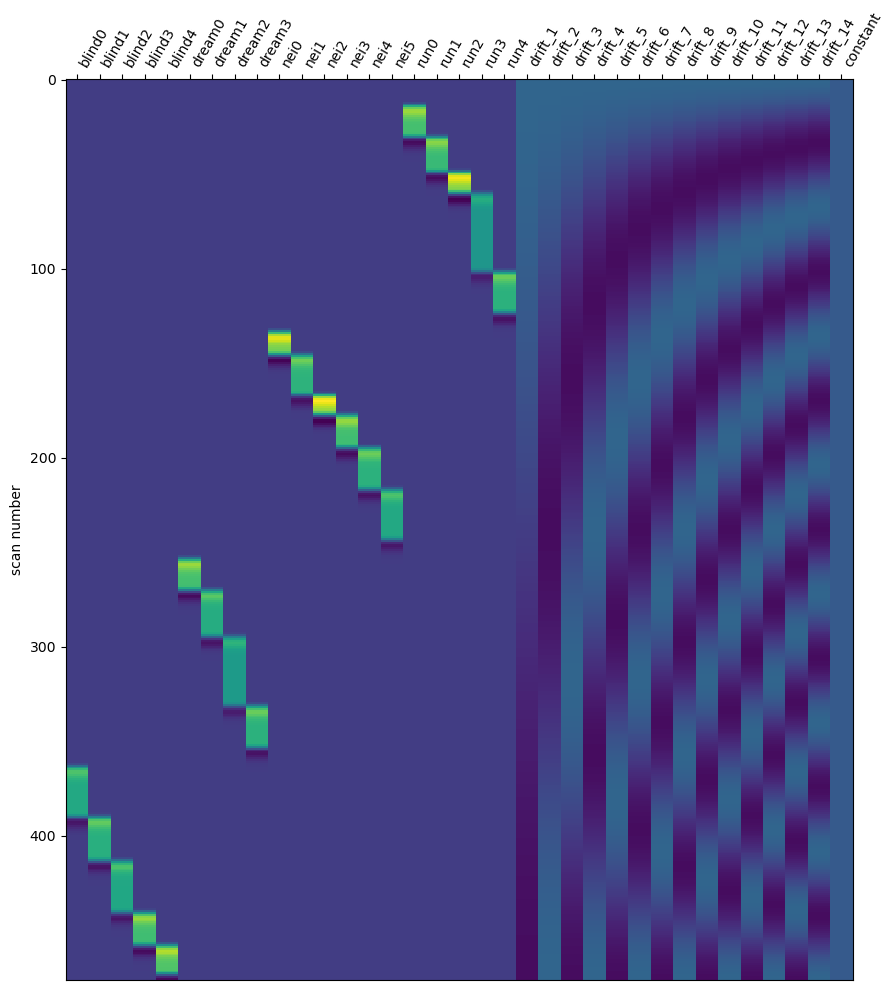

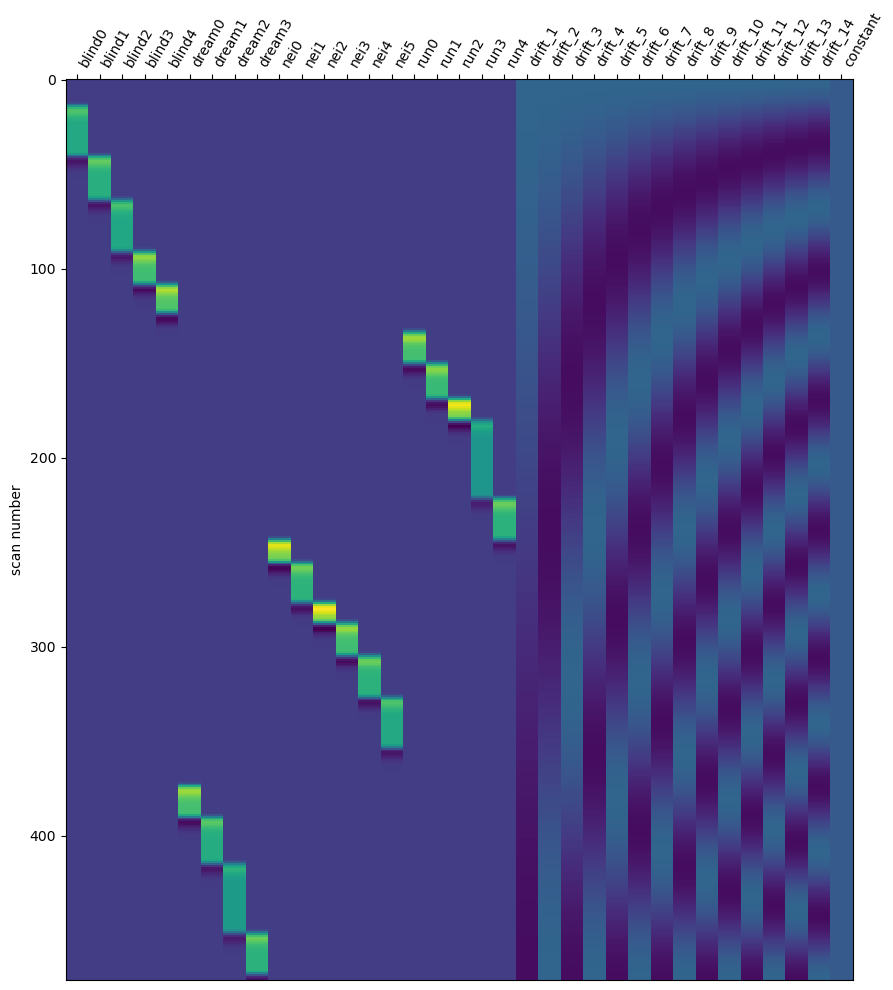

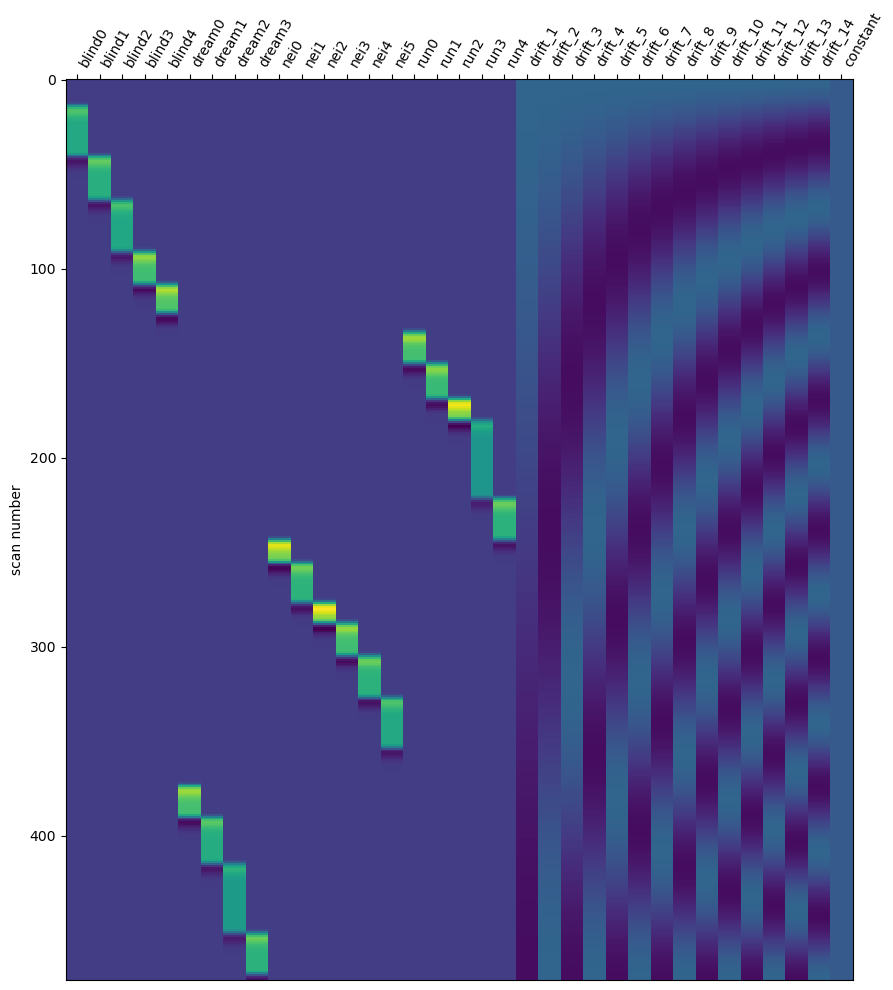

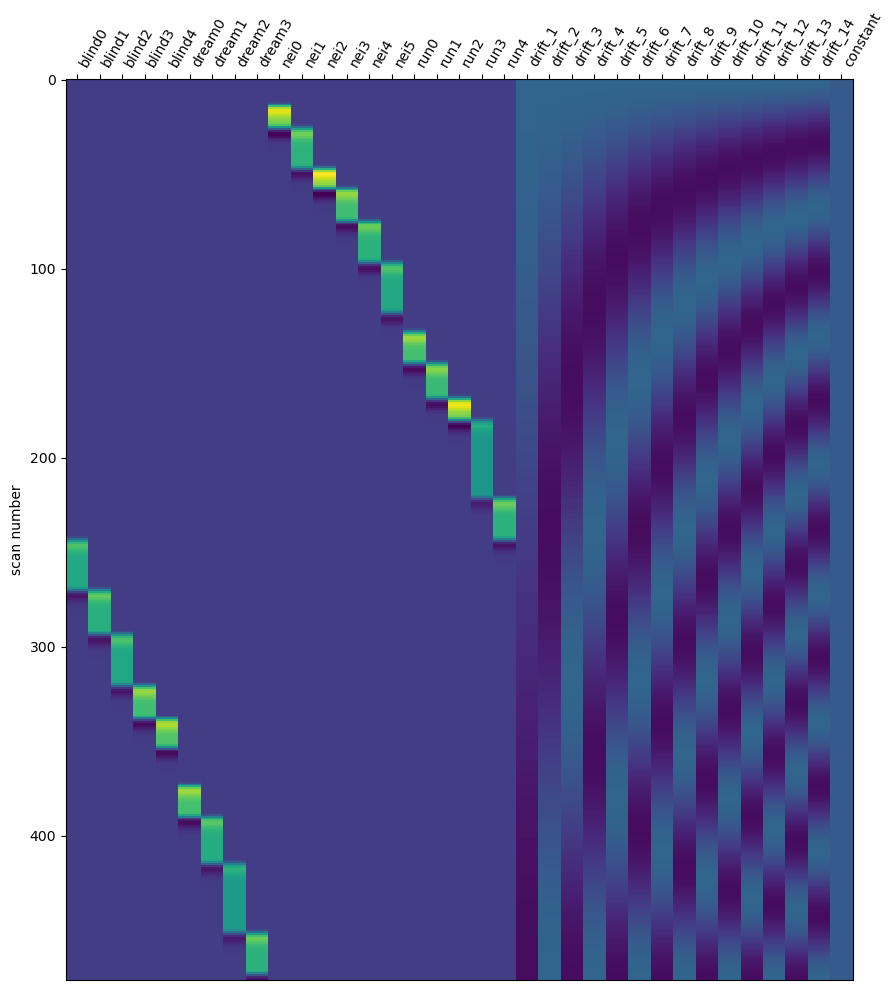

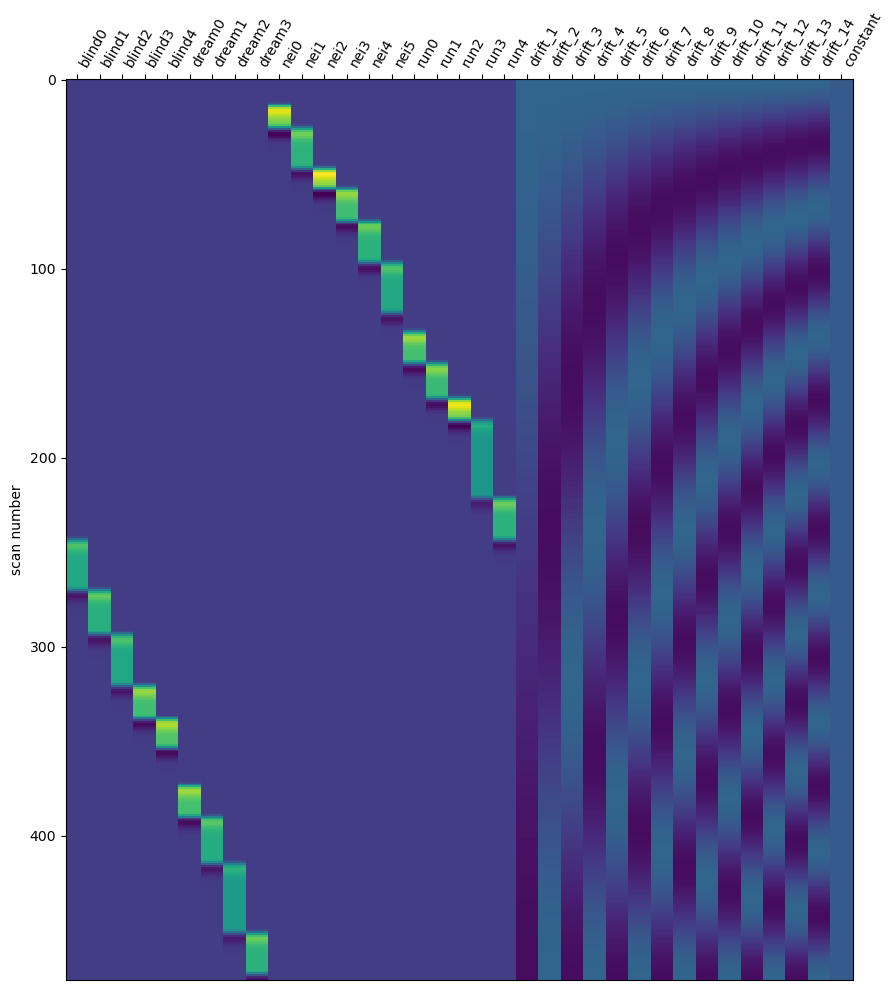

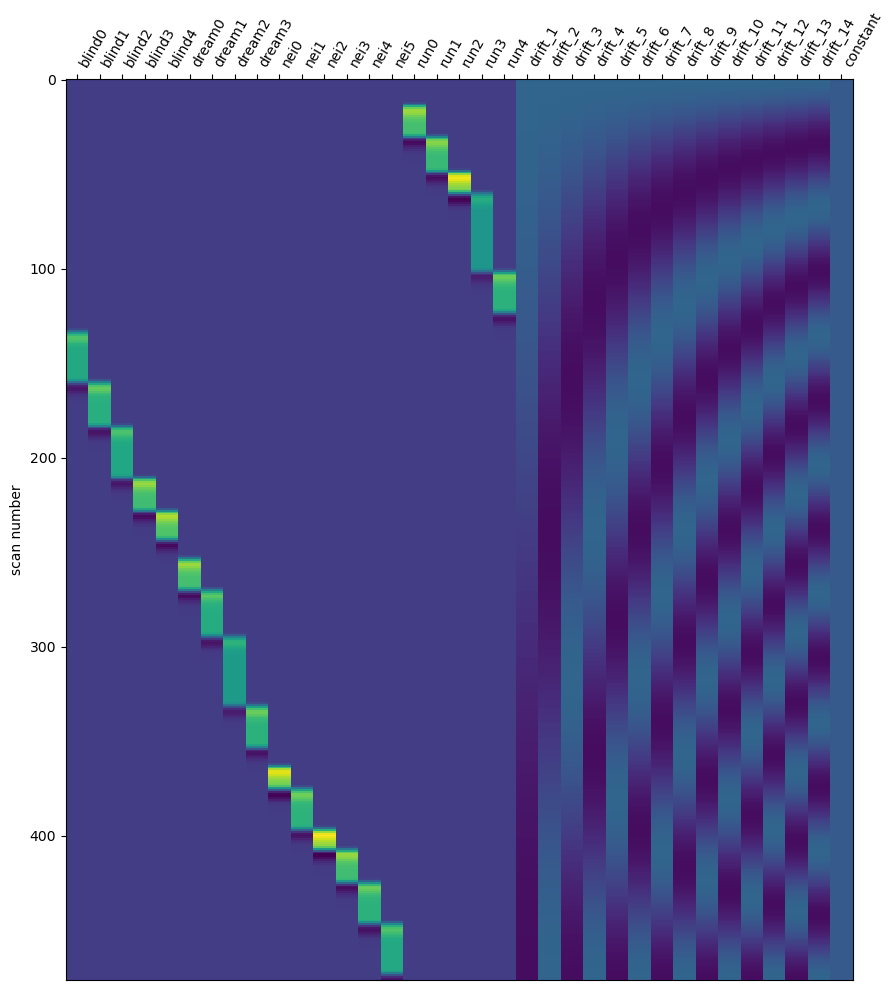

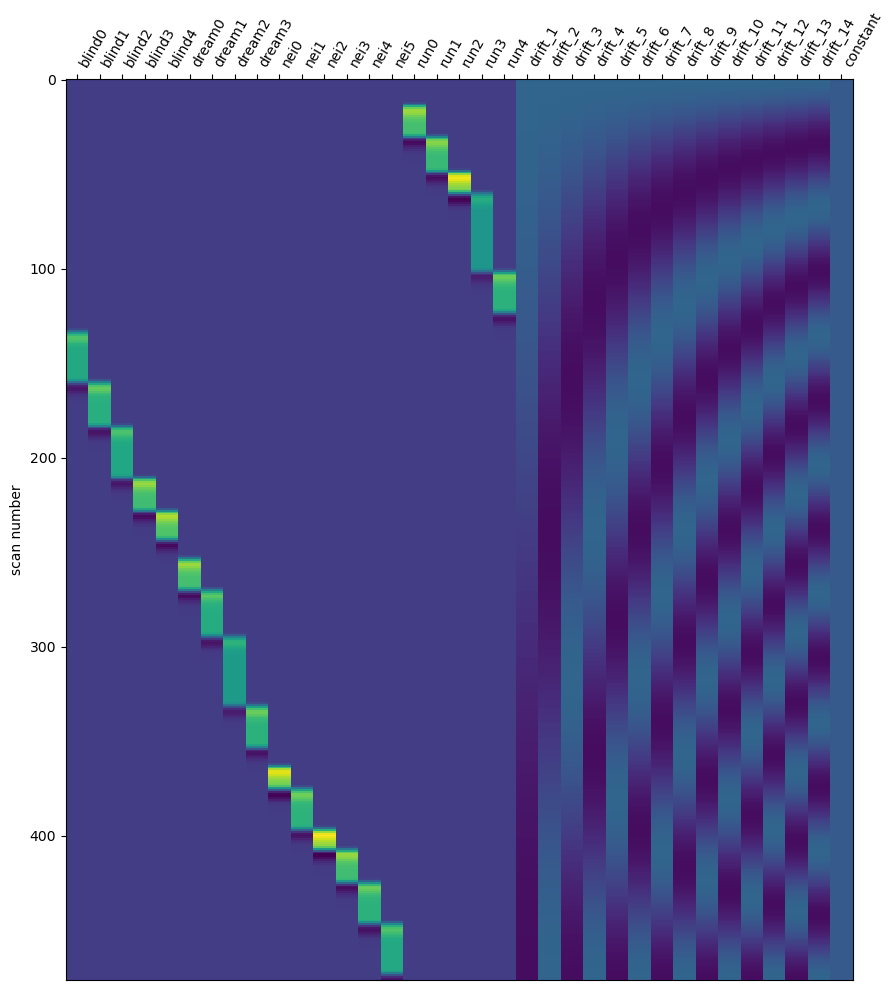

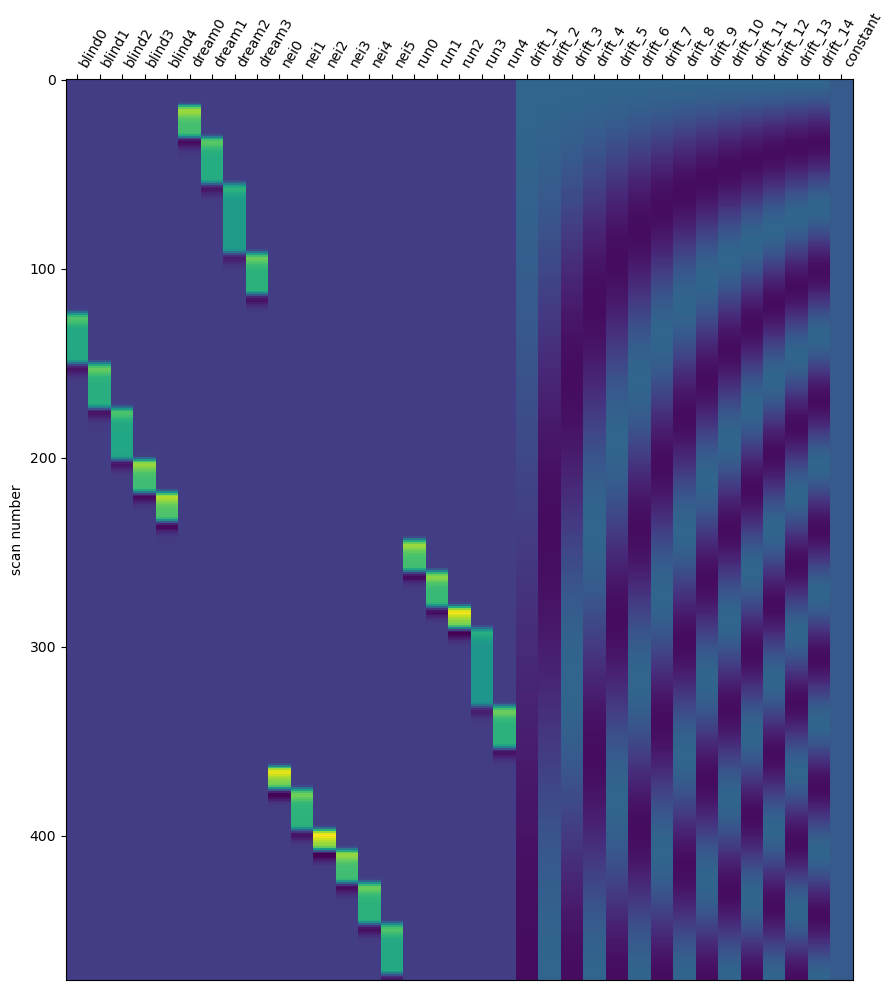

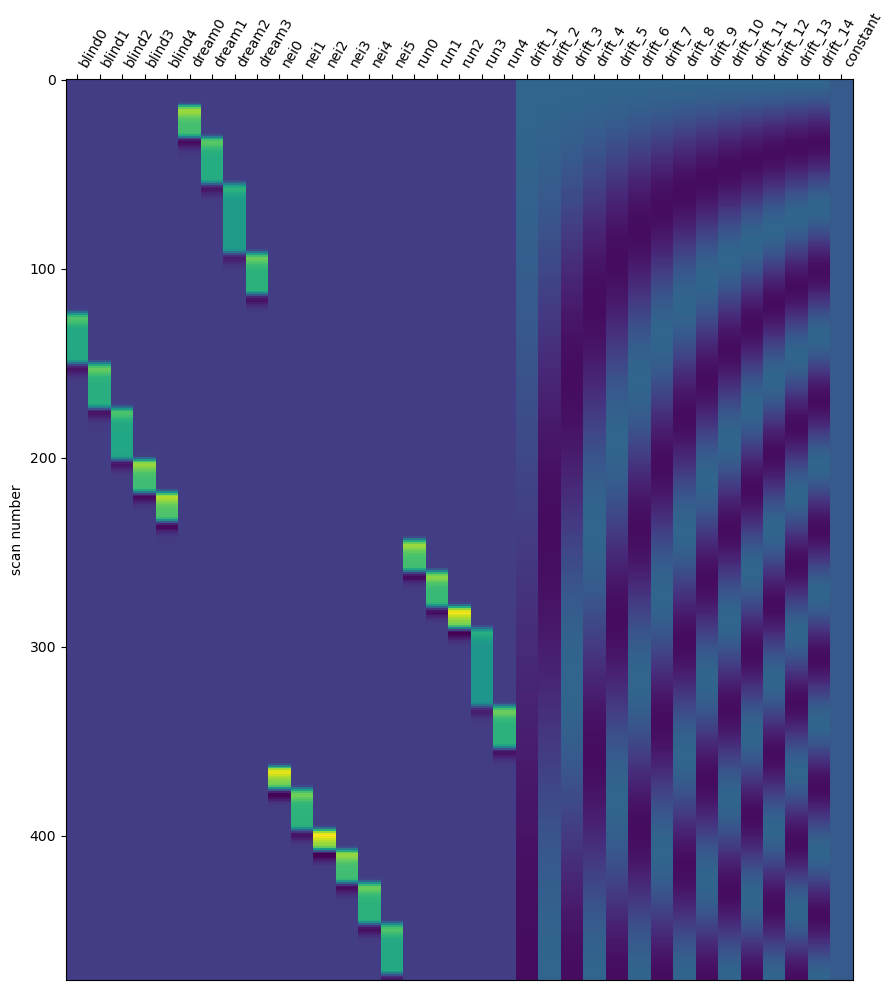

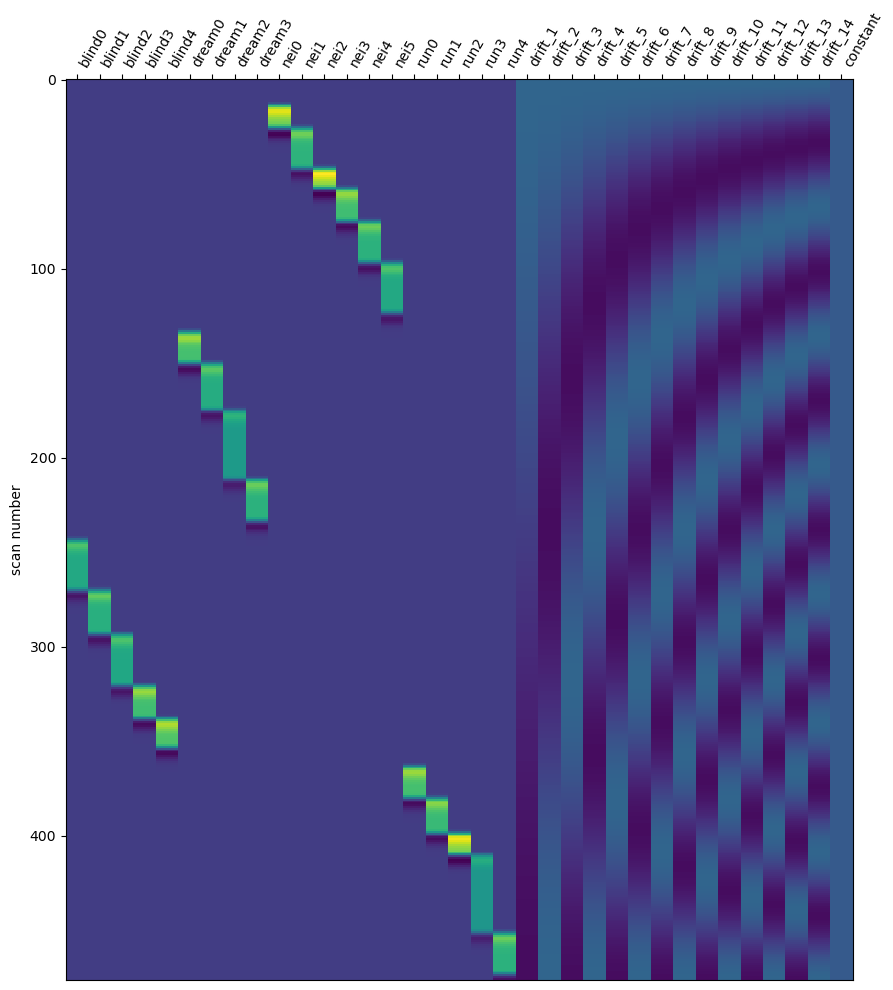

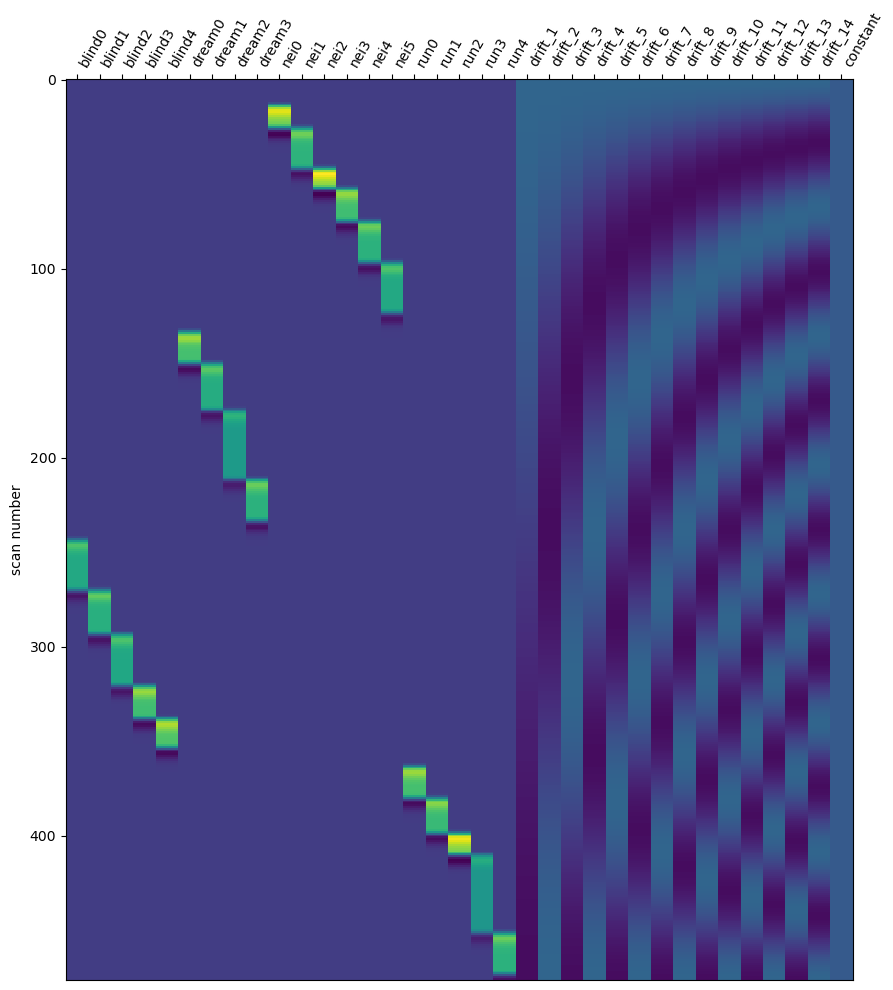

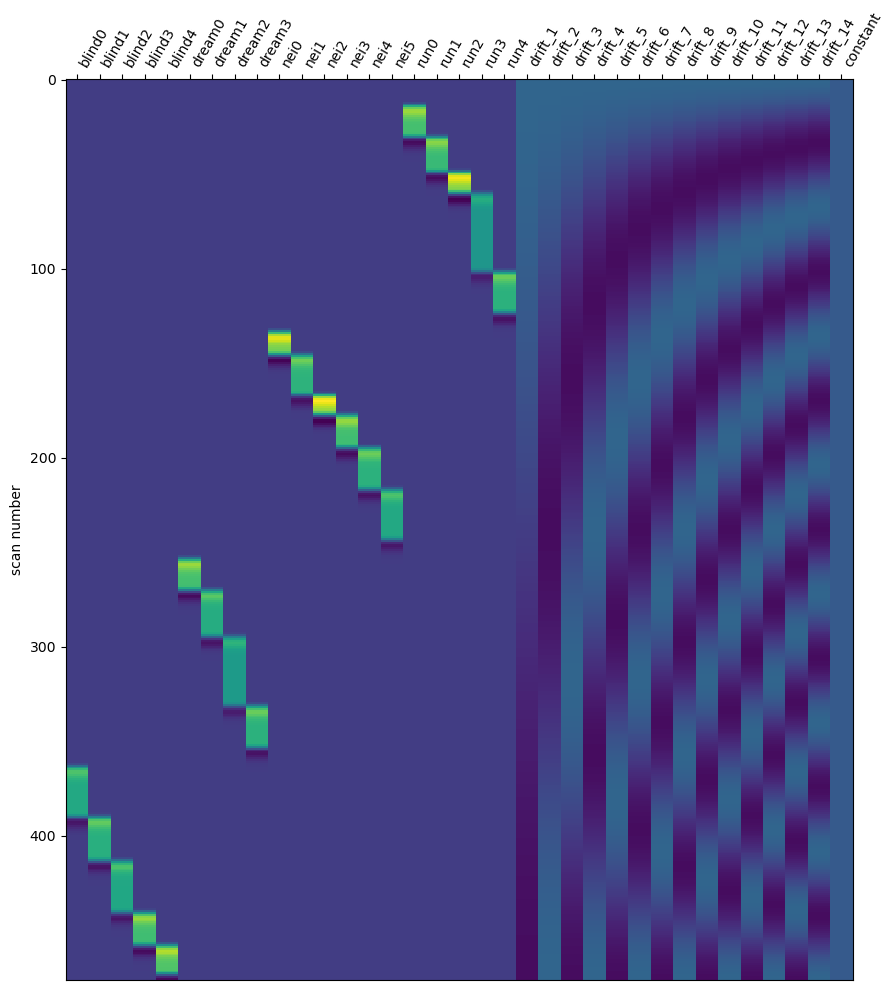

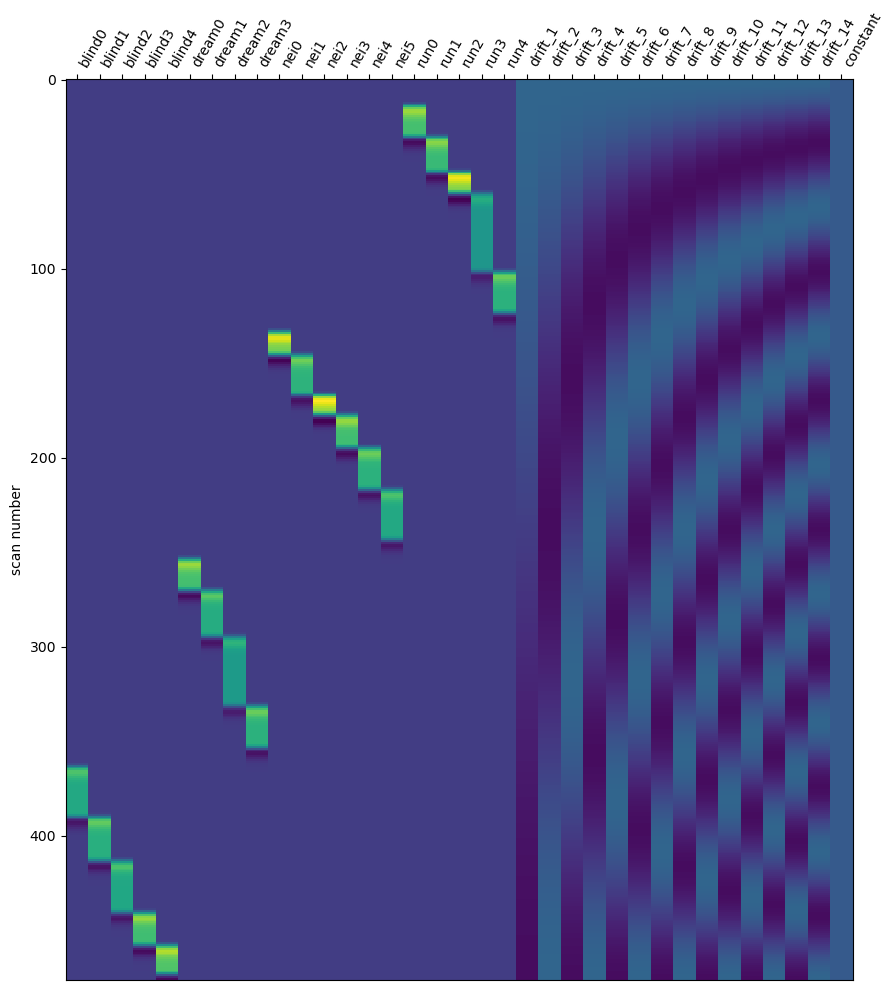

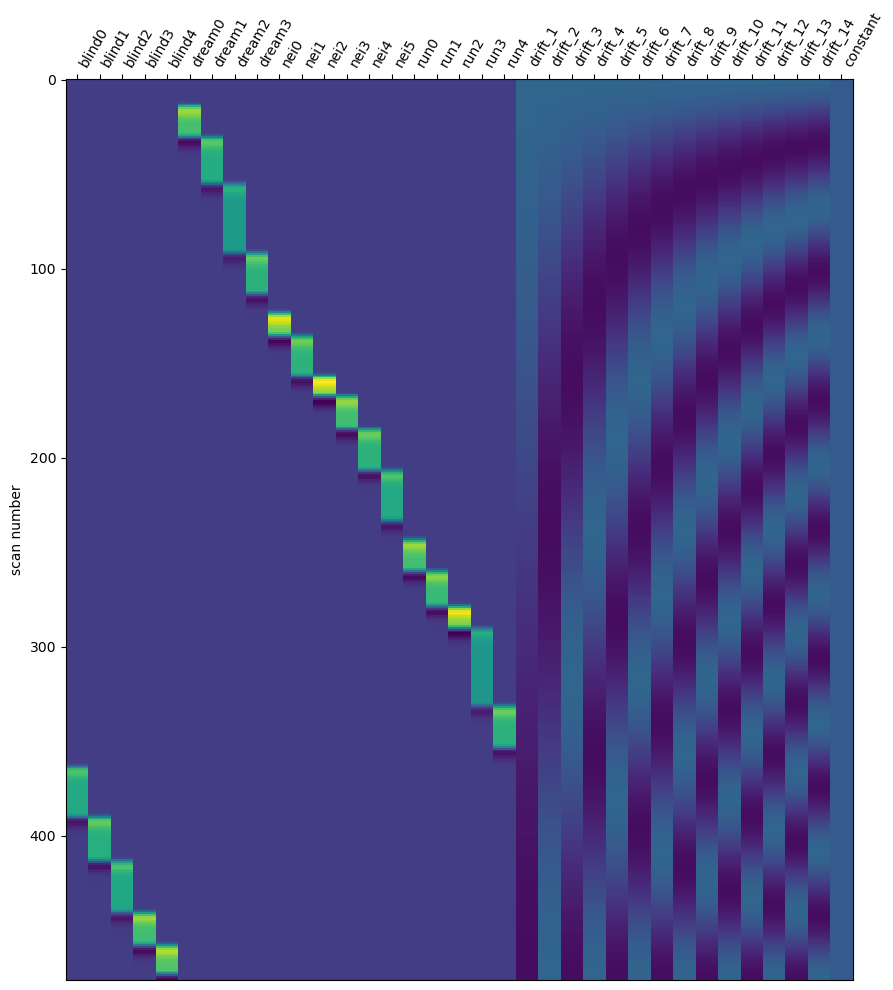

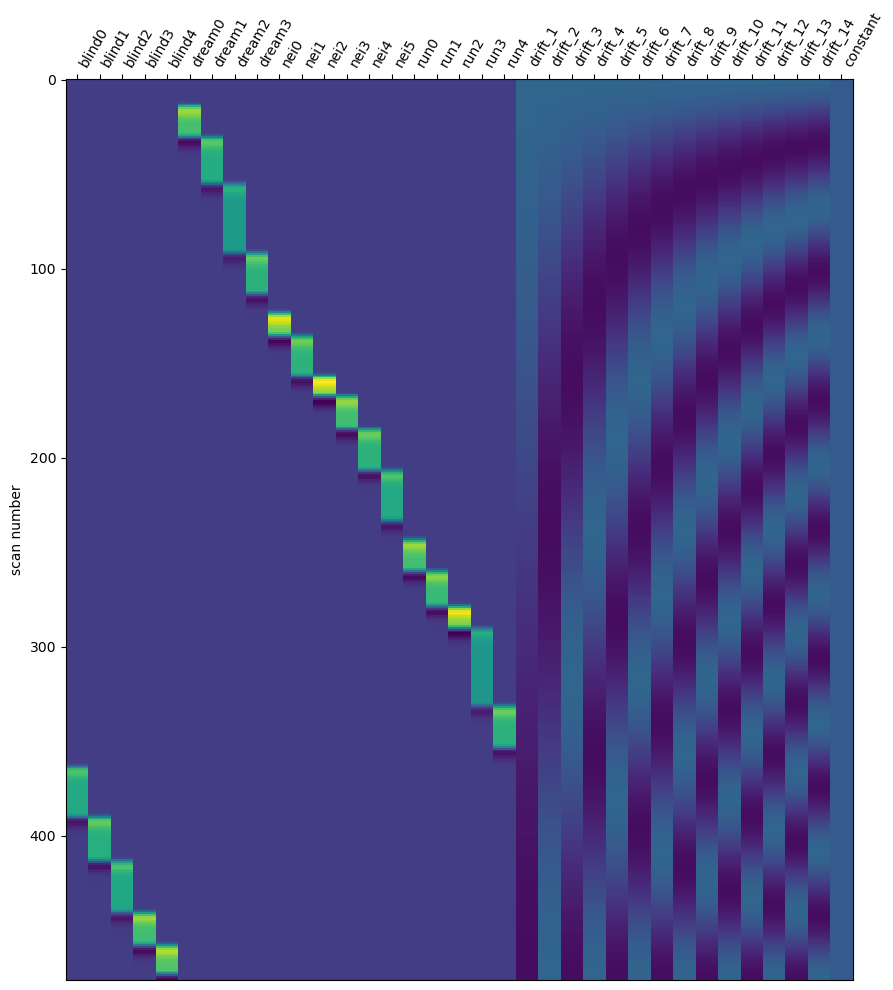

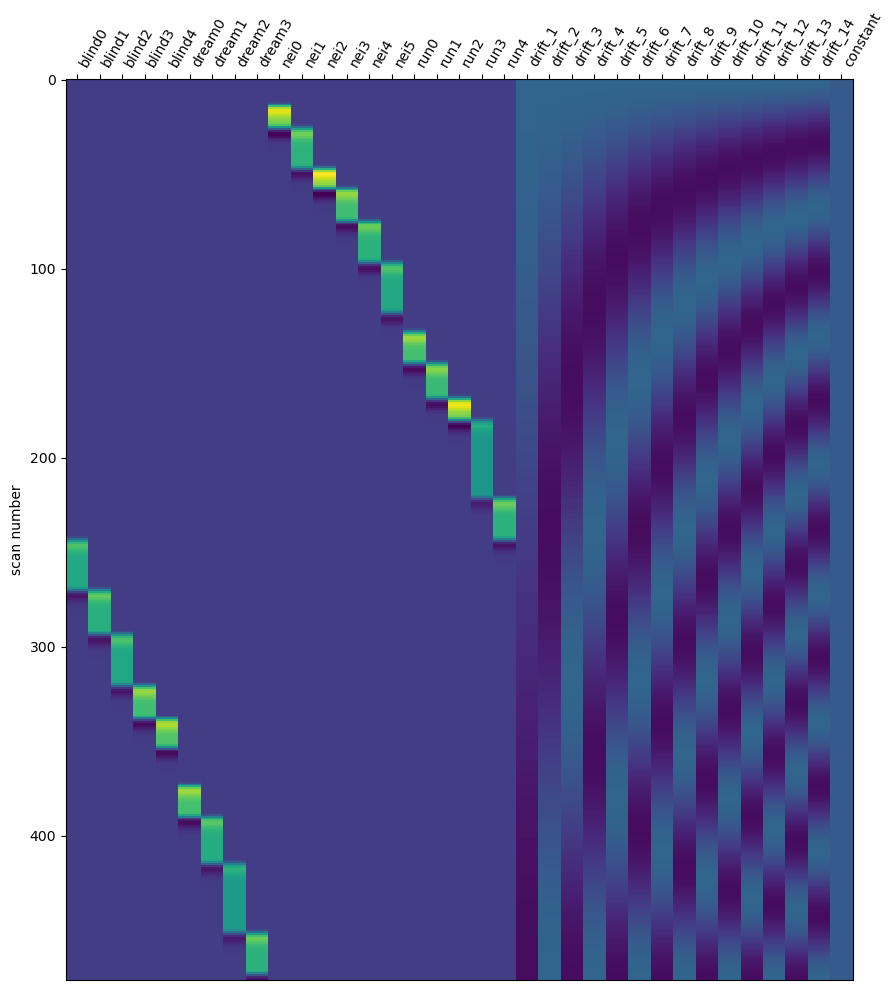

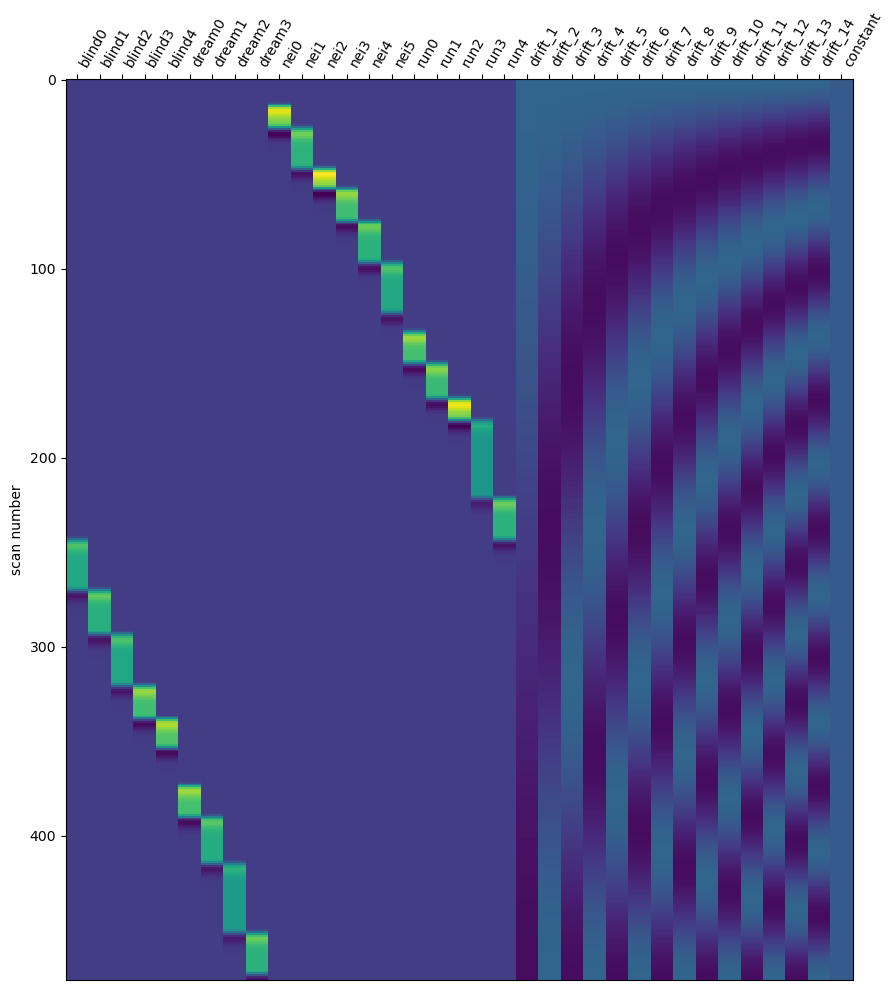

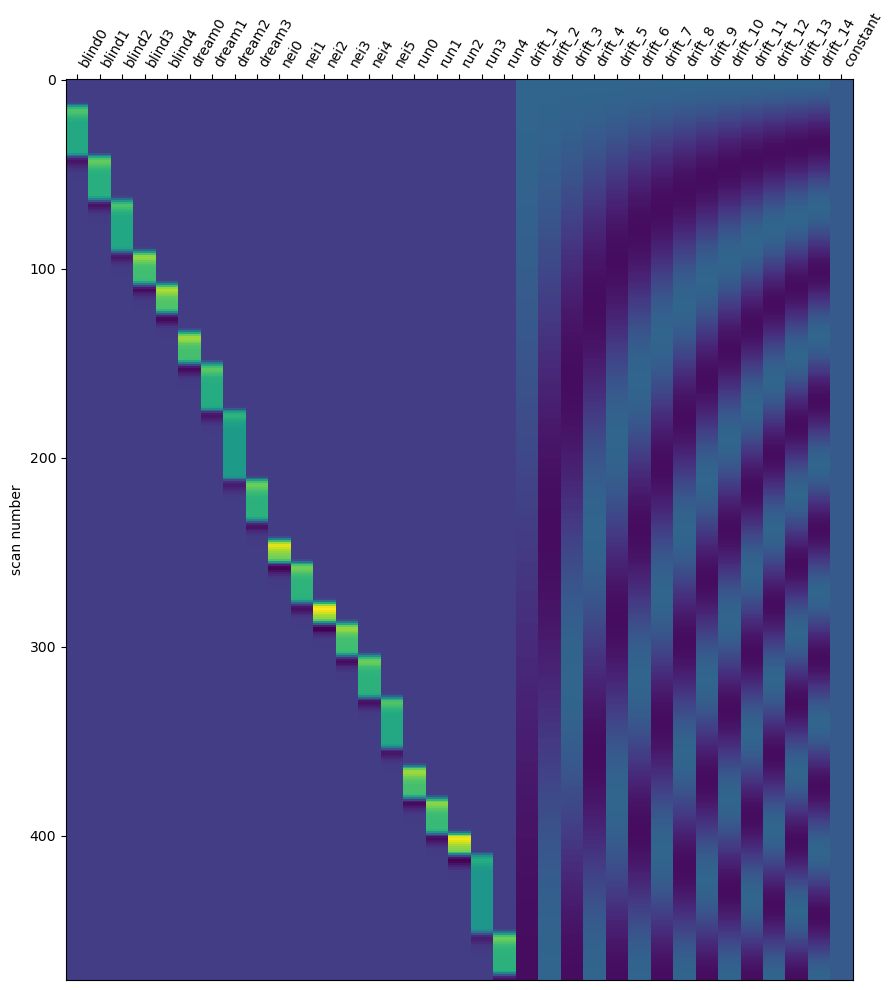

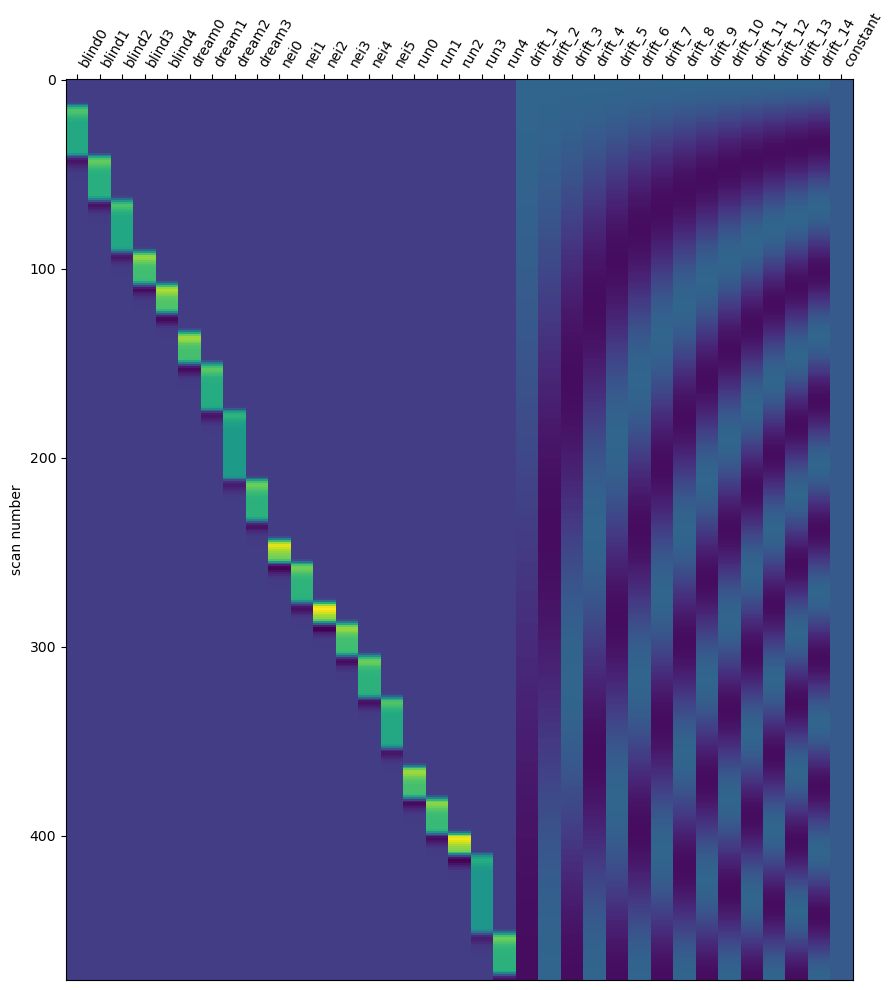

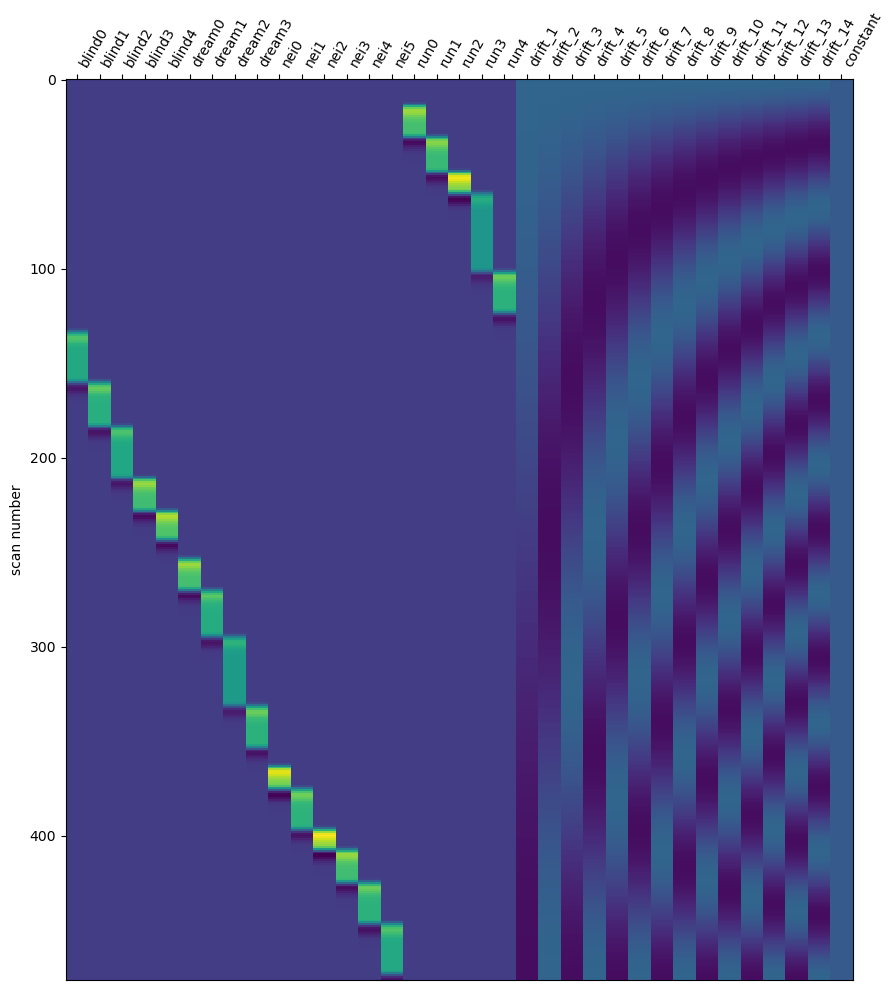

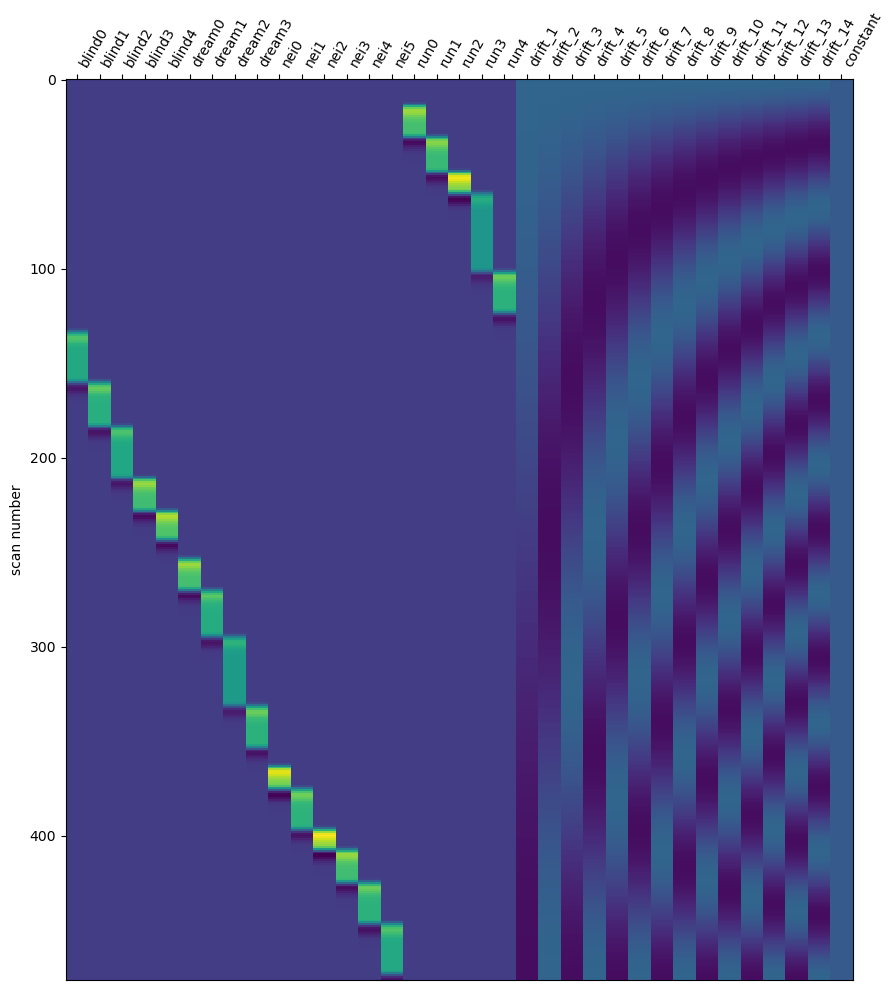

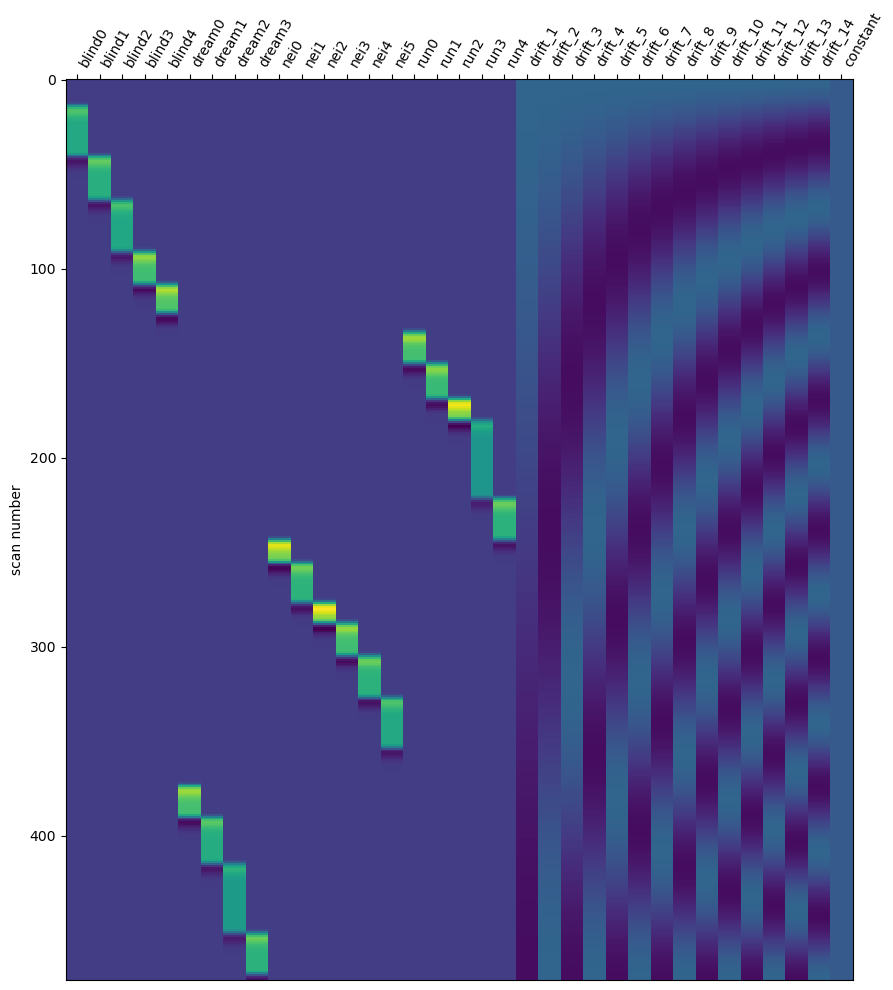

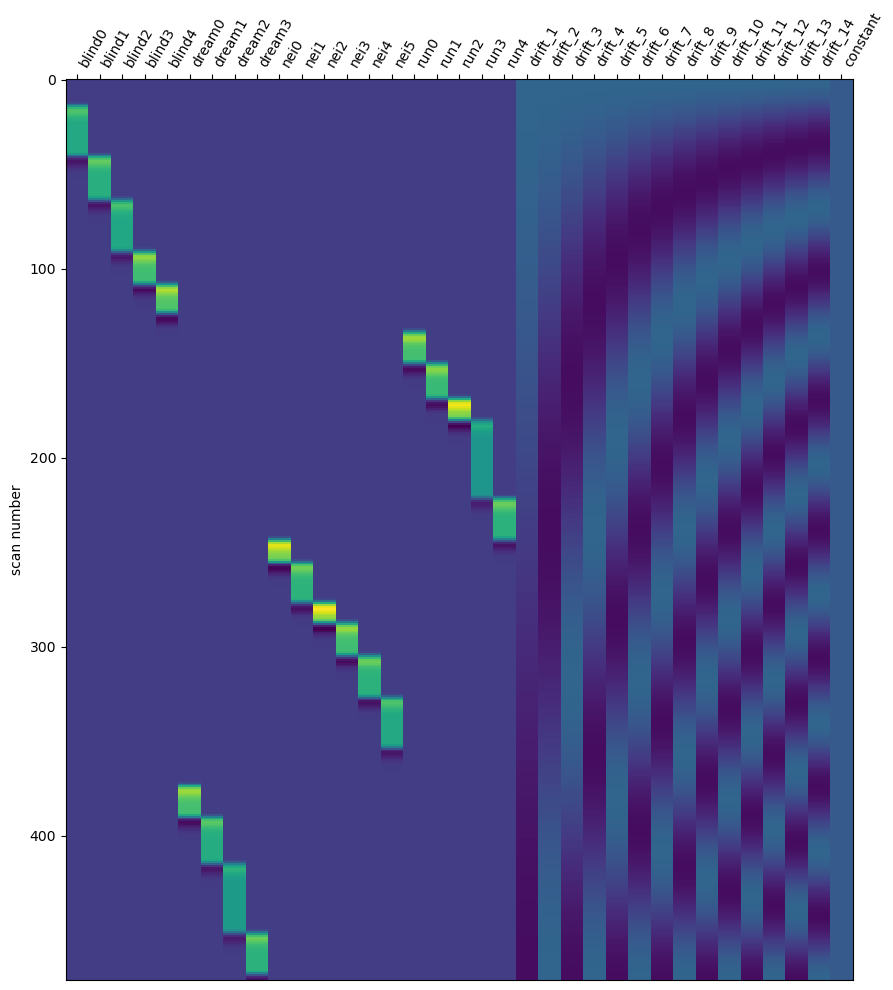

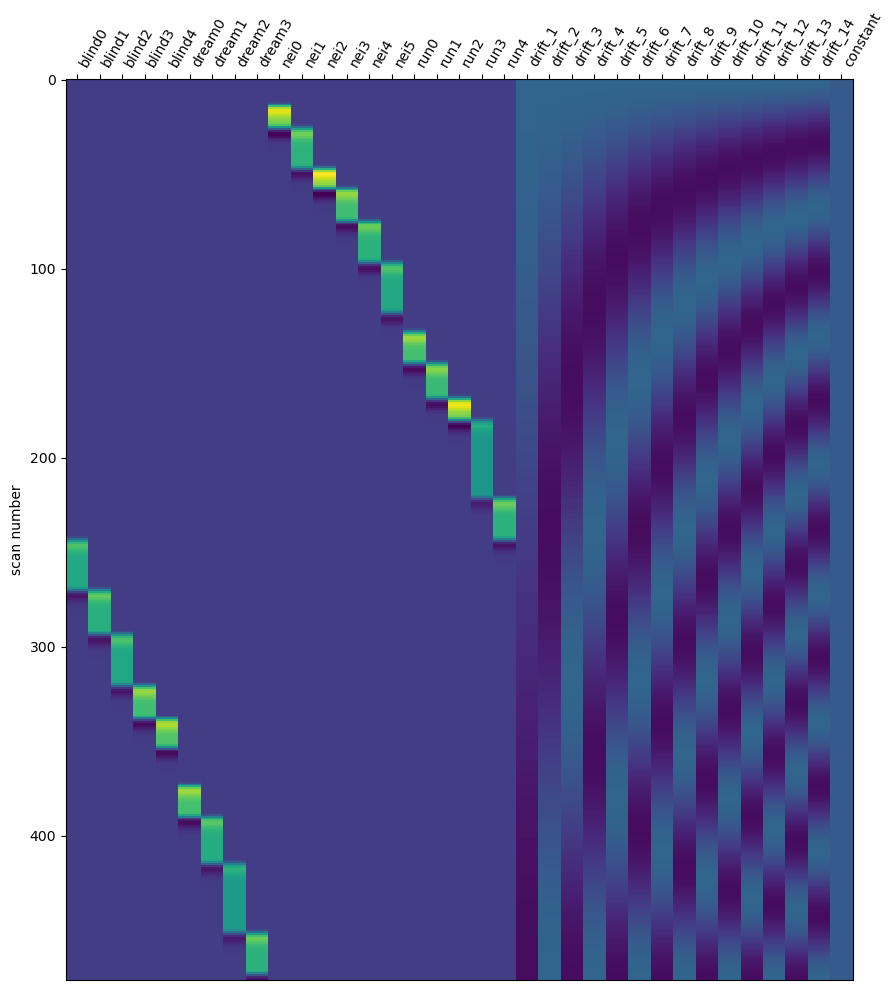

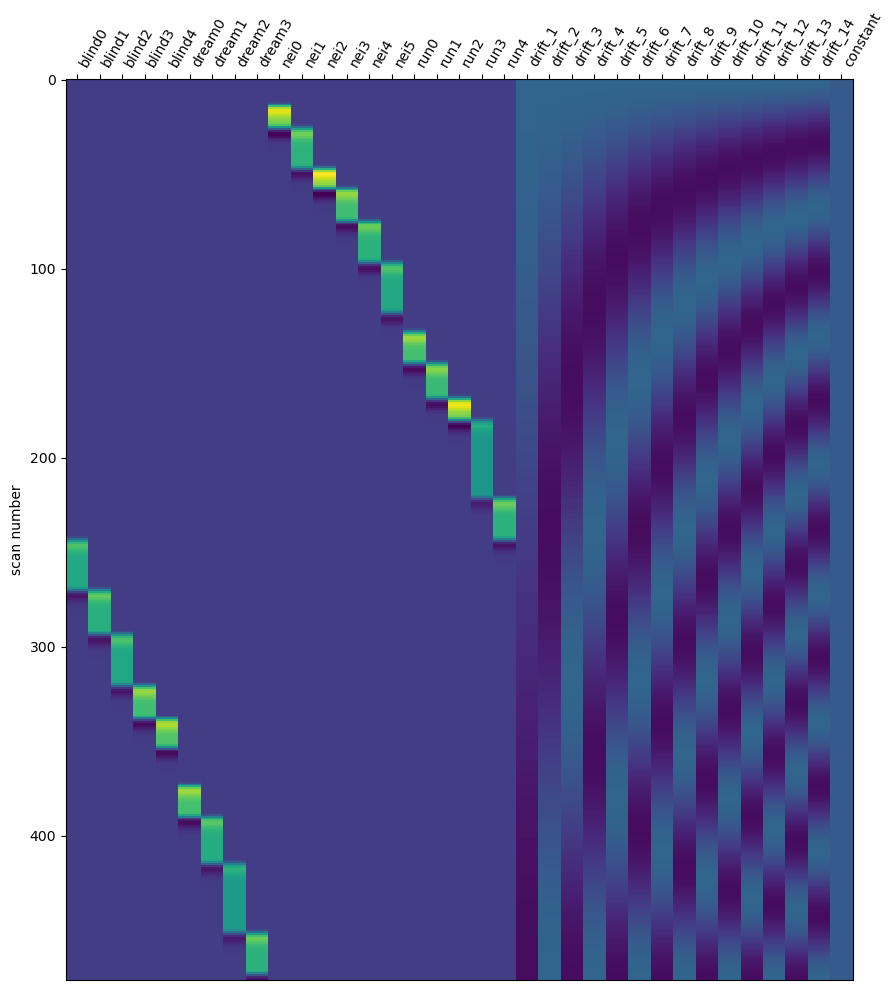

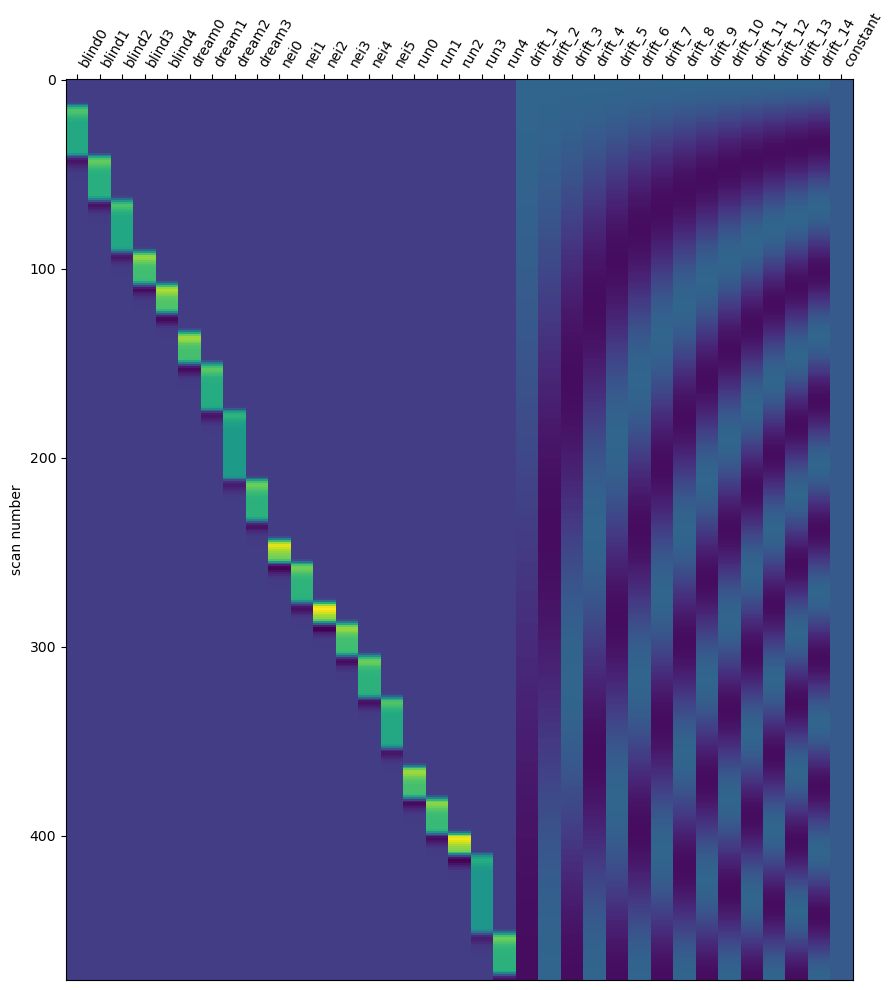

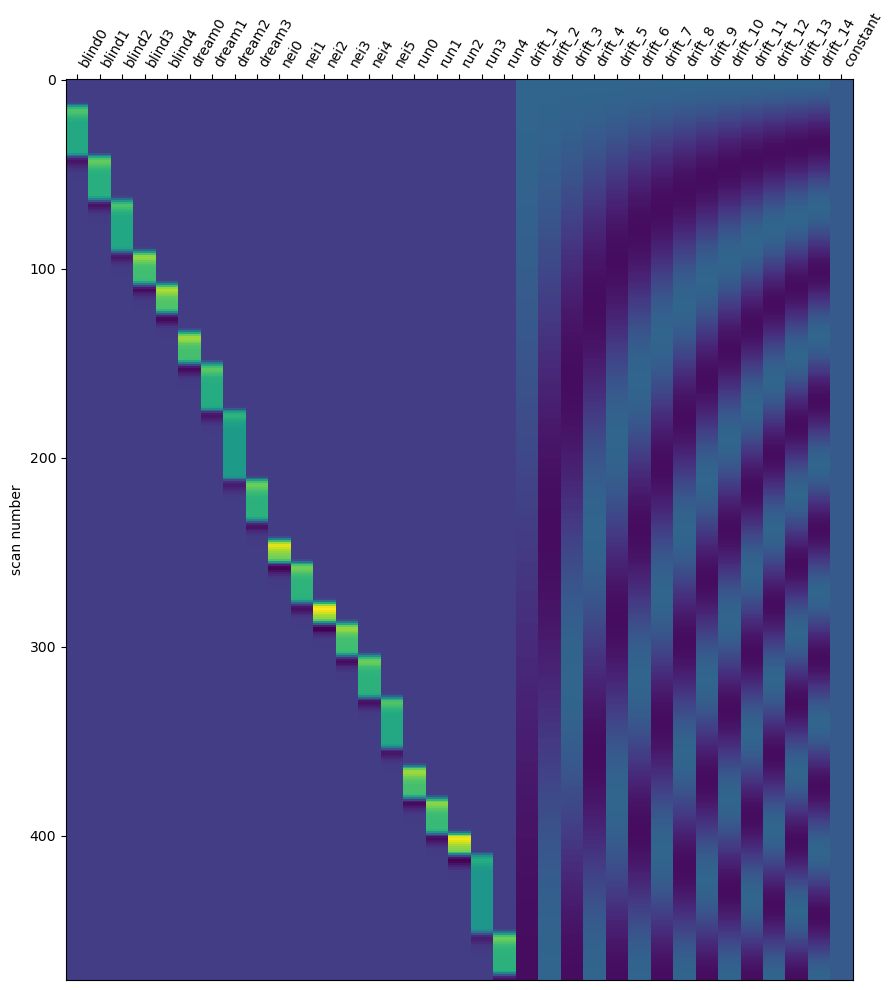

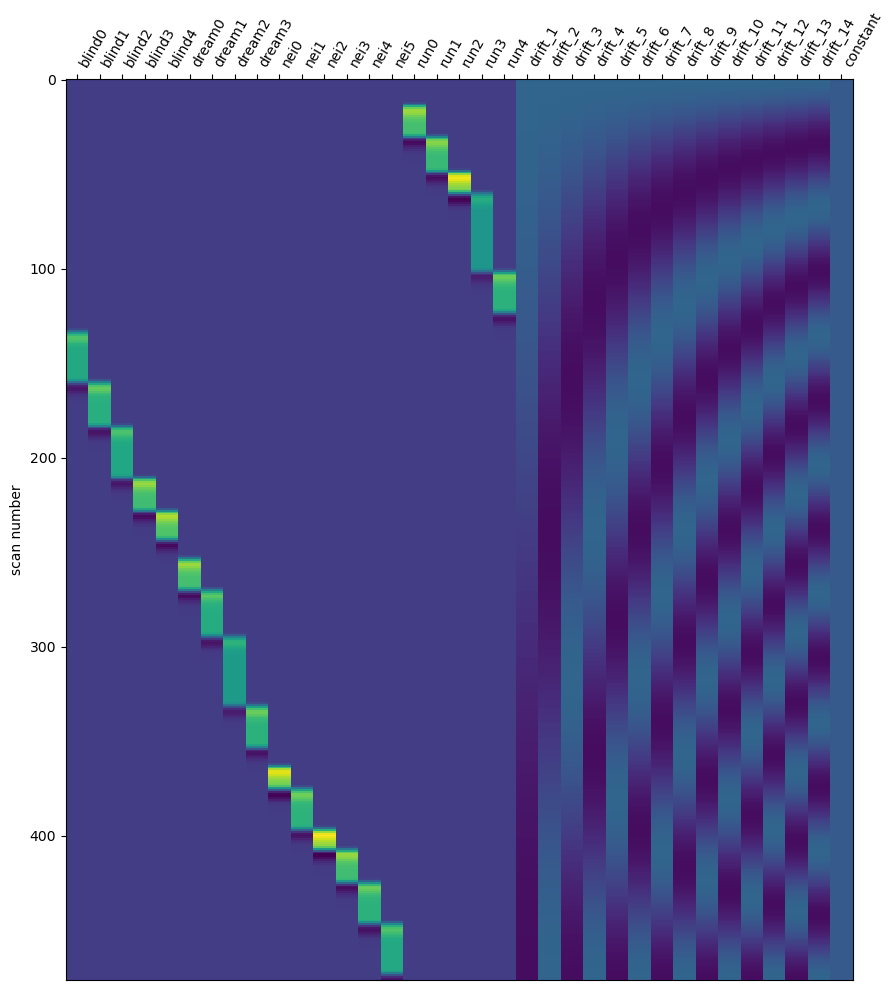

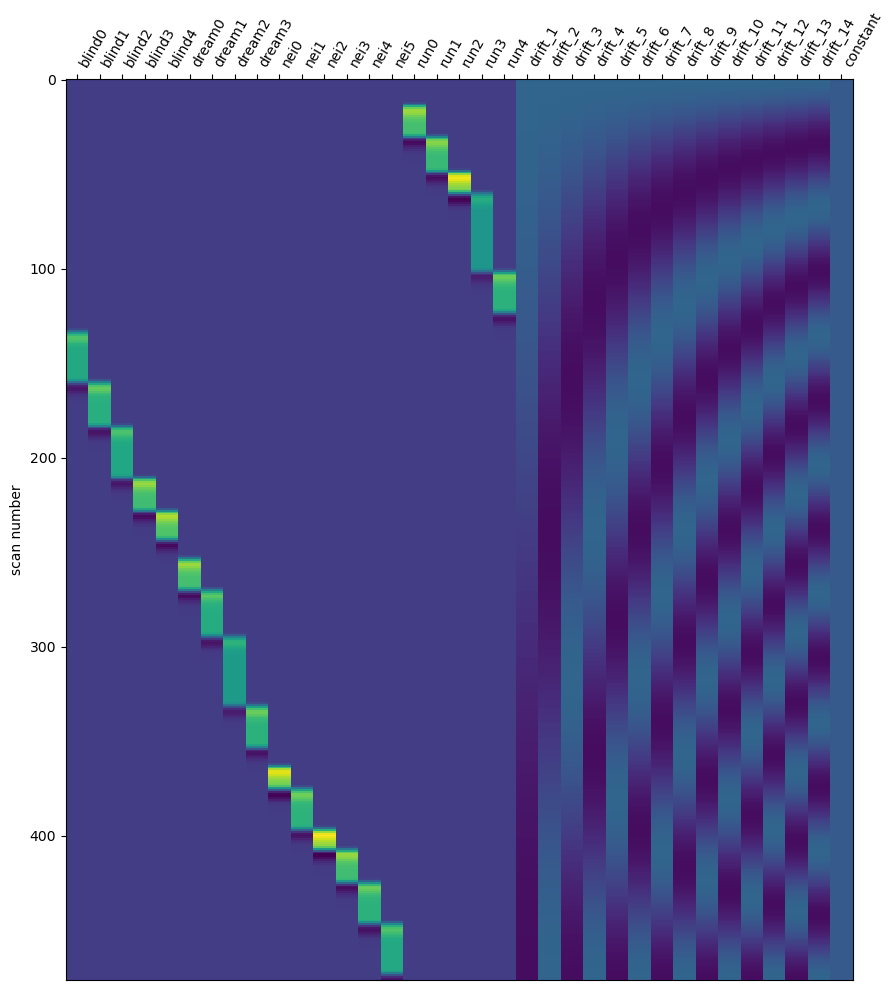

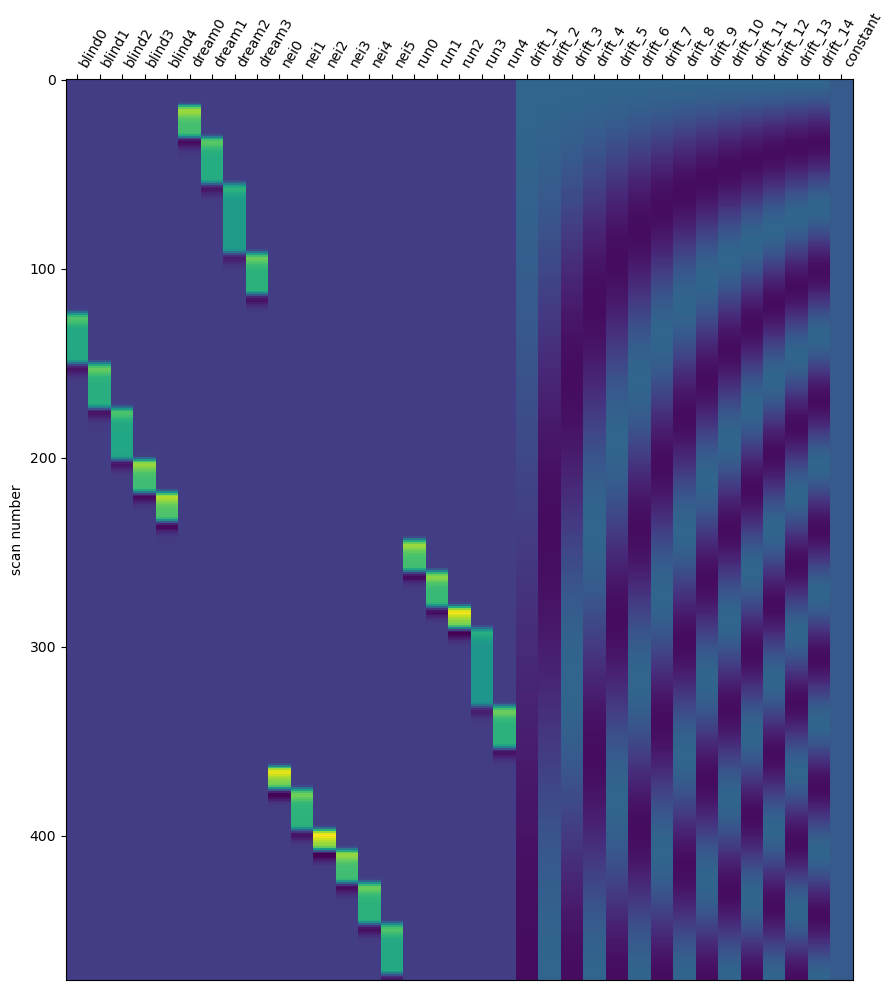

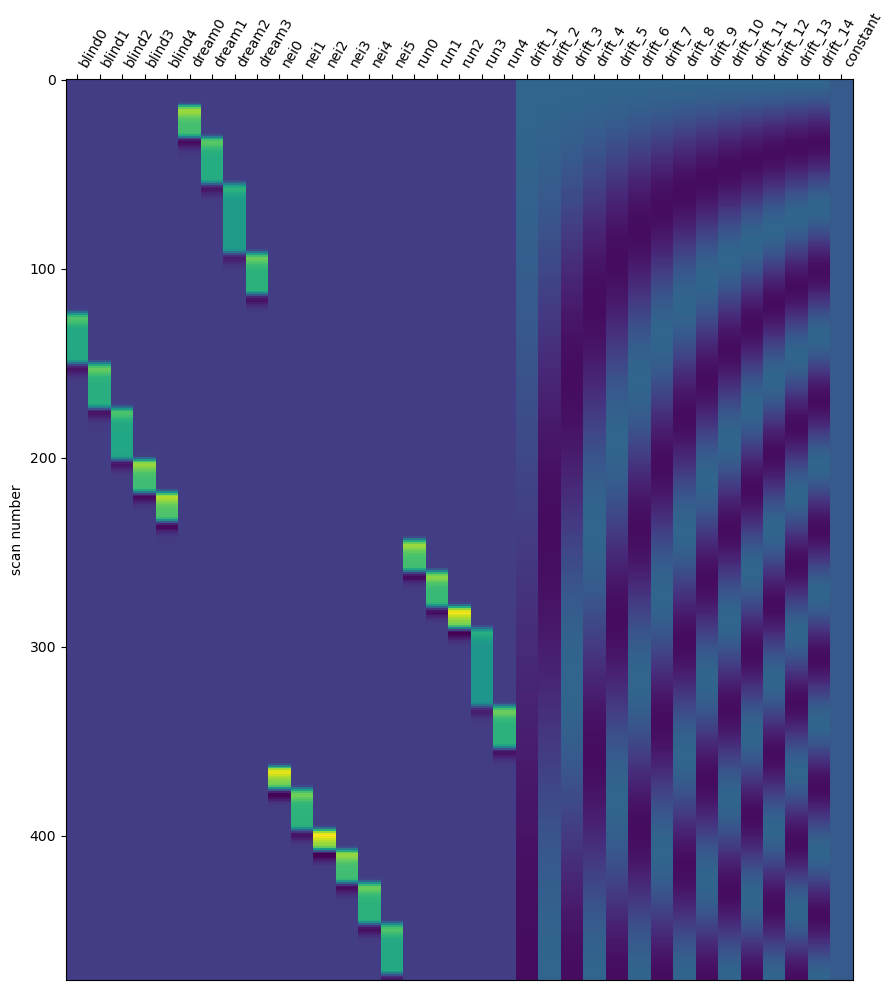

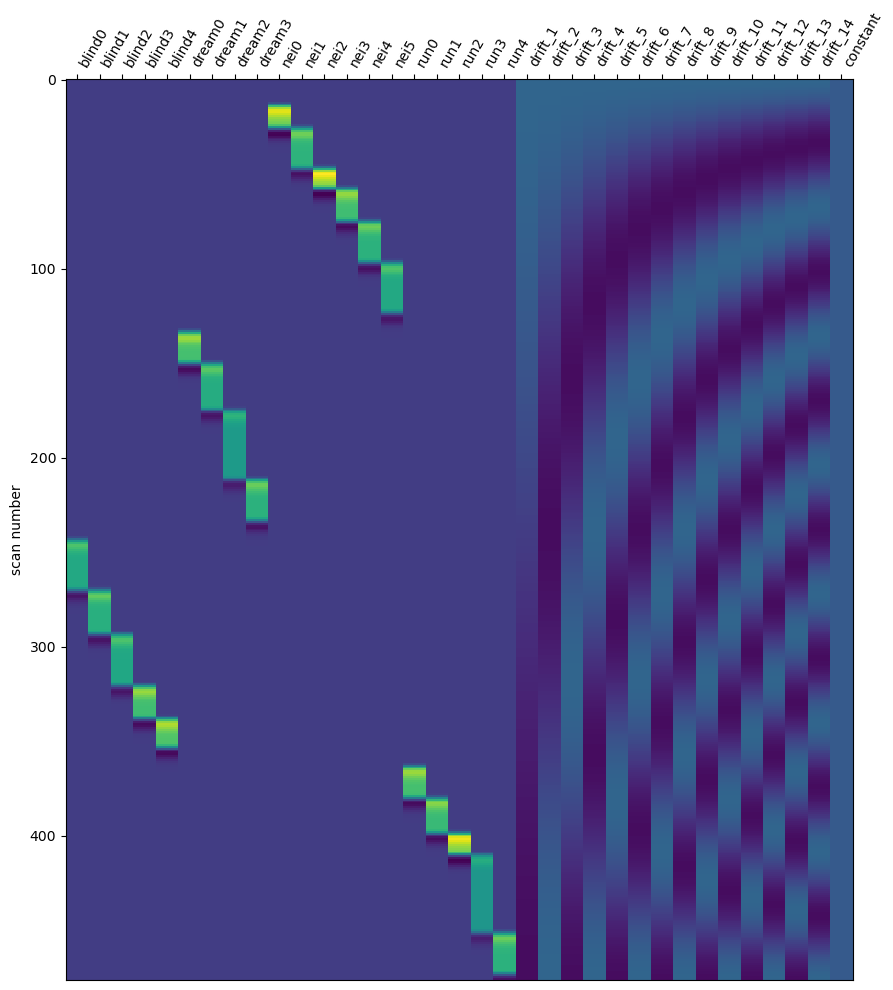

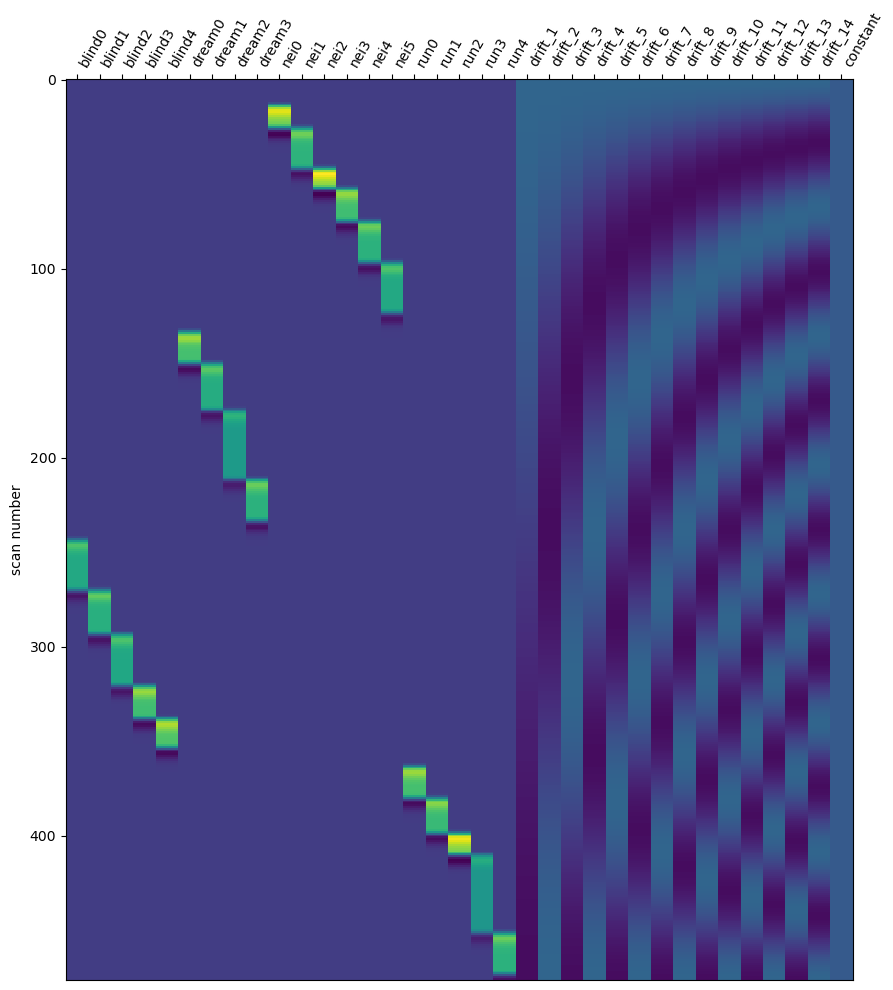

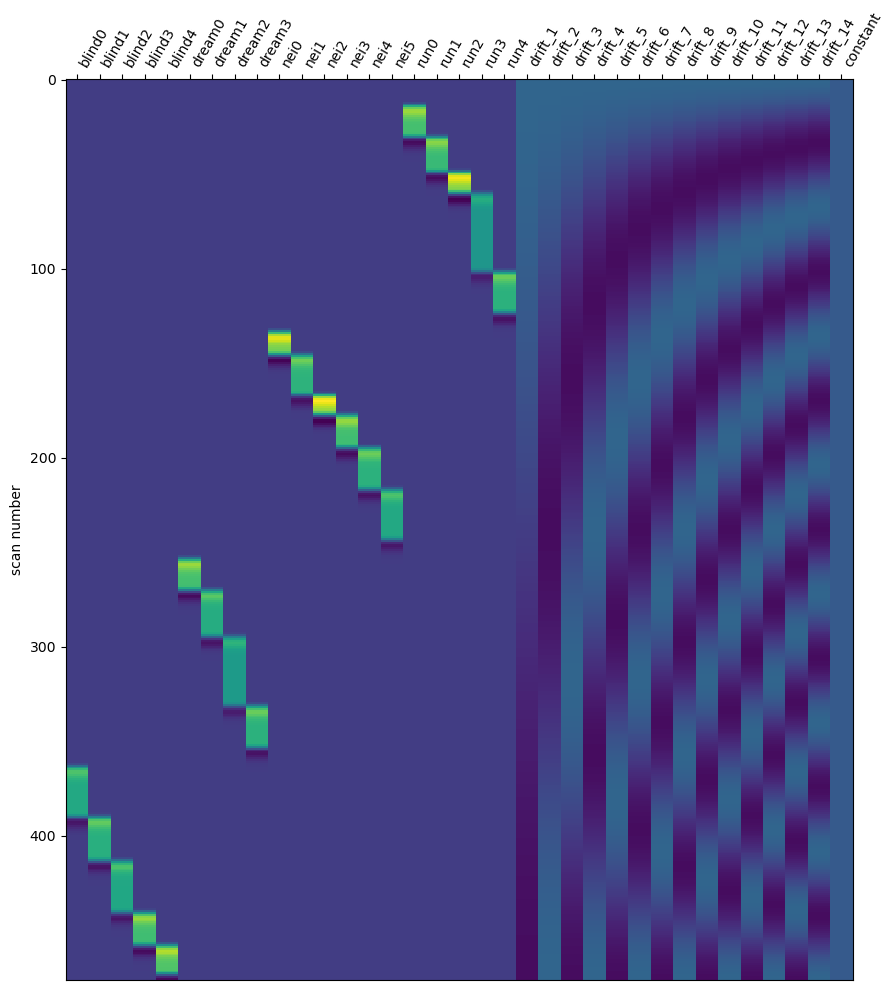

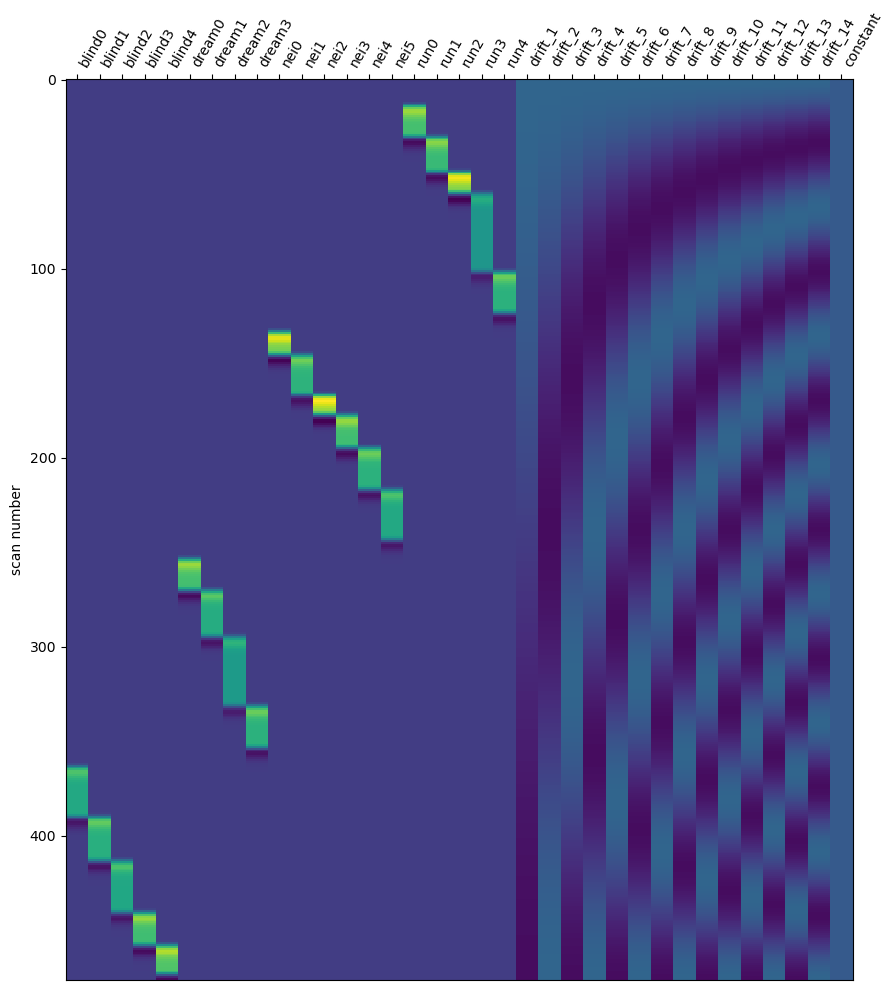

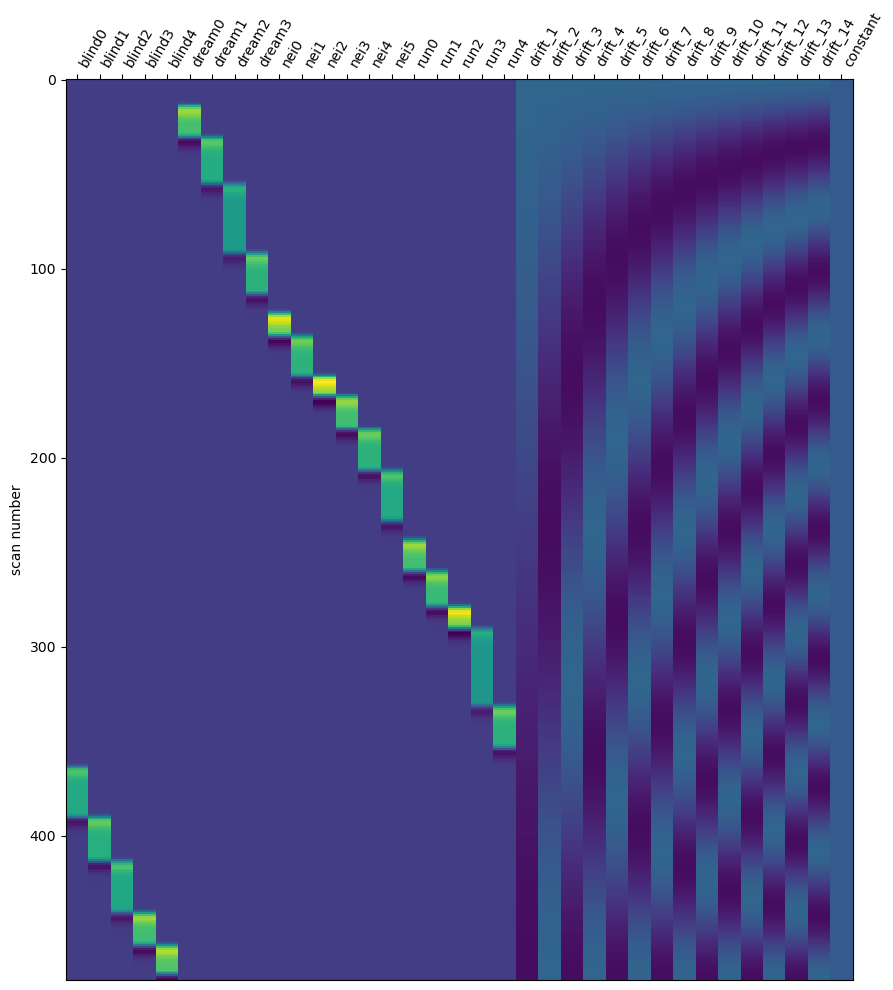

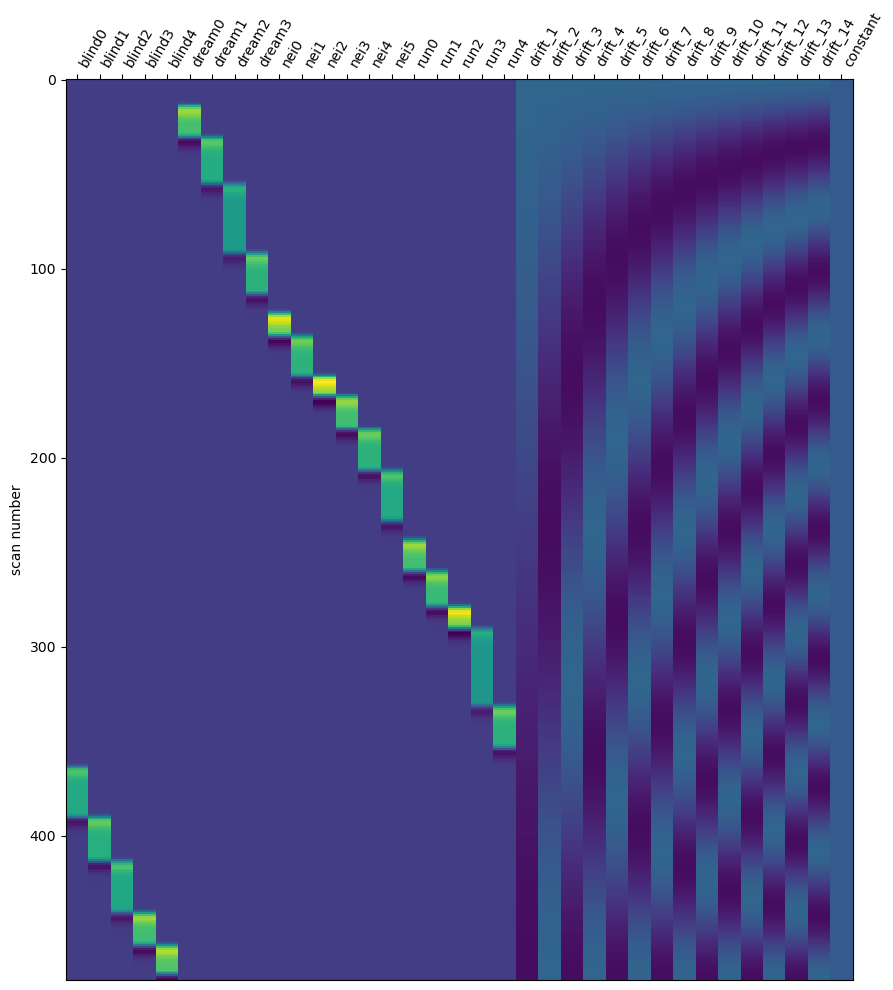

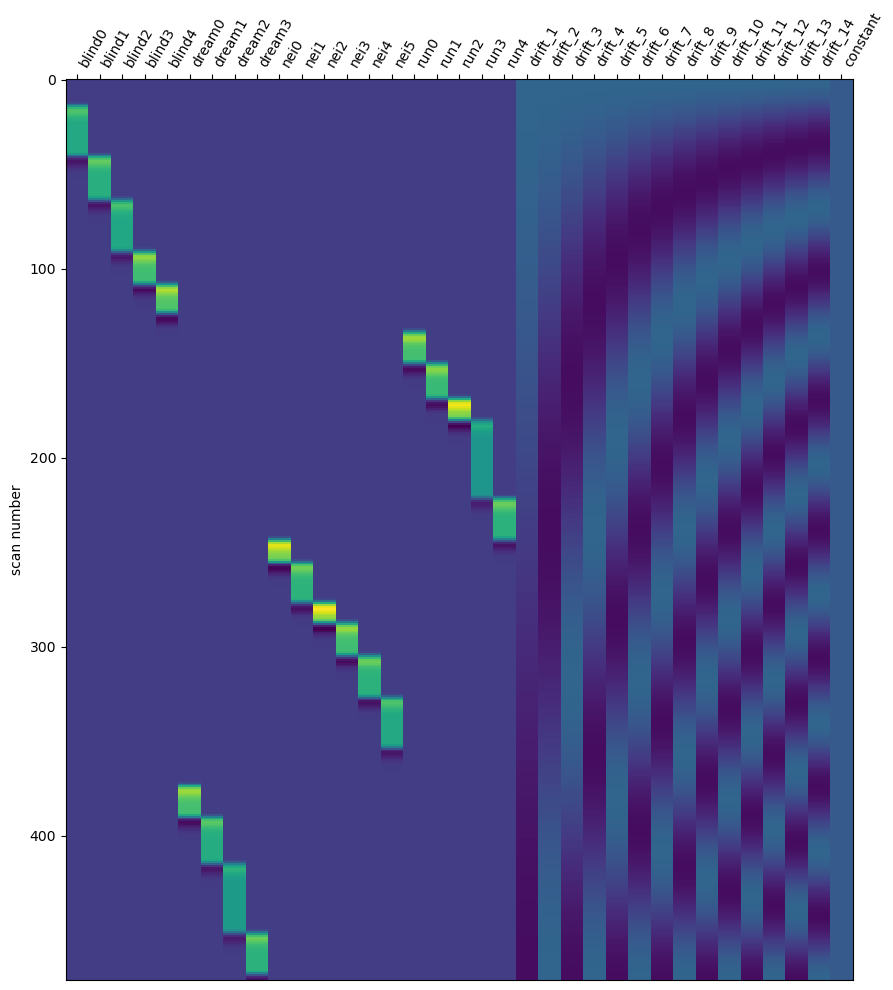

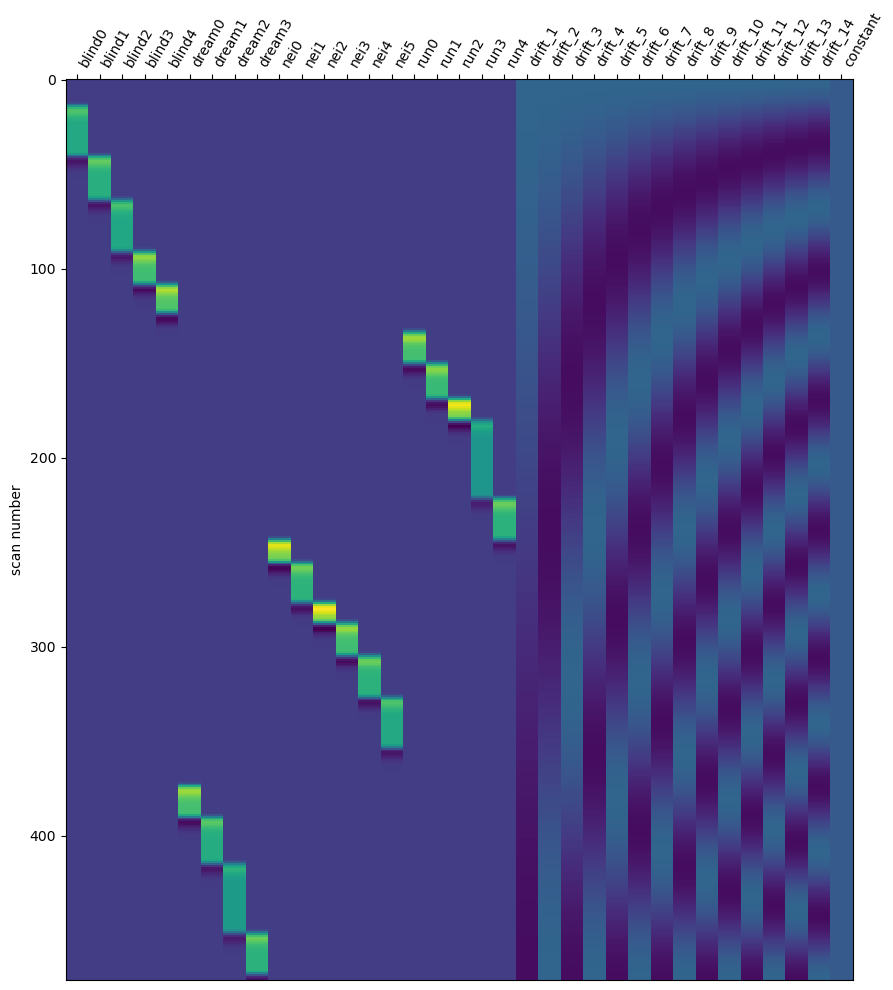

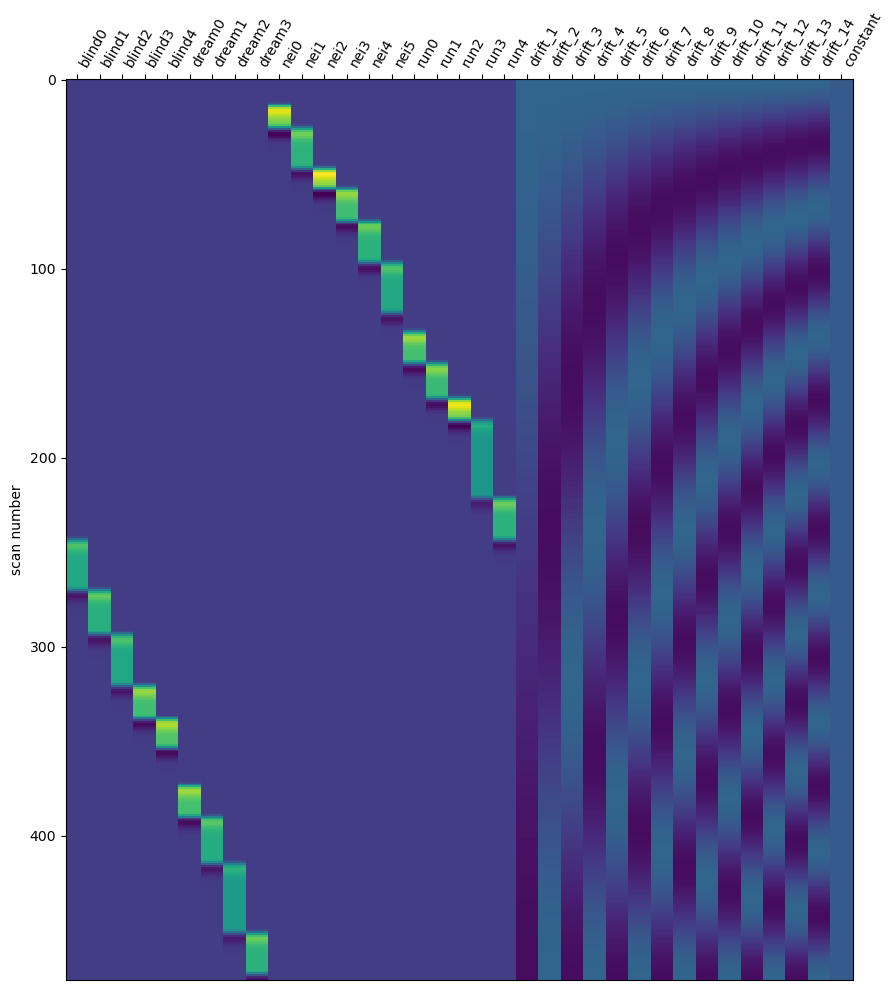

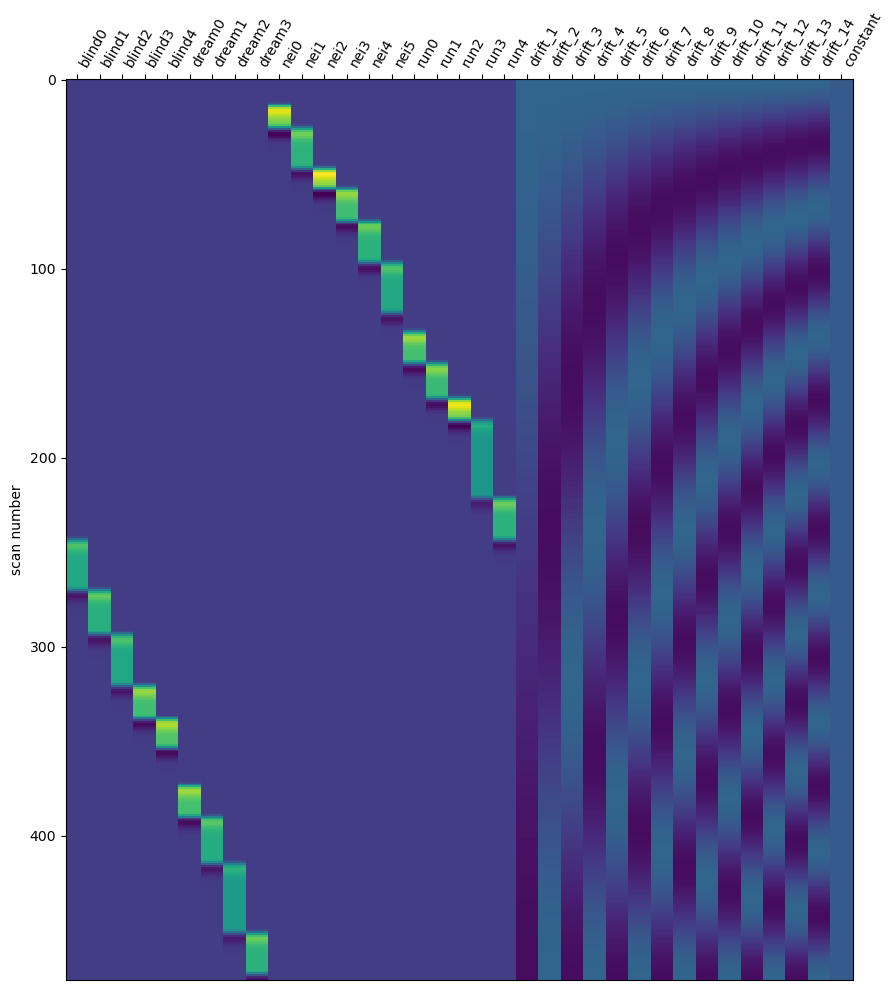

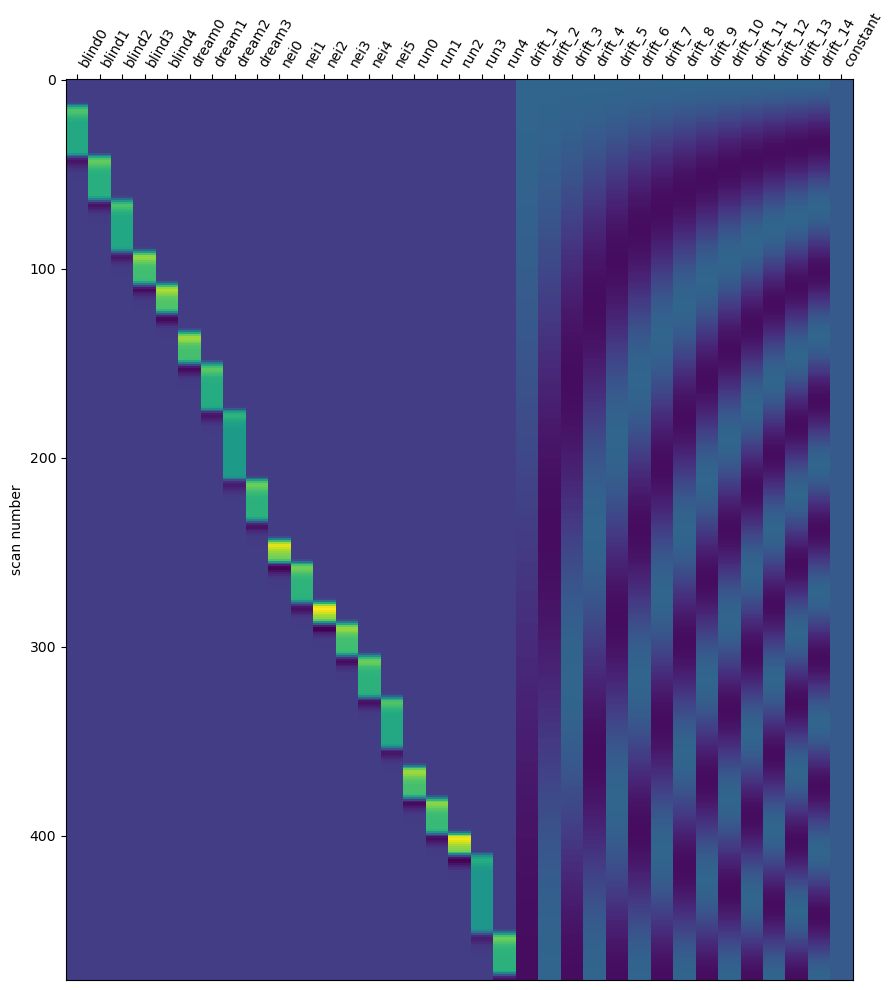

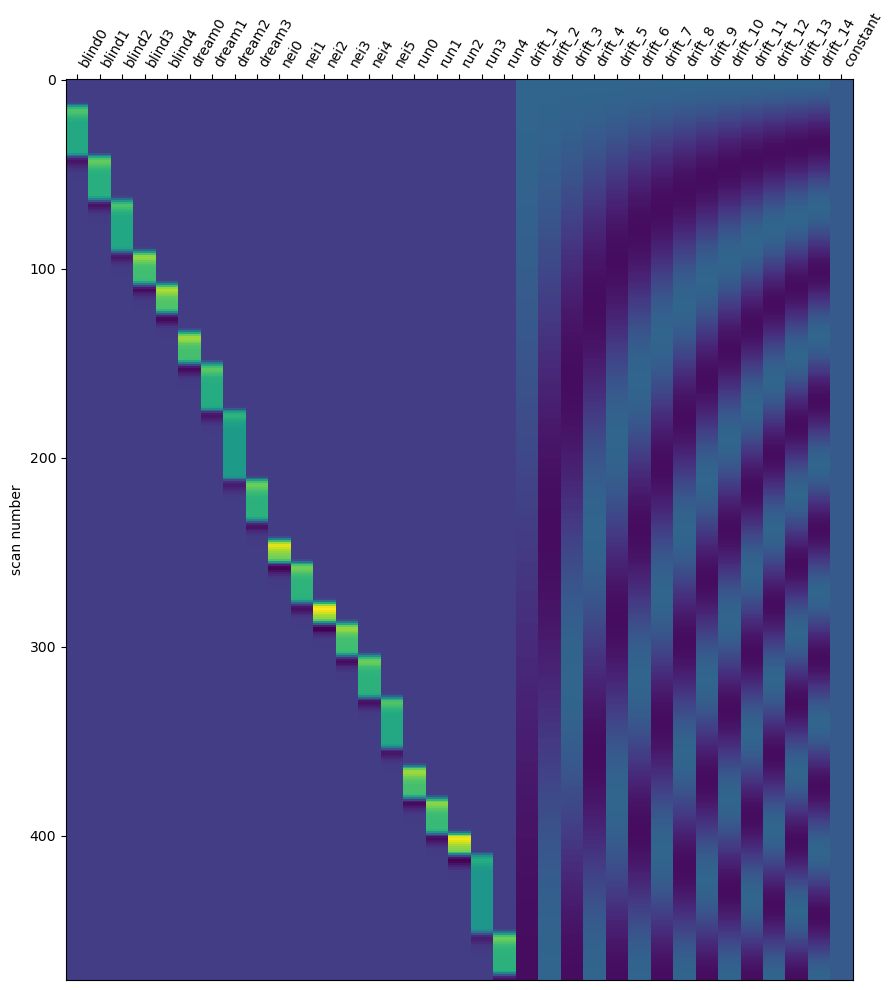

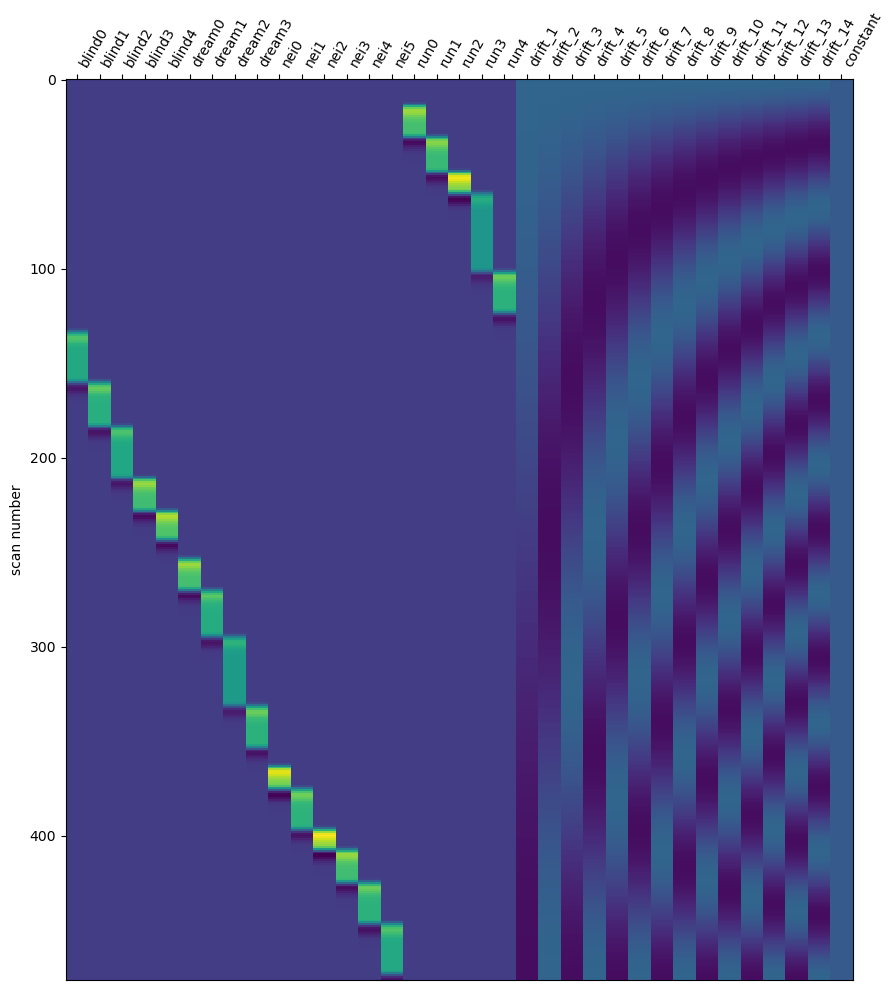

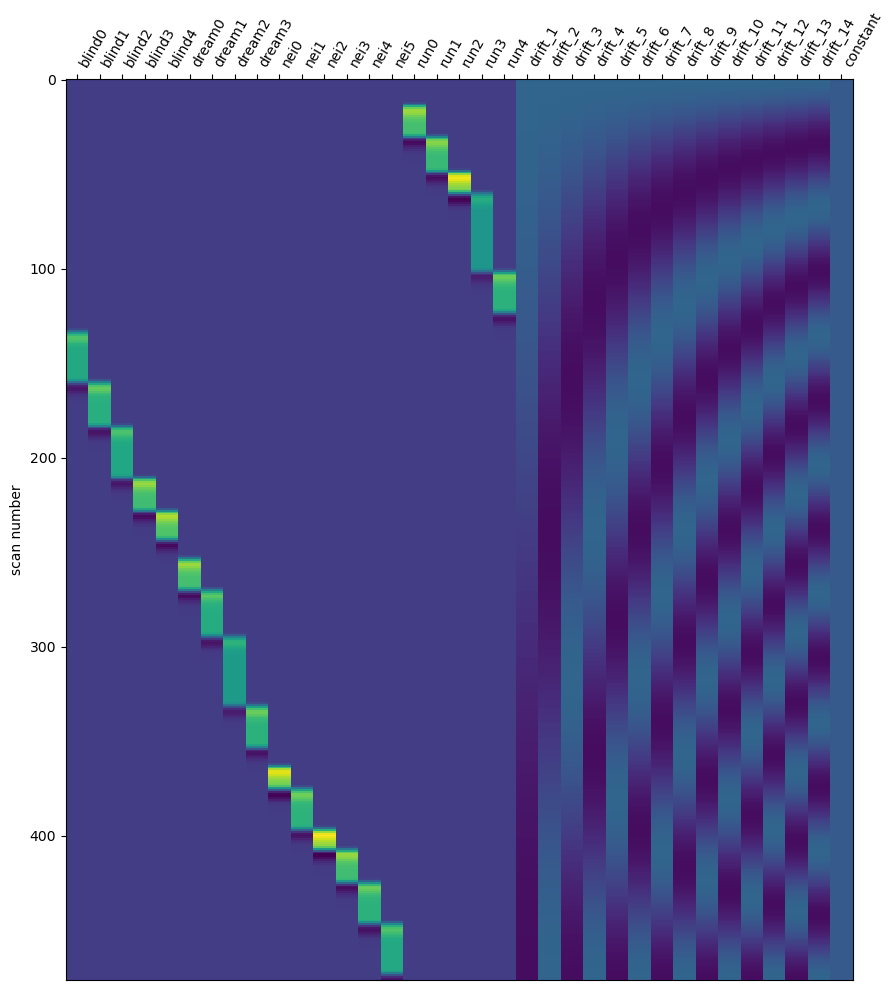

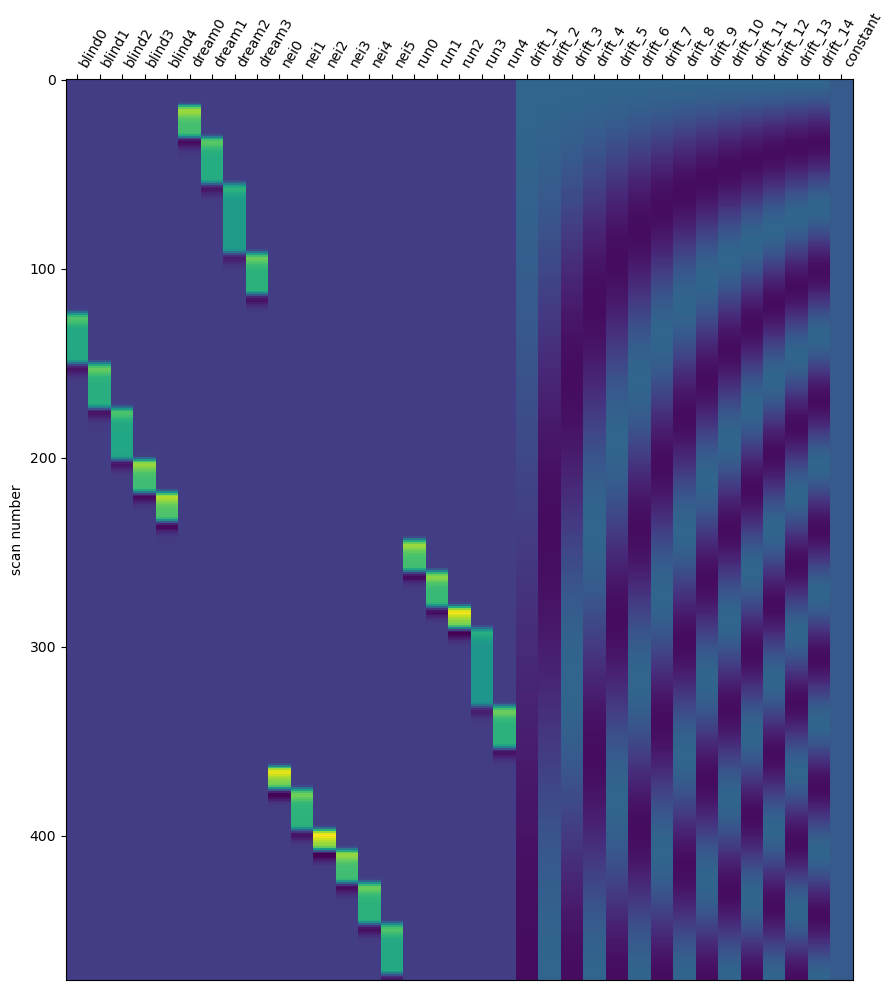

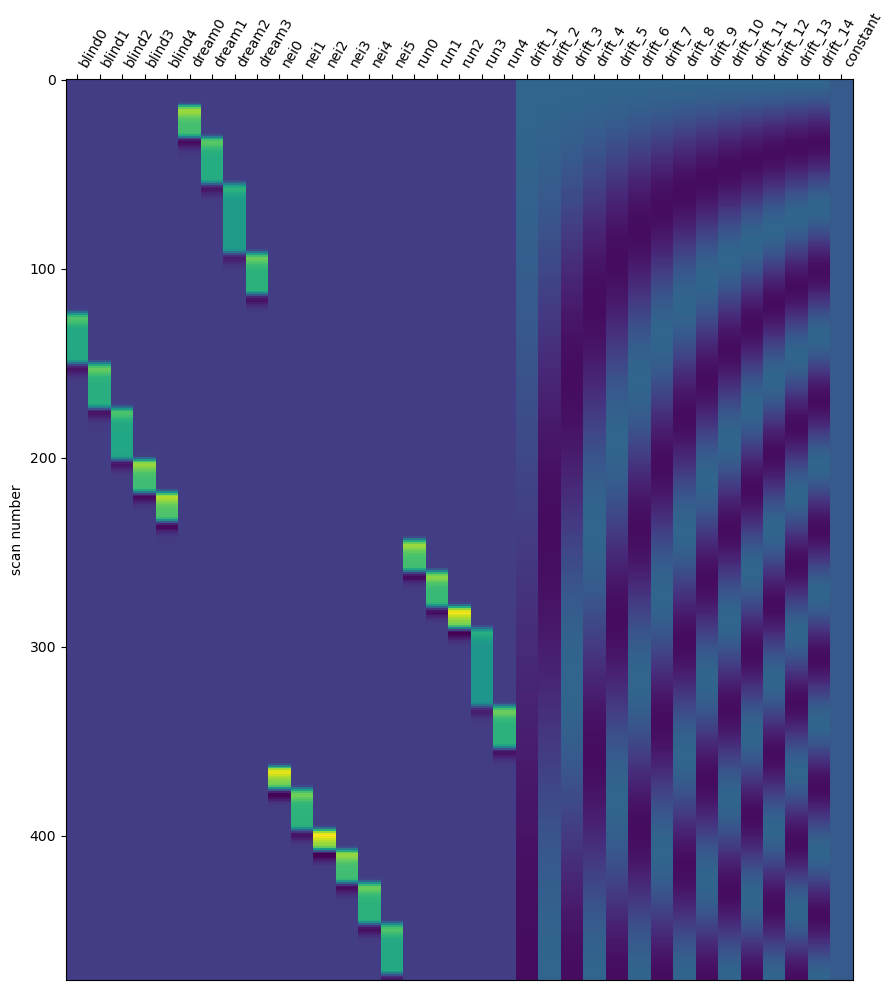

In [15]:
eb_onset = {'run':[15,40,68,85,147], 'dream':[15,40,77,132], 'nei':[15,33,65, 81, 107, 140], 'blind':[15, 55, 90, 131, 157]}
eb_offset = {'run':[40,68,85,147,180], 'dream':[40,77,132,165], 'nei':[33,65, 81, 107, 140, 180], 'blind':[55, 90, 131, 157, 180]}

# Data Load & Trimming 
onset = {'Dream1': [0, 165, 345, 525], 'Dream2': [0, 180, 345, 525], 'Dream3': [0, 180, 360, 525], 'Dream4': [0, 180, 345, 540]}
storyName = {'RunningMan': 'run', 'BlindDate': 'blind', 'Dream':'dream', 'Neighbors':'nei'}

# sequence = np.where(all_story[sub]=='Dream')[0][0]
# cond = 'Dream'+str(int(sequence)+1)

tr = 1.5  # Repetition time in seconds
dummy = 9 



#load BOLD Volume
sub_sm = [4,5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
for sub in sub_sm: 
    print(sub)
    
    # Generate the events data frame
    sequence = np.where(all_story[sub]=='Dream')[0][0]
    cond = 'Dream'+str(int(sequence)+1)
    
    for run in [1,2]:
        events_list = []
        for story in np.arange(0,4):    
            thisStory = storyName[all_story[sub][story]] 
            duration = [ai - bi for ai, bi in zip(eb_offset[thisStory], eb_onset[thisStory])]
            for event in range(len(eb_onset[thisStory])):
                events_list.append({
                    'onset': onset[cond][story] + eb_onset[thisStory][event],
                    'duration': duration[event],
                    'trial_type': f'{thisStory}{event}' })

        events = pd.DataFrame(events_list)

        # Calculate the total number of scans
        n_scans = 477
        frame_times = np.arange(0, n_scans * tr, tr) # Frame times: time for each scan

        # Build a design matrix 

        design_matrix = make_first_level_design_matrix(frame_times,events,drift_model='cosine')
        print('event_size' , events.shape)
        print('desingMatrix_size', design_matrix.shape)

        # Plot the design matrix
        plot_design_matrix(design_matrix)
        plot_path = os.path.join(May_dir, 'GLM', 'event_model','dm', f"sub-{sub}_run-{run}_task-encoding_designMatrix.png")
        plt.savefig(plot_path)

        #========================================================================================================
        if sub < 10: 
            encoding_files = glob.glob(os.path.join(May_dir,'denoised', f"sub-0{sub}_task-encoding_run-{run}_4scNsm.nii.gz"))
        else: 
            encoding_files = glob.glob(os.path.join(May_dir,'denoised', f"sub-{sub}_task-encoding_run-{run}_4scNsm.nii.gz"))
            

        # Load fmri imgs for Fitting     
        print(f'Load concatenated func_img files')
        func_img = image.load_img(encoding_files) 
        print('Image shape:', func_img.shape)

        print('start fitting GLM') 
        glm = FirstLevelModel(t_r=1.5, hrf_model='glover', drift_model='cosine')
        glm = glm.fit(func_img, design_matrices=design_matrix)

        print('save betas')
        for event in events['trial_type'].values: 
            beta = glm.compute_contrast(event)
            beta_img_path = os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_run-{run}_task-encoding_betas_{event}_image.nii.gz")
            nib.save(beta, beta_img_path)
            
    print(f'finish GLM')

3
event_size (40, 3)
desingMatrix_size (954, 69)
Load concatenated func_img files
Image shape: (91, 109, 91, 954)
start fitting GLM


KeyboardInterrupt: 

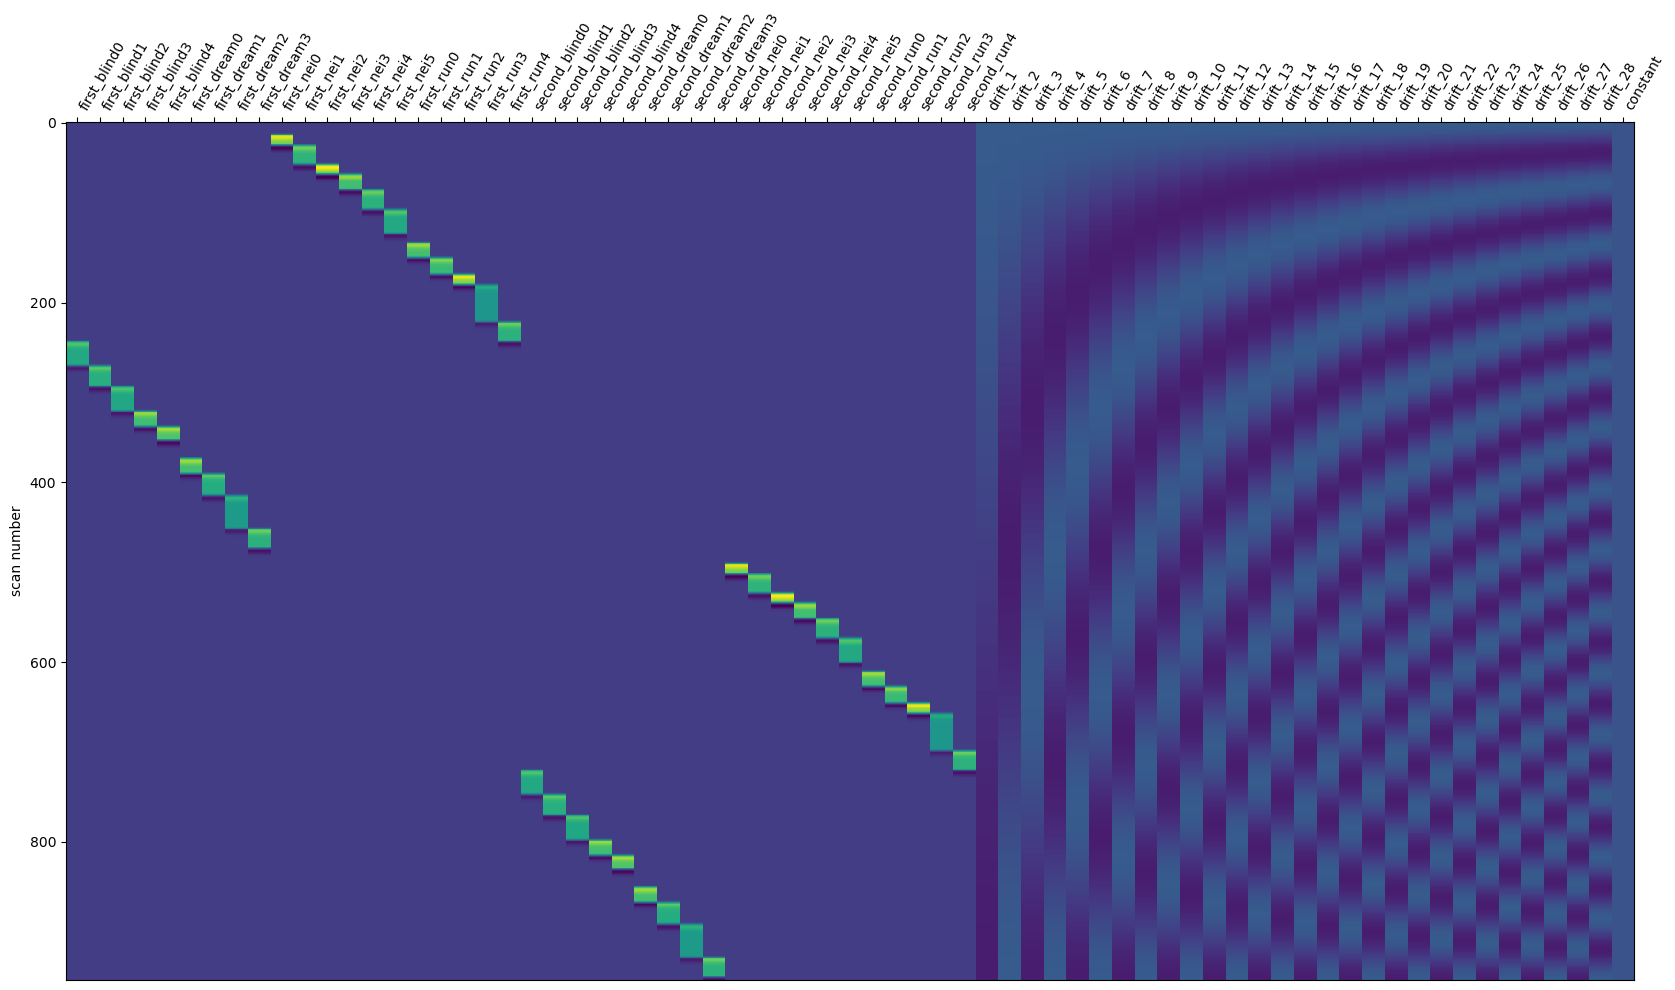

In [4]:
eb_onset = {'run':[15,40,68,85,147], 'dream':[15,40,77,132], 'nei':[15,33,65, 81, 107, 140], 'blind':[15, 55, 90, 131, 157]}
eb_offset = {'run':[40,68,85,147,180], 'dream':[40,77,132,165], 'nei':[33,65, 81, 107, 140, 180], 'blind':[55, 90, 131, 157, 180]}

# Data Load & Trimming 
onset = {'Dream1': [0, 165, 345, 525], 'Dream2': [0, 180, 345, 525], 'Dream3': [0, 180, 360, 525], 'Dream4': [0, 180, 345, 540]}
storyName = {'RunningMan': 'run', 'BlindDate': 'blind', 'Dream':'dream', 'Neighbors':'nei'}

# sequence = np.where(all_story[sub]=='Dream')[0][0]
# cond = 'Dream'+str(int(sequence)+1)

tr = 1.5  # Repetition time in seconds
dummy = 9 



#load BOLD Volume
sub_sm = [4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 
          35, 38, 39, 40, 42, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
for sub in sub_sm: 
    print(sub)
    
    # Generate the events data frame
    sequence = np.where(all_story[sub]=='Dream')[0][0]
    cond = 'Dream'+str(int(sequence)+1)
    
    timeline = {'first': 0, 'second': 715}
    events_list = []
    for story in np.arange(0,4):    
        thisStory = storyName[all_story[sub][story]] 
        duration = [ai - bi for ai, bi in zip(eb_offset[thisStory], eb_onset[thisStory])]
        for session in ['first','second']:
            for event in range(len(eb_onset[thisStory])):
                events_list.append({
                    'onset': timeline[session] + onset[cond][story] + eb_onset[thisStory][event],
                    'duration': duration[event],
                    'trial_type': f'{session}_{thisStory}{event}' })
                
    events = pd.DataFrame(events_list)
    
    # Calculate the total number of scans
    n_scans = 954
    frame_times = np.arange(0, n_scans * tr, tr) # Frame times: time for each scan
        
    # Build a design matrix 
    
    design_matrix = make_first_level_design_matrix(frame_times,events,drift_model='cosine')
    print('event_size' , events.shape)
    print('desingMatrix_size', design_matrix.shape)

    # Plot the design matrix
    plot_design_matrix(design_matrix)
    plot_path = os.path.join(May_dir, 'GLM', 'event_model','dm', f"sub-{sub}_task-encoding_designMatrix.png")
    plt.savefig(plot_path)

    #========================================================================================================
    encoding_files = glob.glob(os.path.join(May_dir,'GLM','data', f"sub-{sub}_task-encoding_concatenated.nii.gz"))

    # Load fmri imgs for Fitting     
    print(f'Load concatenated func_img files')
    func_img = image.load_img(encoding_files) 
    print('Image shape:', func_img.shape)
       
    print('start fitting GLM') 
    glm = FirstLevelModel(t_r=1.5, hrf_model='glover', drift_model='cosine')
    glm = glm.fit(func_img, design_matrices=design_matrix)
    
    print('save betas')
    for event in events['trial_type'].values: 
        beta = glm.compute_contrast(event)
        beta_img_path = os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_task-encoding_betas_{event}_image.nii.gz")
        nib.save(beta, beta_img_path)
    print(f'finish GLM for {sub}')

In [ ]:
from nltools.data import Brain_Data
t_stat_imgs = {}
t_stat = {}
events = ['blind0', 'blind1', 'blind2', 'blind3', 'blind4', 'dream0','dream1', 'dream2', 'dream3', 'nei0', 'nei1', 'nei2', 'nei3','nei4', 'nei5', 'run0', 'run1', 'run2', 'run3', 'run4']

for event in events : 
    con1_file_list = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_task-encoding_*betas_{event}_image.nii.gz")
    con1_dat = Brain_Data(con1_file_list)
    con1_stats = con1_dat.ttest(threshold_dict={'fdr':.05})
    t_stat_img = con1_stats['thr_t'].to_nifti()
    t_stat_imgs[event] =con1_stats['thr_t']

    output_dir = os.path.join(May_dir,'GLM', 'event_model', 'results') 
    beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_betas_{event}_fdr_corrected_image.nii.gz")
    nib.save(t_stat_img, beta_img_path)

In [8]:
# #Subject check 
sub_sm = np.arange(1,34)
sub_sm_exclude = [0, 8, 25] #exclude 9 & 26
subjects1 = np.delete(sub_sm, sub_sm_exclude)

sub_sm2 = np.arange(34,77)
#print(sub_sm2)
sub_sm_exclude2 = [2, 3, 7, 12, 13, 22, 23, 26, 27,28,29,35] #Excluede 36, 37, 41, 47, 56, 57, 59, 60, 61,62,63,69
subjects2 = np.delete(sub_sm2, sub_sm_exclude2)
#print(subjects2)

In [9]:
from nltools.data import Brain_Data
t_stat_imgs = {}
t_stat = {}
#events = ['blind0', 'blind1', 'blind2', 'blind3', 'blind4', 'dream0','dream1', 'dream2', 'dream3', 'nei0', 'nei1', 'nei2', 'nei3','nei4', 'nei5', 'run0', 'run1', 'run2', 'run3', 'run4']
events = ['blind', 'dream', 'nei', 'run']
output_dir = os.path.join(May_dir,'GLM', 'event_detail_model', 'results') 


for event in  events: 
    print(f'start {event}')
    con1_file_list, con2_file_list = [], [] 
    for sub in subjects1: 
        vis = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_run-1_task-encoding_betas_{event}*_image.nii.gz"))
        for file in vis: 
            con1_file_list.append(file)
        aud = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_run-2_task-encoding_betas_{event}*_image.nii.gz"))
        for file in aud: 
                con2_file_list.append(file)

    con1_dat = Brain_Data(con1_file_list)
    con2_dat = Brain_Data(con2_file_list)
    
    con_dat = con2_dat - con1_dat
    con_stats = con_dat.ttest()
    t_stat_img = con_stats['t'].to_nifti()
    
    beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_VA_{event}_uncorrected_image.nii.gz")
    nib.save(t_stat_img, beta_img_path)
    
    con_dat = con2_dat - con1_dat
    con_stats = con_dat.ttest(threshold_dict={'fdr':.05})
    t_stat_img = con_stats['thr_t'].to_nifti()
    
    beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_VA_{event}_fdr_uncorrected_image.nii.gz")
    nib.save(t_stat_img, beta_img_path)
    
    print('---------start AV condition--------')
    con1_file_list, con2_file_list= [], [] 
    for sub in subjects2: 
        vis = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_run-1_task-encoding_betas_{event}*_image.nii.gz"))
        for file in vis: 
            con1_file_list.append(file)
        aud = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_run-2_task-encoding_betas_{event}*_image.nii.gz"))
        for file in aud: 
            con2_file_list.append(file)

    con1_dat = Brain_Data(con1_file_list)
    con2_dat = Brain_Data(con2_file_list)

    con_dat = con2_dat - con1_dat
    con_stats = con_dat.ttest()
    t_stat_img = con_stats['t'].to_nifti()

    beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_AV_{event}_uncorrected_image.nii.gz")
    nib.save(t_stat_img, beta_img_path)

    con_dat = con2_dat - con1_dat
    con_stats = con_dat.ttest(threshold_dict={'fdr':.05})
    t_stat_img = con_stats['thr_t'].to_nifti()

    beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_AV_{event}_fdr_uncorrected_image.nii.gz")
    nib.save(t_stat_img, beta_img_path)

start blind
---------start AV condition--------
start dream
---------start AV condition--------
start nei
---------start AV condition--------
start run
---------start AV condition--------


In [10]:
con1_file_list, con2_file_list= [], [] 
for sub in subjects1: 
    vis = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_run-1_task-encoding_betas_{event}*_image.nii.gz"))
    for file in vis: 
        con1_file_list.append(file)
    aud = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_run-2_task-encoding_betas_{event}*_image.nii.gz"))
    for file in aud: 
        con2_file_list.append(file)
        
print(f'start all events fdr corrected')
con1_dat = Brain_Data(con1_file_list)
con2_dat = Brain_Data(con2_file_list)

con_dat = con2_dat - con1_dat
con_stats = con_dat.ttest(threshold_dict={'fdr':.05})
t_stat_imgs[event] =con_stats['thr_t'].to_nifti()


beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_VA_all_events_fdr_corrected_image.nii.gz")
nib.save(t_stat_img, beta_img_path)

print(f'start all events uncorrected')
con_dat = con2_dat - con1_dat
con_stats = con_dat.ttest()
t_stat_imgs[event] =con_stats['t'].to_nifti()

beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_VA_all_events_uncorrected_image.nii.gz")
nib.save(t_stat_img, beta_img_path)


print('---------start AV condition--------')
con1_file_list, con2_file_list= [], [] 
for sub in subjects2: 
    vis = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_run-1_task-encoding_betas_{event}*_image.nii.gz"))
    for file in vis: 
        con1_file_list.append(file)
    aud = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-{sub}_run-2_task-encoding_betas_{event}*_image.nii.gz"))
    for file in aud: 
        con2_file_list.append(file)

print(f'start all events fdr corrected')
con1_dat = Brain_Data(con1_file_list)
con2_dat = Brain_Data(con2_file_list)

con_dat = con2_dat - con1_dat
con_stats = con_dat.ttest(threshold_dict={'fdr':.05})
t_stat_imgs[event] =con_stats['thr_t'].to_nifti()


beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_AV_all_events_fdr_corrected_image.nii.gz")
nib.save(t_stat_img, beta_img_path)

print(f'start all events uncorrected')
con_dat = con2_dat - con1_dat
con_stats = con_dat.ttest()
t_stat_imgs[event] =con_stats['t'].to_nifti()

beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_AV_all_events_uncorrected_image.nii.gz")
nib.save(t_stat_img, beta_img_path)

start all events fdr corrected
start all events uncorrected
---------start AV condition--------
start all events fdr corrected
start all events uncorrected


In [18]:
# Contrast map 
from nltools.data import Brain_Data
t_stat_imgs = {}
t_stat = {}
events = ['blind0', 'blind1', 'blind2', 'blind3', 'blind4', 'dream0','dream1', 'dream2', 'dream3', 'nei0', 'nei1', 'nei2', 'nei3','nei4', 'nei5', 'run0', 'run1', 'run2', 'run3', 'run4']
output_dir = os.path.join(May_dir,'GLM', 'event_model', 'results') 

for event in events : 
    con1_file_list = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-*_run-1_task-encoding_betas_{event}_image.nii.gz"))
    con2_file_list = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-*_run-2_task-encoding_betas_{event}_image.nii.gz"))
    
    con1_dat = Brain_Data(con1_file_list)
    con2_dat = Brain_Data(con2_file_list)
    
    con_dat = con2_dat - con1_dat
    #con_stats = con_dat.ttest(threshold_dict={'fdr':.05})
    con_stats = con_dat.ttest()
    
    # t_stat_img = con_stats['thr_t'].to_nifti()
    # t_stat_imgs[event] =con_stats['thr_t']
    t_stat_img = con_stats['t'].to_nifti()

    beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_{event}_uncorrected_image.nii.gz")
    nib.save(t_stat_img, beta_img_path)
    


In [ ]:
    
con1_file_list = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-*_run-1_task-encoding_betas_*_image.nii.gz"))
con2_file_list = glob.glob(os.path.join(May_dir,'GLM', 'event_model', 'betas', f"sub-*_run-2_task-encoding_betas_*_image.nii.gz"))

con1_dat = Brain_Data(con1_file_list)
con2_dat = Brain_Data(con2_file_list)

con_dat = con2_dat - con1_dat
con_stats = con_dat.ttest(threshold_dict={'fdr':.05})
t_stat_imgs[event] =con_stats['thr_t']

beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_all_events_fdr_corrected_image.nii.gz")
nib.save(t_stat_img, beta_img_path)

con_stats = con_dat.ttest()
t_stat_imgs[event] =con_stats['t']

beta_img_path = os.path.join(output_dir, f"ttested_task-encoding_contrast_all_events_uncorrected_image.nii.gz")
nib.save(t_stat_img, beta_img_path)